In [6]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
train_csv = './data/train.csv'
images_data = './data/train/'

In [12]:
labels_df = pd.read_csv(train_csv)

In [13]:
labels_df

filename  x1   y1   x2   y2   x3   y3   x4   y4   x5  ...  x10  y10  \
0     05317.jpg  25   55   63   39  145   36  171   45   39  ...  159   65   
1     04767.jpg  17   32   39   27   56   22   81   16   20  ...   86   28   
2     05241.jpg  33   44   70   44  119   41  142   41   33  ...  144   56   
3     03849.jpg  96  157  222  143  389  129  517  125  153  ...  467  188   
4     00952.jpg  13   19   30   16   51   17   66   16   18  ...   59   23   
...         ...  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
4995  03772.jpg  39   46   85   51  117   50  170   50   52  ...  161   62   
4996  05191.jpg  25   19   40   17   52   17   74   18   28  ...   77   36   
4997  05226.jpg   8   12   20   11   36   12   46   14   11  ...   43   16   
4998  05390.jpg  11    8   29   10   56   22   72   26   22  ...   68   30   
4999  00860.jpg  18   20   40   16   56   12   77   13   24  ...   74   22   

      x11  y11  x12  y12  x13  y13  x14  y14  
0     113  103   79  148  113  148  143  141  
1      56   66   45   80   59   80   74   76  
2      94  101   74  135   89  135  112  133  
3     328  339  241  451  335  453  419  441  
4      39   43   31   56   41   56   49   55  
...   ...  ...  ...  ...  ...  ...  ...  ...  
4995   99  115   71  141  106  147  145  136  
4996   50   42   30   64   53   67   62   68  
4997   27   27   16   34   26   37   38   35  
4998   48   37   26   49   36   49   45   51  
4999   49   42   40   70   55   66   65   66  

[5000 rows x 29 columns]

In [14]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  5000 non-null   object
 1   x1        5000 non-null   int64 
 2   y1        5000 non-null   int64 
 3   x2        5000 non-null   int64 
 4   y2        5000 non-null   int64 
 5   x3        5000 non-null   int64 
 6   y3        5000 non-null   int64 
 7   x4        5000 non-null   int64 
 8   y4        5000 non-null   int64 
 9   x5        5000 non-null   int64 
 10  y5        5000 non-null   int64 
 11  x6        5000 non-null   int64 
 12  y6        5000 non-null   int64 
 13  x7        5000 non-null   int64 
 14  y7        5000 non-null   int64 
 15  x8        5000 non-null   int64 
 16  y8        5000 non-null   int64 
 17  x9        5000 non-null   int64 
 18  y9        5000 non-null   int64 
 19  x10       5000 non-null   int64 
 20  y10       5000 non-null   int64 
 21  x11       5000

### Show some samples

In [15]:
test_filename = '04632.jpg'

In [16]:
img = cv2.imread(images_data+test_filename)

In [17]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

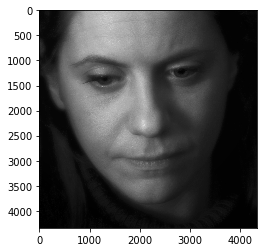

In [18]:
plt.imshow(img)

In [19]:
def get_points(df,filename):
    points = df[df['filename'] == filename].values[:,1:]
    return points.reshape( (14,2) )

In [20]:
points = get_points(labels_df, test_filename)
points

array([[757, 1115],
       [1726, 1107],
       [2389, 1033],
       [3306, 839],
       [1040, 1353],
       [1338, 1368],
       [1629, 1353],
       [2583, 1249],
       [2851, 1242],
       [3127, 1167],
       [2225, 2501],
       [1495, 2919],
       [2330, 3001],
       [2993, 2829]], dtype=object)

In [21]:
def draw_points(img,points,radius=1):
    new_img = img.copy()
    for point in points:        
        new_img = cv2.circle(new_img,(point[0],point[1]), radius, (255,0,0), -1)
    return new_img

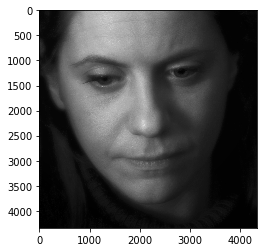

In [22]:
img1 = draw_points(img,points)

plt.imshow(img1)

### Resize

In [23]:
INPUT_SIZE = (96,96,1)

In [24]:
def resize(img,points=None,size=INPUT_SIZE):
    rx = size[0] / img.shape[1]
    ry = size[1] / img.shape[0]
    
    new_points = np.zeros(points.shape)
    new_points[:,0] = points[:,0] * rx
    new_points[:,1] = points[:,1] * ry

    new_img = cv2.resize(img, size[:-1] )
    return cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY), new_points.astype(int)

In [25]:
img, points = resize(img, points)

In [26]:
points

array([[16, 24],
       [38, 24],
       [52, 22],
       [73, 18],
       [23, 29],
       [29, 30],
       [36, 29],
       [57, 27],
       [63, 27],
       [69, 25],
       [49, 55],
       [33, 64],
       [51, 66],
       [66, 62]])

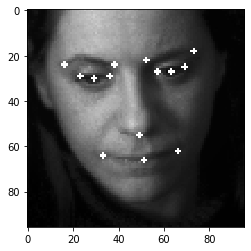

In [28]:
img1 = draw_points(img,points)

plt.imshow(img1,cmap='gray')

### Normalize

In [29]:
def normalize(img,points):
    return img / 255, points / INPUT_SIZE[0]

### Augmentation

* Flip
* Rotation
* Shear
* Translation

In [30]:
def transform_image(img,points,ang_range=25,shear_range=10,trans_range=5,flip=True):
    rows,cols = img.shape[0],img.shape[1]
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
#     print(f'Rotation angle: {ang_rot}')
    rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
    
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
#     print(f'Translation: {tr_x}, {tr_y}')
    trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[40,5],[5,40]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 40+shear_range*np.random.uniform()-shear_range/2
#     print(f'Shear: {pt1}, {pt2}')
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,rot_M,(cols,rows))
    new_points = cv2.transform(np.array([points]),rot_M)
    img = cv2.warpAffine(img,trans_M,(cols,rows))
    new_points = cv2.transform(new_points,trans_M)
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    new_points= cv2.transform(new_points,shear_M)
    new_points = new_points[0]
    
    #     Flip
    if flip is True and round(np.random.uniform()) == 1:
        img = cv2.flip(img, 1)
        new_points[:,0] = cols - new_points[:,0]
        print('Flipped!')

    return img, new_points

Flipped!


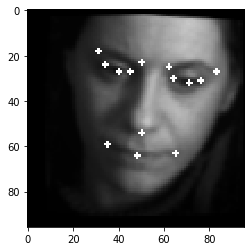

In [32]:
img2,points2 = transform_image(img,points,25,10,5)
img2 = draw_points(img2,points2)
plt.imshow(img2,cmap='gray')

### Create train

In [33]:
def create_train(df,aug_count=5):
    x = []
    y = []
    for filename in df['filename']:
        img = cv2.imread(images_data + filename)
        points = get_points(df, filename)  
        img, points = resize(img,points)
        for _ in range(aug_count):            
            new_img, new_points = transform_image(img,points)            
            new_img, new_points = normalize(new_img,new_points)  
            x.append(new_img.reshape(INPUT_SIZE))
            y.append(new_points.flatten() )
    return np.asarray(x), np.asarray(y)

In [342]:
X_train,y_train = create_train(labels_df)

Rotation angle: 4.134317489161859
Translation: -2.1455486342591383, -2.467484618464331
Shear: 2.297411199605542, 40.113693384650254
Flipped!
Rotation angle: 6.71463789341945
Translation: -2.095446548680596, -1.1984103718602612
Shear: 5.167352965917145, 43.06888759409541
Flipped!
Rotation angle: -5.547064583562879
Translation: 1.2155568988944405, -1.8940650116665136
Shear: 1.5230583572210907, 36.49135102435884
Rotation angle: -4.385610034497489
Translation: -1.309967126249153, -2.2463671869728428
Shear: 3.2212216544028642, 37.079895355526766
Flipped!
Rotation angle: 5.53908020254476
Translation: 0.6557959292805178, 1.0336888401128426
Shear: 9.580609114583654, 35.875304848534604
Flipped!
Rotation angle: -3.3305325317675845
Translation: 0.0038119367831241924, 0.013560431135600126
Shear: 5.109829313331884, 38.39577379181657
Rotation angle: 10.076131058411526
Translation: 0.15222762907438891, -1.7339118440941443
Shear: 0.12785783026751396, 39.87047252854261
Rotation angle: -7.68036493424775

Flipped!
Rotation angle: 5.3124306771173195
Translation: -1.8182041241515756, 1.350353348178774
Shear: 9.129734450650426, 41.16518668442951
Flipped!
Rotation angle: 9.408700155111507
Translation: 1.1937433850440629, 0.5462027354675518
Shear: 0.03807789378448412, 35.868293105315104
Flipped!
Rotation angle: 4.637329235273473
Translation: 0.5094451340818007, -0.8919786513426615
Shear: 6.367232217195205, 40.373171984045854
Rotation angle: -1.8236922772677957
Translation: -0.3686172066104336, -1.9591296029096517
Shear: 1.3491660566902084, 44.942396741073324
Rotation angle: -1.1215390089388784
Translation: -0.581929552836481, -2.496814918548234
Shear: 3.251107839284259, 37.227233045707784
Rotation angle: 5.119914316109906
Translation: -2.2213643518122987, -2.190551810393063
Shear: 2.87852127005649, 41.5084298743177
Flipped!
Rotation angle: -10.527638141719645
Translation: -1.6433441802621518, -0.03400304380947805
Shear: 3.1365270348200607, 41.41584722162613
Rotation angle: -9.766123964304338

Rotation angle: 10.091921397463604
Translation: 1.440549600499252, -2.032363990453626
Shear: 6.876536658803131, 42.80959131793152
Flipped!
Rotation angle: 3.6264906456914687
Translation: 1.1801498664057637, 0.8242546371599175
Shear: 0.2975631195221151, 37.00504215608466
Flipped!
Rotation angle: -4.747880522729254
Translation: 2.4425408903606503, 1.3958723099477761
Shear: 1.988041565577694, 39.47153164767958
Rotation angle: -4.1558784713317145
Translation: -1.4271986397377106, 2.18688838654605
Shear: 3.9091789950837175, 40.4341922231392
Rotation angle: 10.398323079829783
Translation: 2.3950074431307016, 1.9014188059580341
Shear: 8.898778281798927, 41.47509250158406
Flipped!
Rotation angle: -11.32729183491291
Translation: 2.4245727461637347, -0.8920170395229365
Shear: 1.8827858091079452, 38.04676194559728
Flipped!
Rotation angle: -10.580617170123901
Translation: -0.952265743855611, 0.025528463466629958
Shear: 8.33278062209754, 43.904722789798114
Flipped!
Rotation angle: 2.497642739588091

Translation: 0.6519361389763061, 2.3451262604658636
Shear: 9.96624942490213, 43.09582309805547
Flipped!
Rotation angle: 8.888921917035045
Translation: 0.7277104033876158, -2.1529033925550918
Shear: 9.705676943484368, 44.12200568149187
Flipped!
Rotation angle: 5.3046837551441115
Translation: -2.3483604075502305, 0.778735564571003
Shear: 2.6845915588605784, 41.35203102751734
Rotation angle: 7.7824156001772415
Translation: 1.6038610458301994, -0.6899260303308514
Shear: 3.231203537565845, 35.37464062973331
Rotation angle: 9.850823392444376
Translation: -2.1525382603120384, -2.45537239568507
Shear: 8.888317420980066, 43.15193310453982
Rotation angle: -7.09874245335066
Translation: -1.0559455673601597, 1.9913983342681698
Shear: 3.925364710379691, 38.23527874146063
Rotation angle: 10.75124861034368
Translation: 0.17217101800795032, -2.344166199243979
Shear: 2.674342834499985, 36.193724813952244
Flipped!
Rotation angle: 6.60489557029933
Translation: 0.08318516897485706, -1.5952246969966604
She

Translation: 0.6943382137869554, 1.12191410798502
Shear: 8.97941215699423, 35.62590065756994
Rotation angle: -6.56029793088571
Translation: 2.140065003220779, -0.9224775020518265
Shear: 3.9878735729081782, 36.22732741285798
Rotation angle: -3.9369462592388906
Translation: -0.4564100547314758, -1.313509153345311
Shear: 3.6228617446301214, 35.66780690615163
Flipped!
Rotation angle: -9.181564715980702
Translation: 2.0997641232417914, -2.034491843219009
Shear: 6.798211988109479, 37.31817333874643
Rotation angle: 0.34476607405506243
Translation: -1.955899471134626, 0.7895887878637327
Shear: 1.1250084887232816, 37.270184413613826
Rotation angle: 10.449437541766056
Translation: -1.2933316751108799, 0.9633770134250268
Shear: 3.7205834077212288, 40.279308780341175
Rotation angle: 11.632556877361907
Translation: -2.0319522787251945, -1.203158697415558
Shear: 8.35407752264205, 43.02969693162531
Rotation angle: 6.391089165786234
Translation: 2.050941414171062, -1.627302313788412
Shear: 3.689912864

Rotation angle: 7.4267135231508306
Translation: -1.4008889255501038, -0.10527370608836684
Shear: 9.06578564293612, 42.746430524618305
Flipped!
Rotation angle: -0.5676610727924203
Translation: -1.1870594765964744, 0.3556178794608966
Shear: 1.096244904187711, 41.83998951944746
Rotation angle: 2.089086765856395
Translation: -1.6966986440563865, 1.8868603341058972
Shear: 5.659815813957428, 35.0049260946957
Flipped!
Rotation angle: -0.45569681274167095
Translation: 0.06954910565205275, 1.9701773807172254
Shear: 1.6666840633237525, 42.4782714447909
Flipped!
Rotation angle: 7.660736579089633
Translation: -0.36413745180497115, -2.148986760717487
Shear: 6.758578207652775, 41.02649447469906
Flipped!
Rotation angle: -3.2477645294491158
Translation: -2.2920496789361255, 2.1384267374546813
Shear: 4.3283168744611125, 40.41316126774909
Flipped!
Rotation angle: -0.2683896478522243
Translation: 1.816428718205457, -0.22131106591139993
Shear: 1.7916009868179028, 40.813437047459836
Rotation angle: 12.3678

Rotation angle: 7.005873653642475
Translation: -1.0588051531201703, -1.9846862468049609
Shear: 4.621117740757764, 35.59539499865329
Flipped!
Rotation angle: 7.207894201613936
Translation: 2.17070319474253, -0.1393607827507628
Shear: 3.7050470886904066, 44.89730045769228
Flipped!
Rotation angle: 10.945615550719939
Translation: 0.12456560737566003, -1.1192110583812354
Shear: 8.273097636134892, 38.57127263550755
Flipped!
Rotation angle: 7.662018100288385
Translation: -1.8786125425422595, 2.1911323282001067
Shear: 6.078298816251436, 41.74817300901016
Rotation angle: -3.422229997561928
Translation: -0.004984086296238921, 1.4983861816511852
Shear: 1.4987215460496657, 35.057183812181805
Rotation angle: 1.5506429739490422
Translation: 0.6518624862674423, -0.03904653214812992
Shear: 6.54205063215562, 36.67392461911756
Rotation angle: -0.8494437240895358
Translation: -1.8946907795573216, -1.4684428528414417
Shear: 1.1647111495981708, 39.45148694790165
Rotation angle: -0.7432002597466116
Translat

Rotation angle: 1.2560748847365737
Translation: -0.08175611081616196, -0.6540052805639633
Shear: 9.24278767971465, 35.47669122091037
Rotation angle: 5.027901459423674
Translation: 0.4218236181232844, 1.7306355966472484
Shear: 9.431293984344826, 44.65111047115806
Rotation angle: -6.740068418814648
Translation: 1.722373138608046, 1.4073819400943903
Shear: 6.920680161004263, 43.33796423483359
Flipped!
Rotation angle: 4.563122114020583
Translation: 1.1486327044282403, -1.090815499985558
Shear: 7.664021650944177, 38.75113497270513
Flipped!
Rotation angle: 9.700546985728156
Translation: 1.7975867478329057, -1.2464683240873486
Shear: 1.0679073666774688, 37.832692155924974
Flipped!
Rotation angle: -6.478839525650802
Translation: 0.5382423949140449, 0.07579544007339223
Shear: 0.27404207034226413, 44.03508838809927
Flipped!
Rotation angle: -0.6703494288426253
Translation: 0.9633915994112785, -0.8496913043493048
Shear: 7.71939725343011, 43.75365641609361
Rotation angle: 11.224430319441794
Transla

Rotation angle: -6.377412270612602
Translation: 2.2007147831364886, 0.4215934303929485
Shear: 1.2064132084205212, 37.59254700216949
Rotation angle: 3.7504027445065375
Translation: -0.6938570133789634, -0.7886961802235044
Shear: 3.0796311653083226, 42.52498545734628
Flipped!
Rotation angle: 6.639602119948034
Translation: 0.87997033989451, -0.8615792880701978
Shear: 0.7950447087794661, 36.636472757938094
Rotation angle: 9.16579541566232
Translation: 0.9098318534408367, -1.6960176184225633
Shear: 6.469798805772696, 42.70212457559615
Flipped!
Rotation angle: 7.531046516692264
Translation: 2.072321844106865, 1.2391668265570726
Shear: 9.177439403044776, 40.214500271364244
Rotation angle: -7.6062252664466
Translation: 0.5993183295897202, 1.2736732946303668
Shear: 1.7875805958265047, 42.01542305416909
Rotation angle: -4.986338482965408
Translation: -1.3658747072709692, 1.8546318948838696
Shear: 6.905112544037289, 35.793534517342906
Flipped!
Rotation angle: 7.946512298833362
Translation: 1.8975

Translation: 0.11596925114795154, -0.05045826521723962
Shear: 7.490164940911569, 43.843541230686554
Rotation angle: 9.088046903271806
Translation: 2.07834779607426, -1.8673094273741482
Shear: 5.690114242850322, 39.076104469195485
Flipped!
Rotation angle: -8.25719541476348
Translation: -0.2088087908534213, -2.236879752527949
Shear: 2.898880861287415, 40.07074482159682
Rotation angle: 8.499403511434622
Translation: 1.7511255233510132, -2.08026957172281
Shear: 3.0319989238772322, 44.20898381822884
Rotation angle: -1.3280389344919428
Translation: -1.6612932665582791, -0.2451759482512883
Shear: 8.275175026001524, 43.57497279196239
Flipped!
Rotation angle: 2.948873077536927
Translation: 1.5905609862563859, -1.4625128630821775
Shear: 3.8897777219083487, 39.658130555067366
Flipped!
Rotation angle: 3.848634363799384
Translation: -1.1120190523121176, 1.1073176255086952
Shear: 0.3205142978149471, 42.306793901954094
Flipped!
Rotation angle: -7.813863448034695
Translation: 0.7255078967638924, -1.98

Translation: 1.9495287424563212, 1.2685007811293598
Shear: 9.964991952098117, 44.34145564398862
Flipped!
Rotation angle: 1.6184233696283972
Translation: 1.3749640288090736, 0.7482750420707225
Shear: 7.459817223717719, 44.23116202379763
Flipped!
Rotation angle: -7.801365576441132
Translation: 1.7926304934500852, 1.6873683733241034
Shear: 6.896969968648017, 37.53054289203524
Flipped!
Rotation angle: -2.659195100494511
Translation: -1.462286945691187, 1.8696730946008078
Shear: 9.049532343280642, 44.036244980460445
Rotation angle: -8.001365228483756
Translation: -0.49250257669383135, -0.9326625479585793
Shear: 9.571380002167388, 35.98105709160645
Rotation angle: -0.9207250281879986
Translation: 0.837057851075639, -1.3069474977791595
Shear: 2.233596647649202, 38.936920457363044
Flipped!
Rotation angle: 11.951606143476852
Translation: -1.5575248366564376, 0.37616883377742916
Shear: 4.443384391891328, 40.70257398205904
Rotation angle: 8.436418252404021
Translation: 2.2349281012684568, 2.24526

Translation: 1.2628435449533395, -0.6125116109412176
Shear: 0.16316257961834335, 40.50623567840685
Flipped!
Rotation angle: 0.8039137562945591
Translation: 0.20038320610093763, -1.4606652812699323
Shear: 9.139485859806658, 37.45330411364657
Flipped!
Rotation angle: -2.1795099120343764
Translation: -0.7911176678181209, -0.08199706887393754
Shear: 7.67045587895549, 44.13297357353518
Flipped!
Rotation angle: 4.475248438742575
Translation: -1.2014487610527946, -2.2157116595103927
Shear: 0.8394926879202718, 38.74325322315136
Flipped!
Rotation angle: -10.256951709192485
Translation: 0.0913099473539587, -2.4538991872724303
Shear: 2.526226580900661, 43.819357558464134
Rotation angle: 0.8612691281318536
Translation: 0.22153904281770398, -1.3596891750722062
Shear: 2.237896733645119, 35.273730740716125
Flipped!
Rotation angle: 0.5908030266083966
Translation: 0.6414485178595131, -1.0458895240737704
Shear: 4.661455248016146, 38.047563090475684
Rotation angle: 10.974095222217194
Translation: 1.71404

Translation: -2.2398651352560677, 1.2959772013248494
Shear: 9.772858010460974, 35.977553308312075
Flipped!
Rotation angle: 3.5338258098671034
Translation: -0.027902266803237374, -2.2720319743030637
Shear: 6.696542272032584, 41.28041828912152
Flipped!
Rotation angle: -5.622972442799558
Translation: 1.9904310951225463, -1.9412931682470047
Shear: 4.079408731064937, 40.61198568363929
Flipped!
Rotation angle: -5.899263580147423
Translation: -1.5419423880854355, 1.7131942218796468
Shear: 8.856524384592499, 42.29001942367674
Flipped!
Rotation angle: 6.262771658866459
Translation: 1.0370909185451187, 0.5707528554770307
Shear: 8.812866168893528, 40.988029627978705
Rotation angle: 6.84865236524551
Translation: -0.6499232579341696, -0.7074785323809218
Shear: 6.629464076090853, 42.84712260361026
Rotation angle: 3.2447368000559447
Translation: -0.05560894203596156, 2.3731434166061307
Shear: 4.946270042267592, 42.24531529975698
Rotation angle: -2.80737009945317
Translation: 0.3468900765933114, -2.36

Rotation angle: -4.452641240200958
Translation: -0.4325014187006806, 1.5105692058616373
Shear: 1.4555837058643188, 41.53660283606847
Rotation angle: 6.660048042693404
Translation: 2.4381416154821416, 1.7307094042881674
Shear: 0.246844428507079, 43.733571322119154
Flipped!
Rotation angle: 8.77133544123193
Translation: 1.9007700968585475, 1.796859841832326
Shear: 6.293034565336308, 40.07359475783588
Flipped!
Rotation angle: -5.03293111440999
Translation: -0.3668810378842262, 1.0372857876971695
Shear: 6.789780514948735, 41.92049288536806
Rotation angle: 10.17787350174423
Translation: -1.44033366338649, 2.4272911034893783
Shear: 6.5384833062864995, 39.33090390196174
Rotation angle: -2.30973035404174
Translation: -1.1459978545734089, -0.4404366179621406
Shear: 8.709363736647552, 44.483465672842364
Flipped!
Rotation angle: -3.0399739304922626
Translation: -0.8927781935921426, 0.8596534837496801
Shear: 5.584172570442565, 37.974753992752326
Flipped!
Rotation angle: 4.345841202859425
Translatio

Rotation angle: -4.974845731567488
Translation: -2.0937068536952603, 1.5575136991923424
Shear: 7.52982402629404, 35.94957793674418
Flipped!
Rotation angle: -8.123600252859447
Translation: 0.5635595369042763, 2.4304545224882848
Shear: 2.4128860800481196, 39.095525182856655
Flipped!
Rotation angle: -3.4686610544200995
Translation: 0.8021655471899969, 1.320968931966772
Shear: 5.905868574588645, 37.412362467452745
Flipped!
Rotation angle: -3.7665373054504308
Translation: 0.8040950943751883, -1.4412927810394232
Shear: 6.714940929935535, 40.40988844423915
Flipped!
Rotation angle: 3.470169985851694
Translation: 1.3471603209872751, -1.6130640471047808
Shear: 3.3345304419125306, 36.52501714340868
Flipped!
Rotation angle: -5.915937750308956
Translation: 0.40864843119158145, 1.4595545475667748
Shear: 0.11444457799649665, 38.59027260148425
Rotation angle: 0.9135581485489261
Translation: 2.484815779864527, -0.20253019638738667
Shear: 5.669909140586647, 42.94651060460403
Flipped!
Rotation angle: 6.6

Translation: 0.013791156732714693, 0.4668594964511845
Shear: 9.355879686384919, 37.50248458842128
Flipped!
Rotation angle: -11.346827480523451
Translation: -1.3989895909544259, -1.4115423662435356
Shear: 5.406139960976919, 43.59439968791156
Flipped!
Rotation angle: 5.778634567776152
Translation: 1.7560937913182686, -0.1238680188990422
Shear: 1.3754993393026567, 36.47924472623705
Flipped!
Rotation angle: -3.890709783077856
Translation: 0.5702140219026299, -2.3089010050765415
Shear: 5.03600156237945, 43.31469692190569
Flipped!
Rotation angle: 12.133751884715409
Translation: -1.391677936254863, 0.4929685641653938
Shear: 4.388992693225118, 38.83845260259103
Flipped!
Rotation angle: -5.7714097993254505
Translation: -1.899490824046688, -0.5360999078351525
Shear: 4.506866701442929, 42.22516773504494
Rotation angle: 12.379617217825292
Translation: -0.14320804144072152, 2.196426545154532
Shear: 6.288837993966819, 41.94711217006981
Rotation angle: 6.905372737036288
Translation: 1.378741822643347

Rotation angle: 2.9208062283472405
Translation: 2.021595553307865, 0.062983090859285
Shear: 0.13201693586310803, 39.05573459288333
Rotation angle: -6.201977871381253
Translation: -0.6611665899698664, -0.4766547270000059
Shear: 0.3697859507184127, 42.69656741944842
Rotation angle: -4.058411623524421
Translation: 0.3224027606832496, -1.009251783728176
Shear: 8.971687452982856, 42.72091478164137
Rotation angle: -4.646091693620466
Translation: 2.0793543233742087, -0.8125680050729578
Shear: 0.631355195416786, 38.40922155001424
Flipped!
Rotation angle: -0.6857913589954272
Translation: 0.2570558623015353, -2.473582042242934
Shear: 5.855248352670458, 43.029076492942266
Rotation angle: -6.5146679516884305
Translation: 0.34545198814440337, -1.2798381081379118
Shear: 8.783747673406799, 44.085159910248215
Flipped!
Rotation angle: 6.143704651586031
Translation: 0.927717021548955, 1.3220892692257227
Shear: 6.3204512405129805, 41.862840229003055
Rotation angle: 3.2365854954517292
Translation: 1.71034

Flipped!
Rotation angle: -6.563310658729346
Translation: -1.0635805246095047, 0.9419078327258674
Shear: 5.856498998625682, 36.257646158905345
Rotation angle: 7.969717158771754
Translation: 1.707855879577152, -0.006046412762197306
Shear: 2.3492896138282013, 35.67933702477101
Rotation angle: -1.0952073860720972
Translation: 2.3669408690699987, 1.396196184817073
Shear: 7.120755875410907, 36.76083118425936
Flipped!
Rotation angle: 6.4460529770269375
Translation: -2.1555633170093484, 1.8680503363699863
Shear: 6.4785956122144075, 35.884675015978885
Rotation angle: 11.844818919279817
Translation: 1.410151221287577, 1.9068301495653177
Shear: 5.25261938432593, 36.0277705785167
Flipped!
Rotation angle: -7.394246773242735
Translation: 1.635406093225006, 0.29938690375869337
Shear: 2.6226127160287502, 38.58399628861475
Flipped!
Rotation angle: 5.333494080133967
Translation: 1.4728031463567977, -0.9873854794925911
Shear: 1.7808490291724377, 44.744593211650695
Flipped!
Rotation angle: 6.4223577200035

Rotation angle: -6.85574860642139
Translation: -0.6806874197823225, 0.6837854437516495
Shear: 1.9863599109258425, 36.78035386891197
Rotation angle: 2.2324270663327077
Translation: 2.1593355975151614, -1.4412784953945512
Shear: 8.01536693515441, 35.67104881735751
Rotation angle: -1.9427406112198327
Translation: -2.2995483208410583, 1.581432032531362
Shear: 7.7894127106066335, 35.745642009107655
Flipped!
Rotation angle: -4.573715650238622
Translation: -2.15843279486588, -0.5165378790827291
Shear: 0.017795124864697698, 41.218138426905085
Flipped!
Rotation angle: 7.304184623112313
Translation: 1.7622446742906286, 1.2058821757263023
Shear: 4.225554137655999, 35.20782967340304
Flipped!
Rotation angle: 9.960934196252822
Translation: -2.0538446782170707, -1.9783359963253266
Shear: 9.70260934688405, 41.14719510661483
Flipped!
Rotation angle: 4.460938080427166
Translation: -1.3696561126284075, 2.0650222507457583
Shear: 7.782430696397093, 36.24240894597481
Flipped!
Rotation angle: 7.0415186532371

Rotation angle: 9.870936437154388
Translation: 0.2541863857068445, -0.2578552705694541
Shear: 4.91491590841499, 37.015704971101
Rotation angle: -0.19971307874394206
Translation: 0.6862608395894605, 1.7388801269155136
Shear: 1.6185064643507783, 37.794045059023674
Rotation angle: 0.46801641719654796
Translation: 1.0143494034414724, -2.0702301004270103
Shear: 3.7561258080884095, 40.147233960423456
Rotation angle: 4.530098925186238
Translation: 2.0217407157332916, 2.408538698849039
Shear: 8.816429029400755, 39.50612269596658
Rotation angle: -8.156182526130383
Translation: 0.7596256319645538, 2.0957785362243513
Shear: 7.426373360375219, 40.71551997169221
Rotation angle: -3.577000192300744
Translation: 1.158910274520872, 1.3352762438668226
Shear: 0.6951453176395317, 44.50386066938244
Rotation angle: 6.262883335472207
Translation: -0.541194750536862, -0.7913514056071247
Shear: 2.9428538327548903, 39.66254528613837
Rotation angle: 4.091181491620485
Translation: 0.311331162304195, 2.39570958761

Rotation angle: -9.971702306367007
Translation: -2.110384979687274, -2.066346175667886
Shear: 3.6946368803230367, 42.61902021719028
Flipped!
Rotation angle: -7.412836892855193
Translation: -1.7564630851984546, 0.8905664047724966
Shear: 3.5288533822451065, 43.35187803155795
Flipped!
Rotation angle: 3.3524606398324472
Translation: -0.4998353526859751, 1.479816570921764
Shear: 6.487533330600458, 36.60054195431944
Rotation angle: 4.255352461634011
Translation: 1.0390535071869857, -1.403080155592877
Shear: 0.32096220379354445, 35.97386670983358
Flipped!
Rotation angle: 10.06992346789658
Translation: 1.3536567712015786, -0.07782133923885448
Shear: 6.434628491879302, 39.88309830455989
Flipped!
Rotation angle: -7.789028005998674
Translation: -2.227517038691411, -0.22813408861547524
Shear: 0.9110849754034636, 44.62951648335749
Rotation angle: -9.717045929995198
Translation: 1.126826632665864, -0.4126826520540754
Shear: 7.4029528264026645, 35.224803733571775
Rotation angle: -7.759372328162673
Tr

Rotation angle: 11.008944469943973
Translation: -0.38012079036352464, -0.8178110411487471
Shear: 8.321181748809307, 38.902229279601485
Rotation angle: 11.651192447977536
Translation: -1.3297761045825167, -0.6654940583873943
Shear: 8.226700734707142, 40.034434171976585
Flipped!
Rotation angle: 10.56579963724986
Translation: 1.3866848726636345, -1.7271947437275377
Shear: 7.57996571330488, 35.111925526517744
Rotation angle: 6.466750882427483
Translation: 1.358984573239987, 1.155136557524203
Shear: 6.563279929501954, 42.05730311226242
Rotation angle: -10.189761663954663
Translation: -1.19365998553554, 0.7150985330600008
Shear: 7.374720987230852, 39.40097393950549
Rotation angle: 4.416495263590843
Translation: -2.18581655191171, 0.5243650758364229
Shear: 1.9608573276356864, 44.395792412850454
Flipped!
Rotation angle: 6.281104670109443
Translation: -1.871073387547545, -0.8177122105805468
Shear: 8.189912411180766, 42.0728612445944
Rotation angle: -10.378571268595579
Translation: -0.2859824413

Rotation angle: -10.4720668460917
Translation: -1.9358604201641376, -1.091580442353578
Shear: 7.454851404343188, 40.93822251811412
Flipped!
Rotation angle: -9.132728642462382
Translation: -0.9154331366329167, -2.249459863864386
Shear: 9.07659753718188, 40.67742920449962
Flipped!
Rotation angle: 2.8795360251089512
Translation: 1.7164362020454718, -1.0011563244198707
Shear: 6.987225325486531, 37.64915035491435
Rotation angle: 2.8071186987096084
Translation: -1.2612325560736715, 1.1846408896616625
Shear: 6.6779766557797675, 44.66341214857907
Rotation angle: 7.320849815827614
Translation: 2.076767493959453, -1.212279570833823
Shear: 0.7972013384427346, 44.88635119446812
Flipped!
Rotation angle: 9.33863392397783
Translation: 0.062052907910311816, 0.2891620919343909
Shear: 2.7346323680173636, 40.23730179986083
Rotation angle: 12.04877286516296
Translation: -2.2659863228025268, -2.016359945648036
Shear: 9.280600834913205, 35.73883126932099
Flipped!
Rotation angle: -5.590142793352754
Translati

Rotation angle: 9.502096662649805
Translation: 1.042099879340201, 0.7376072199374613
Shear: 8.002742390096117, 43.641110589359734
Flipped!
Rotation angle: 8.22417424536128
Translation: 0.8943180316565003, -0.5285873745352503
Shear: 8.984341492267577, 36.30957311477621
Flipped!
Rotation angle: 11.477274246043692
Translation: -2.334200038603453, 2.2361125597655453
Shear: 5.15461381459361, 37.63032750639957
Flipped!
Rotation angle: -9.942198616059624
Translation: -1.1697842472845843, -1.2093859047443982
Shear: 9.68101609418014, 40.852819889975365
Rotation angle: -9.92204088132025
Translation: 0.6892089497588243, -2.0847655895207136
Shear: 8.339299714716248, 36.371033549555776
Flipped!
Rotation angle: 7.725923802497771
Translation: -0.005586744019276502, -1.1032544704009424
Shear: 0.48357249188906337, 40.038031611786295
Rotation angle: 7.746498736160731
Translation: 0.2976628608929692, -0.15299669081727574
Shear: 4.872928900378639, 43.12422409286724
Rotation angle: -2.116239455203324
Trans

Rotation angle: 4.956425488114785
Translation: 1.9557531966343982, 0.007786335845083148
Shear: 3.058067810378404, 37.81858230750735
Rotation angle: -0.3177940757340334
Translation: -1.7725296191864097, 2.1719122695194146
Shear: 2.4075155498593688, 44.68993989447834
Rotation angle: 4.414925910007817
Translation: -1.5832746283791859, 1.3353425220860564
Shear: 9.054973324500981, 40.66745952904646
Rotation angle: -10.769764833903135
Translation: -1.0170784376708741, 1.5486644399252043
Shear: 8.044446149357265, 39.03517323421162
Rotation angle: 7.847049611838102
Translation: -1.0141748851672971, 2.0627578526639203
Shear: 1.1498156999100537, 44.12427013411636
Flipped!
Rotation angle: -7.668174047301598
Translation: 2.380398864568363, 1.8765741179199331
Shear: 9.446451116518308, 42.53094951843147
Flipped!
Rotation angle: -1.7659564351964612
Translation: 0.08923266283141018, -2.492578931801744
Shear: 4.07144460610375, 39.65504120702367
Rotation angle: 11.57823130732837
Translation: -0.05871374

Flipped!
Rotation angle: -6.299573280589506
Translation: 1.7930628513697835, 2.2034803878719575
Shear: 0.8997758194997632, 42.32904737548294
Rotation angle: -2.5561394537368614
Translation: 0.7534893156480837, 2.31242350695765
Shear: 7.250940764393821, 36.67244494308491
Rotation angle: -4.9283133171724955
Translation: 1.071761799120432, -0.559802969119541
Shear: 2.6629265280174677, 43.782415255470184
Rotation angle: 4.3200667957375565
Translation: -1.0203916199222336, 1.7777547687087516
Shear: 3.255711322896767, 41.415121482765
Rotation angle: 5.9568595762649466
Translation: 1.9461210078436002, 0.5683476788962682
Shear: 9.799557861333335, 44.483100404226946
Flipped!
Rotation angle: 5.461351602534204
Translation: -0.9349585424958846, -0.7225635573718043
Shear: 9.67995441393253, 42.20477850242297
Rotation angle: -6.584539058263047
Translation: 1.1798046517983858, -1.5000649848745973
Shear: 7.066967172378778, 37.18373681672716
Flipped!
Rotation angle: -3.692549194712118
Translation: -2.24

Flipped!
Rotation angle: 1.5843057318912166
Translation: -1.0938573735474115, 2.1082511202675915
Shear: 5.086203750798326, 41.65917306162434
Rotation angle: -9.994958585367655
Translation: 0.9837279781389778, 2.135559827958285
Shear: 0.9733997115429407, 42.958032031271784
Flipped!
Rotation angle: -5.1096662185028165
Translation: 0.29253662302381356, 0.9550160144731228
Shear: 8.434597828157974, 42.40241006745994
Rotation angle: 9.558359366377726
Translation: -1.2469175510141983, -0.31378635430412016
Shear: 9.924349605519915, 40.303465679480965
Flipped!
Rotation angle: 0.1667453964534431
Translation: -2.2467037717655334, 1.5722733598561254
Shear: 8.471064335054525, 44.95329949314048
Flipped!
Rotation angle: 9.012662903345984
Translation: -0.018179366560567622, -1.2749734978910854
Shear: 6.431446491185596, 39.313941484728865
Rotation angle: 10.10415727411215
Translation: 2.116999148715718, 0.11169834098973563
Shear: 6.449063090183499, 39.019469406363946
Flipped!
Rotation angle: 1.24671099

Translation: -1.752194010862127, 1.1069334377423012
Shear: 1.8322836262795388, 40.172068316053185
Rotation angle: -5.828356978192602
Translation: -0.6807733169047636, -2.169986940121928
Shear: 0.8885695611191178, 43.1254525139088
Flipped!
Rotation angle: 5.988150768320185
Translation: -1.4817027675387635, -2.139222967409818
Shear: 2.7607614199769257, 38.05113235380833
Flipped!
Rotation angle: 4.082208539831328
Translation: 1.4827922048828075, 1.4046996097212179
Shear: 7.739620482880376, 44.588793781461874
Flipped!
Rotation angle: 1.3362197901622235
Translation: -1.0173809618434966, 1.5317592549593133
Shear: 4.906740771442909, 41.869686504939246
Rotation angle: 6.211172526813829
Translation: 0.48752670958179367, 1.3010697462144867
Shear: 7.306624992355548, 44.53904712253596
Rotation angle: -8.129771446659863
Translation: 0.44975545887778123, 2.1367626757889795
Shear: 5.192017018285135, 36.88893135504384
Rotation angle: 3.577872957807184
Translation: -0.11545173552610066, 0.3999996105637

Rotation angle: -3.9333657227890413
Translation: 2.3809857935299865, -0.6943604391226676
Shear: 4.86312181112565, 37.7948975998371
Rotation angle: -5.792934384346744
Translation: 2.1694265383540854, -1.5246975518114985
Shear: 0.8441680012907371, 39.37153686583001
Rotation angle: 3.2338657543457963
Translation: -2.3331945042245454, 1.6016084739789624
Shear: 3.3865466853315596, 37.10759539563478
Flipped!
Rotation angle: -10.378460630615372
Translation: 0.15566627903095487, 0.461970782213009
Shear: 4.073217937980363, 41.84414974806826
Flipped!
Rotation angle: 2.9368737311222457
Translation: 1.8788926907298649, 0.8552791610523398
Shear: 0.29147024105917474, 35.43647891688605
Rotation angle: -0.38529249583707603
Translation: -1.5841101377589895, -1.863290219754784
Shear: 1.1852993892357278, 36.38302387979273
Flipped!
Rotation angle: 6.357617944804723
Translation: 1.5854591060811245, -0.08337943402203729
Shear: 3.0434970825364793, 37.94400287882433
Rotation angle: -1.6128708647775891
Transla

Rotation angle: -5.348612980182242
Translation: 2.104796120943539, -0.3235189229899156
Shear: 0.25795316878600083, 44.68610649788028
Rotation angle: -7.093422389152359
Translation: 1.2848774081926893, 1.7187051378348457
Shear: 5.22185707052113, 44.690226840437326
Flipped!
Rotation angle: -10.042420524305221
Translation: -0.956245566106958, -0.4081005404390172
Shear: 9.71507779228176, 35.56082788170709
Rotation angle: 0.1847584956689019
Translation: 1.9250450866144169, -1.731157231614382
Shear: 2.165970285935744, 44.9860007182985
Flipped!
Rotation angle: -9.858830062398066
Translation: -0.030429520241051833, 1.7600853030785144
Shear: 8.085604877963766, 42.358742718515806
Rotation angle: -5.281600917354535
Translation: -2.067473369766361, -2.1307276244077116
Shear: 4.590723660307262, 36.30504489007228
Rotation angle: -5.129371620904713
Translation: 0.7788245495013593, -2.004100462493929
Shear: 5.21585722042067, 38.83329167652624
Flipped!
Rotation angle: -8.715617215510626
Translation: -0

Rotation angle: -3.886723026288209
Translation: -1.4814565718521977, -2.1764640531214248
Shear: 7.981081297939948, 38.16097054430489
Flipped!
Rotation angle: 2.217412534571107
Translation: -1.0846974612733795, -1.9748559237652197
Shear: 9.899381381142154, 42.32295171649108
Rotation angle: 7.142344724744337
Translation: 1.3940576592680327, 1.741917216154822
Shear: 6.517679790653229, 43.12945188823992
Flipped!
Rotation angle: 0.7245078193885028
Translation: -1.1993688943217284, 0.1457210149078625
Shear: 4.676510631354544, 44.35224070047319
Rotation angle: 11.782779381374851
Translation: -0.8517021499784176, -1.0052611908978775
Shear: 8.05247736267374, 39.52359115522721
Rotation angle: -6.542972580100873
Translation: 2.2847984836295527, -1.198732608868207
Shear: 2.829108577406344, 41.84421504189504
Rotation angle: 10.209109655504577
Translation: 0.9402756680985158, 2.3581419867158484
Shear: 9.237374572855952, 38.08756182442382
Flipped!
Rotation angle: -0.019207111884112393
Translation: -1

Flipped!
Rotation angle: 11.606899921914312
Translation: 2.083530557839558, -2.043073733571733
Shear: 9.618643094691558, 38.47504932909247
Rotation angle: -8.986422270164041
Translation: 2.016350423121021, 1.076580678593233
Shear: 3.9914561994856292, 42.20576278285877
Flipped!
Rotation angle: 10.035429315588463
Translation: -1.5091344340522683, -2.479657618487456
Shear: 3.386651430900031, 37.815925285898466
Rotation angle: -6.838492861869202
Translation: 2.0030608794110485, 0.5954735700914733
Shear: 8.534456104537743, 44.41294095491634
Rotation angle: 7.254168547403065
Translation: 2.131061073395962, -0.30705606331799107
Shear: 4.234977071716704, 39.254505474313895
Rotation angle: -2.583728905479955
Translation: 2.483613833455226, 1.249488590612387
Shear: 8.984112422106424, 39.444514136097276
Rotation angle: -3.080479375716255
Translation: -0.46693568863720003, 1.1539247208653536
Shear: 4.894548679810065, 38.84144878007407
Rotation angle: 0.532194837937567
Translation: -1.9076747366090

Flipped!
Rotation angle: 10.236672570621451
Translation: 2.099389304105191, -2.42739154121426
Shear: 9.682410733059244, 41.990215534818645
Flipped!
Rotation angle: -8.200071350108438
Translation: 0.8094334423238196, 1.9226142181114918
Shear: 2.669210324382078, 42.18155088041698
Flipped!
Rotation angle: 11.061440175653367
Translation: 1.873314970004337, 0.5767798798501209
Shear: 7.407798095299192, 40.76819706883751
Flipped!
Rotation angle: 6.8865021335017715
Translation: 1.076931889078799, 0.9608084152360732
Shear: 7.3334931062015585, 35.637995555498456
Rotation angle: 0.03696507899490342
Translation: -1.6717896061016857, 0.20289672285700977
Shear: 6.9794710524427686, 38.037174014558
Flipped!
Rotation angle: 6.408968383762364
Translation: -1.3815897221001883, -1.8505917746624552
Shear: 9.59351161219957, 44.95393043192918
Rotation angle: -3.6127121023908906
Translation: 0.0857754634994281, 2.498135704574902
Shear: 6.921494481353378, 37.63756706179956
Flipped!
Rotation angle: 10.123692909

Rotation angle: 10.956676351195227
Translation: 0.7728471917388378, -0.31537582419109356
Shear: 6.510830806729569, 43.285316359276116
Rotation angle: -7.800484647017747
Translation: 0.42180113743682535, 0.3975307103768406
Shear: 9.603356336204573, 35.75340617719107
Flipped!
Rotation angle: -3.460966571902958
Translation: 0.6750354081248884, 0.04806340286533661
Shear: 5.859062662344584, 38.749397263012426
Rotation angle: 11.865066258944108
Translation: 2.115193767692073, 0.3399958590304033
Shear: 5.614936574808091, 38.39766863402467
Rotation angle: -2.9434938088407208
Translation: -1.681652818454062, -0.3043316056544638
Shear: 3.6596393864972967, 38.77039156304152
Flipped!
Rotation angle: 11.424983378605873
Translation: -0.8473916718295194, -0.687634663980143
Shear: 5.568412626020358, 35.29666006602997
Rotation angle: 1.6527660117669356
Translation: -0.39368573211309066, 1.0281094922622924
Shear: 7.269730275265321, 36.9118942452969
Flipped!
Rotation angle: 6.954051267016993
Translation:

Rotation angle: 3.324265351367954
Translation: -2.2846974298164002, -1.349221663897483
Shear: 1.4334032625720088, 41.86242527652018
Rotation angle: 0.007918160241512595
Translation: 1.462591117004017, 1.7038577146106482
Shear: 8.508883485339977, 44.36284437459403
Rotation angle: 3.961841744532208
Translation: 2.4367736512010474, -1.3588468651480006
Shear: 0.24713012296629167, 44.58199462263765
Rotation angle: 11.823691666226164
Translation: 2.2765147796503786, -1.244527165605448
Shear: 8.110157423077244, 43.65753811593674
Flipped!
Rotation angle: 2.7648704134522912
Translation: 1.3895669079521076, 1.4533002648265034
Shear: 2.2629033926731177, 36.1879397664014
Rotation angle: -10.90465561503569
Translation: 1.670698708580602, 0.22792398310858086
Shear: 2.8375677113700437, 37.43182598404365
Rotation angle: -6.691559259601455
Translation: -1.0423409448179322, 0.8789571392460882
Shear: 0.25825945170471787, 43.84409918412882
Flipped!
Rotation angle: -9.650733803203597
Translation: 2.0390929

Translation: 1.8891958563010638, -0.10945908160991191
Shear: 5.578023913824127, 42.71325626002031
Flipped!
Rotation angle: 5.866468994685135
Translation: 0.8951404167768913, 1.9321949133593828
Shear: 4.083530787828414, 38.66964040473897
Flipped!
Rotation angle: -2.045425684705414
Translation: 0.5872430942288904, 0.05254767047002762
Shear: 3.8129879337260615, 43.457699795457245
Rotation angle: 12.4653055996923
Translation: 1.5138587002594708, -2.275394017962951
Shear: 7.853438078953911, 44.32661206313087
Rotation angle: 0.1932827780202402
Translation: -2.261567994576586, 2.3866514121238422
Shear: 0.015791715198006706, 37.36509939887785
Flipped!
Rotation angle: -0.8098490629276522
Translation: -0.9422340908291567, -1.948799755751525
Shear: 5.845229999168469, 44.910518971414625
Rotation angle: -4.554933403686512
Translation: 1.2015964727148223, -2.2487294370313426
Shear: 8.135104583492145, 40.22443210413629
Flipped!
Rotation angle: -7.064313852644968
Translation: 1.4560144693815684, -1.79

Rotation angle: 4.850845604649354
Translation: 1.5739612160813596, -1.24267885723501
Shear: 7.322925268746429, 35.082642334519605
Flipped!
Rotation angle: 0.838435463714541
Translation: -2.2419788854242, -0.6864714295358225
Shear: 0.5067121226347027, 35.126685877469235
Rotation angle: 11.399488175651772
Translation: -1.5680861442169136, -0.8288882516016283
Shear: 9.750415611474493, 35.5673248480713
Rotation angle: 2.731648961358564
Translation: -0.18298463726485314, 2.018189365670527
Shear: 4.409668263668916, 36.208359637153386
Flipped!
Rotation angle: 1.802397722058366
Translation: 1.1359634043249174, -1.0707897494290446
Shear: 1.9044779086640284, 37.48538320917297
Rotation angle: 11.091159759089194
Translation: -1.45158551372213, -2.4739537945737524
Shear: 2.6848704625890836, 43.33163775122899
Flipped!
Rotation angle: -10.952046735866642
Translation: 0.24521817079817687, -1.8036487320274204
Shear: 3.6905920356065423, 40.7975741417882
Flipped!
Rotation angle: 6.698371234546485
Transla

Rotation angle: 10.675695188966312
Translation: -0.2738393083523647, 2.3384627549510872
Shear: 6.892718760150057, 37.97490483473855
Rotation angle: 8.08827233925026
Translation: 1.3279582319475285, -2.2175704381056645
Shear: 3.135813713370748, 40.96244596881714
Rotation angle: -8.961347923915092
Translation: -1.9745017295957934, -0.17275095208692814
Shear: 8.970919518188778, 42.11605201968396
Flipped!
Rotation angle: -7.022685469699166
Translation: -0.17178814461512015, 1.6174993270428715
Shear: 9.92106718386117, 43.77169986529894
Rotation angle: 9.15458157274346
Translation: 0.8339161148386824, 1.2397400404439134
Shear: 2.9146737550926174, 36.02560817479479
Flipped!
Rotation angle: -4.899712118704947
Translation: 0.6835658568800103, -1.1574925220329502
Shear: 6.773052799903004, 43.171139531123536
Rotation angle: 8.087328295000702
Translation: -0.7993724559005089, 1.873536942829114
Shear: 8.044403196804796, 39.910332357965615
Flipped!
Rotation angle: -2.143587432439583
Translation: 1.1

Rotation angle: -0.4899492123548832
Translation: -1.6325291140453013, -1.1784675994790395
Shear: 7.69215907118242, 44.57727291700214
Flipped!
Rotation angle: -0.8981921680729528
Translation: 1.2893922220054916, -1.0339194250267714
Shear: 7.6267766135915345, 39.1759198035211
Rotation angle: 8.731088665765885
Translation: -2.018818596195428, 0.9560427976824046
Shear: 8.553994684631515, 38.60704791889385
Rotation angle: 10.911367695300697
Translation: 1.806459005831348, -1.007857796492528
Shear: 6.8211955778533255, 36.857691007835946
Rotation angle: -5.949278585674229
Translation: 0.6271013477031211, -2.051285849858442
Shear: 5.564752604842749, 35.2389665216612
Rotation angle: -3.1102012286240033
Translation: 2.0248225726265323, 2.3391030205233463
Shear: 3.9667400374180986, 36.89130731194012
Flipped!
Rotation angle: -2.4480942617625843
Translation: 1.3651237132329013, 0.4802073238974609
Shear: 1.475195007888371, 44.65452034142159
Flipped!
Rotation angle: 5.655052862323707
Translation: -1.

Rotation angle: -11.105245835390793
Translation: 1.2525492095820763, -0.4314633179299481
Shear: 7.710706010161569, 41.25742556799569
Rotation angle: 7.938099511836427
Translation: -0.969100247495811, -0.9708229644237116
Shear: 8.432420434485781, 35.35587918789615
Flipped!
Rotation angle: 0.7626798871177591
Translation: 0.04437848880960038, 1.8220890488411996
Shear: 1.4849274432088722, 44.25221657144703
Rotation angle: 8.586395558146418
Translation: -0.3382239807558114, 0.10089432596310077
Shear: 0.1861806406667572, 43.420276260390416
Flipped!
Rotation angle: -1.2872239757773727
Translation: -1.4551241735952913, -1.5030750130558512
Shear: 1.0115815655951854, 37.71252390197231
Rotation angle: -11.17880340789867
Translation: 1.8821867051956422, -2.2776885555844215
Shear: 9.908996165944616, 38.462284161995136
Rotation angle: -0.03498515679341807
Translation: -2.4943600965348462, 0.24018425811999977
Shear: 5.4594878177100465, 42.461927848475824
Flipped!
Rotation angle: 6.929136962586902
Tra

Rotation angle: -0.29163887464142135
Translation: 0.765715591557866, 0.9604829117135671
Shear: 5.385623508367683, 43.54849915416432
Rotation angle: 8.16269859704229
Translation: 1.4566030778015304, 2.2760122295644276
Shear: 9.918848622784521, 42.893940719782314
Rotation angle: -8.157986348163387
Translation: 2.134021925782232, -0.5943002082940729
Shear: 8.050791696180305, 38.94802836292267
Rotation angle: 5.079184102070251
Translation: -1.3579581219335624, 1.1633657188576807
Shear: 6.001001100912456, 35.61599084882806
Rotation angle: 10.302598148036587
Translation: -1.5963934444303096, 0.8057324521011799
Shear: 1.4267114343372658, 40.821702073011984
Rotation angle: 7.7370018613735
Translation: 1.7329611144229746, 1.2108639675703543
Shear: 9.124175572629573, 41.207119897672925
Rotation angle: 3.597278912724441
Translation: -0.9283904273024564, 1.2893716111121534
Shear: 5.794493896374243, 42.74015228951814
Rotation angle: 1.5299119003787958
Translation: 0.9741143223180604, -1.81417092494

Translation: 0.3004277587485231, -0.5459648284451002
Shear: 5.276372722783963, 43.14001332593456
Flipped!
Rotation angle: 4.144464240654948
Translation: 0.8724030122514055, 0.3478953537345273
Shear: 2.6727532390748596, 35.48028097483585
Rotation angle: 2.7097644980454625
Translation: -0.9771345017933859, 1.6368389920672701
Shear: 1.8511317233188471, 35.702050585551035
Flipped!
Rotation angle: 11.743283450813934
Translation: -1.6214278244404001, -0.7511300604428095
Shear: 7.2576591947831215, 40.42928872924735
Rotation angle: 3.7150446684505383
Translation: -0.5944630514298566, -0.7908780298567692
Shear: 3.380346976246088, 43.087569875814786
Flipped!
Rotation angle: 4.410214563216023
Translation: -2.441773691426994, 1.6484774665239872
Shear: 4.106035415797001, 41.19750428538879
Flipped!
Rotation angle: -10.578512834511148
Translation: 0.2740118784684382, 1.9299856351524198
Shear: 1.1970049441644282, 38.71450820618736
Rotation angle: 7.847883649132385
Translation: 1.7823363395931402, 0.30

Flipped!
Rotation angle: -3.1742129416698006
Translation: -1.9211922254134384, 2.1072361782681917
Shear: 1.7280870442725318, 35.77841934380294
Flipped!
Rotation angle: -2.7346983370372886
Translation: -1.4524483068397926, 0.17338562512560207
Shear: 3.7153355335380844, 40.497176914416734
Rotation angle: -3.0613978935116197
Translation: -2.379571597132034, 2.288819311942728
Shear: 9.707976978218403, 35.11831440773368
Rotation angle: -7.48957100431269
Translation: 1.1534588538435218, 0.7616112109921414
Shear: 6.906410656794826, 44.712011267388924
Rotation angle: -6.8652986565671235
Translation: 0.9312245750997574, -0.12112178920706196
Shear: 6.725867069061675, 40.27604762543291
Rotation angle: -3.2664809213044848
Translation: -0.4217923837176234, -1.8865610848702223
Shear: 3.885395163722258, 40.46560248004502
Flipped!
Rotation angle: -7.647268388617398
Translation: -2.2564866940189114, -1.7273983995674091
Shear: 0.6567241366445264, 42.55598006063992
Flipped!
Rotation angle: 9.069711184826

Translation: 0.09551640162218655, 2.3304339560283456
Shear: 8.981695848209773, 37.54351236451802
Flipped!
Rotation angle: 5.584581584615915
Translation: 1.2371630131733284, -0.5102244999991639
Shear: 1.090999492082739, 38.638931629574216
Flipped!
Rotation angle: 8.58286551934582
Translation: 1.5298626818651524, -0.5767082402467931
Shear: 8.419042608445297, 42.83807669772782
Flipped!
Rotation angle: 10.613313759057203
Translation: 0.6109752013545977, 0.49696395177697816
Shear: 8.091485382754344, 38.707513661125006
Flipped!
Rotation angle: -2.258257113432524
Translation: -0.5943725871342349, 1.2838994326298354
Shear: 1.3326964367660574, 38.56706489470781
Flipped!
Rotation angle: -0.8008137952567136
Translation: -1.0306364555412824, -0.6978307210238233
Shear: 7.243497329786598, 42.933069780726015
Flipped!
Rotation angle: 5.491477774495856
Translation: -0.4808416563723519, -1.9730964779480697
Shear: 3.5056675313092214, 35.28512257477165
Rotation angle: -2.1511149168016583
Translation: -0.1

Rotation angle: 3.9867055009312224
Translation: -1.883063019338707, -1.4911984135893501
Shear: 3.4639799616191347, 44.986582475201644
Rotation angle: 6.634282189468173
Translation: 0.4883230072133795, 2.428933179865613
Shear: 2.17588211360499, 35.3683577039442
Rotation angle: -8.869440244889816
Translation: -1.8442081947187638, 2.402328271207197
Shear: 8.40143902369064, 41.94349313084086
Flipped!
Rotation angle: 5.005527928038109
Translation: 0.22202346967974673, 1.9933720828634556
Shear: 9.786029166409127, 39.25515234198963
Flipped!
Rotation angle: 5.170024628797172
Translation: 1.3304559699553362, 1.8169676155273944
Shear: 0.27073548974137296, 35.8402690365819
Flipped!
Rotation angle: 12.362417427041674
Translation: 0.647351865737456, 1.093115899526671
Shear: 4.347615413667272, 40.66399851685211
Rotation angle: 1.917321491735196
Translation: -0.4914326102374318, 0.7207424421559665
Shear: 4.037250603865166, 37.2947473655631
Flipped!
Rotation angle: 8.423117500062226
Translation: -2.32

Rotation angle: -8.681671966580005
Translation: 1.6883374571434597, -0.7186779951260709
Shear: 5.461013900301145, 43.784175816252464
Flipped!
Rotation angle: -9.642412048785857
Translation: 1.3283041545694734, -0.48608018407198594
Shear: 3.26716067136638, 39.67253983417942
Rotation angle: -1.9482779289058847
Translation: -1.5846726071126076, 1.680699927625943
Shear: 5.3368990154525076, 35.057718430882595
Rotation angle: -1.947264195641722
Translation: -1.4739673719726691, -0.7044685862285738
Shear: 3.0283382413309567, 43.39229398386094
Rotation angle: -6.632532240173557
Translation: 0.045552359342911686, -2.4004606274767317
Shear: 5.38098819917219, 42.172215590981835
Rotation angle: 1.3600777745449921
Translation: 1.7581490143642622, 1.9573509030195941
Shear: 4.015142637073373, 36.48610549559756
Rotation angle: 3.993852651150565
Translation: -1.5193173341119786, -0.516852344385947
Shear: 7.120672561222362, 36.789335175750736
Flipped!
Rotation angle: 12.301005188390839
Translation: 2.30

Rotation angle: -4.094040409016138
Translation: 1.5811821304738674, 1.210805356136544
Shear: 0.9076189681120193, 37.00231762500507
Flipped!
Rotation angle: 9.238878898731762
Translation: 0.201626551637772, -1.5673186822739849
Shear: 7.297252439082223, 44.86245908040251
Rotation angle: 2.8146291314479193
Translation: -0.32973415484935, 0.08396169444029988
Shear: 2.4221064934536143, 43.519313475112476
Rotation angle: -4.335058196587475
Translation: 0.2948989451525801, -0.37269884697533495
Shear: 4.76128655519765, 44.36421350086196
Rotation angle: 11.299937079126408
Translation: -1.5902764476861597, -1.3345001996493144
Shear: 9.04878397146532, 43.95641658856944
Rotation angle: 1.0812283258769142
Translation: -0.07177302264302465, -1.4467557882331166
Shear: 4.004235328341833, 36.24205025087959
Flipped!
Rotation angle: -5.035312799480781
Translation: -0.9013236609796416, 0.8308214444889583
Shear: 0.19452809341263766, 37.632090636176144
Flipped!
Rotation angle: 10.458759272211829
Translation

Flipped!
Rotation angle: 0.44074691641260877
Translation: 2.452776438678483, -0.4201818482118256
Shear: 9.242549960918241, 41.46623916401985
Flipped!
Rotation angle: 1.6699893737839204
Translation: -0.7669006435815473, -1.10059348705968
Shear: 0.8692724167252655, 44.38135468302531
Rotation angle: 10.80366041417292
Translation: 0.6306761928760856, 0.3118006911915039
Shear: 9.222316673278115, 38.89234846096329
Flipped!
Rotation angle: -5.744700970763368
Translation: -1.694162660826648, -1.1222292735445056
Shear: 2.6097181163152054, 42.623600479686516
Flipped!
Rotation angle: 2.8674274267341495
Translation: -1.6169381095921653, 0.17794331644789363
Shear: 3.5512782977436945, 43.092100522997406
Flipped!
Rotation angle: 7.332814062696293
Translation: -1.2118874815532166, -1.4034284073746344
Shear: 8.812337512089332, 38.223430619662665
Flipped!
Rotation angle: -8.524626395308019
Translation: 1.7191663594088018, -0.03048208320575263
Shear: 5.09321642932353, 36.80584667616868
Rotation angle: -8

Rotation angle: -1.8991233745083704
Translation: -2.4687673810217174, 1.8749960335239697
Shear: 4.236948438635313, 35.773137169776454
Flipped!
Rotation angle: -7.285292740706545
Translation: -0.7232816780552271, -1.5443556835799166
Shear: 9.896533651149056, 39.880313808636195
Flipped!
Rotation angle: -8.478545926726262
Translation: 0.5483572350125643, 2.2630553472698205
Shear: 8.035123313108393, 41.81965643881912
Flipped!
Rotation angle: 3.2579225019930647
Translation: -0.0416112661361967, 1.9852393435273843
Shear: 0.5869391555745205, 36.38479007534679
Rotation angle: 9.190805065532786
Translation: -1.1966820182871492, 1.2393309302826632
Shear: 8.97685753129282, 43.894061417978754
Rotation angle: 5.220160262178595
Translation: -2.3673251496917698, -1.847169703128026
Shear: 5.863387014079734, 39.914436640497826
Flipped!
Rotation angle: -3.95406214543857
Translation: -2.37619834453581, -1.267549396585654
Shear: 3.3502126015460068, 39.44901949222846
Flipped!
Rotation angle: -3.67835043916

Rotation angle: -4.639551185847765
Translation: 0.03584407270127654, 0.8625928986201443
Shear: 5.67171075300033, 42.89251089038703
Flipped!
Rotation angle: 6.814100413236886
Translation: -2.199298087122396, -1.7874871407124622
Shear: 4.520457346136572, 38.0944062099536
Flipped!
Rotation angle: -10.517312838064854
Translation: -0.9796880800924601, 1.1563105283685027
Shear: 7.763338091617545, 38.11881864092803
Flipped!
Rotation angle: 7.23798422226854
Translation: -1.3607861370851855, -1.0026162010534594
Shear: 4.511672777577248, 36.83874833353851
Flipped!
Rotation angle: -10.10989114156354
Translation: -0.46557238449336635, -2.1994694605602176
Shear: 3.983534641151607, 38.360085214666974
Rotation angle: 5.109240899558227
Translation: -1.9775124679715854, -2.0996400546564513
Shear: 8.775127386536198, 44.85518578600579
Flipped!
Rotation angle: -5.292181929810127
Translation: 1.4261799466466902, -1.708133536454703
Shear: 8.081577722653337, 37.39453681408344
Rotation angle: 11.4651736072304

Rotation angle: 12.33910823933611
Translation: -1.4428121648256498, 1.501109315895092
Shear: 2.48973719763276, 42.66427933206338
Flipped!
Rotation angle: 0.07592684300073316
Translation: -0.6351396587912117, -0.17609169524715362
Shear: 3.5543833761379773, 42.18500358725277
Flipped!
Rotation angle: -4.669188128837703
Translation: -2.479639858127257, -0.24333644460483983
Shear: 2.273159918819986, 37.943991925488874
Rotation angle: 0.5301120653686695
Translation: 2.290697935844145, -1.1041039996399271
Shear: 5.0384583608332285, 38.49436158041946
Flipped!
Rotation angle: 1.2225795206681909
Translation: 1.4864477258844149, 0.6717105966506258
Shear: 7.843344406170919, 35.811487009050836
Rotation angle: -8.250981263161691
Translation: -0.7501995604578682, -2.2132383244666967
Shear: 9.080224870390968, 41.14409728650322
Rotation angle: 7.499595666455818
Translation: -1.6707129573723472, 0.5650616298430853
Shear: 9.316489892409836, 40.395641460039684
Flipped!
Rotation angle: -7.496206592309097
T

Rotation angle: -0.2913288823330582
Translation: 0.3060328576445053, 1.739716304145741
Shear: 9.953099940399131, 44.77537978765517
Rotation angle: -3.6923378600297916
Translation: -2.0448535900858555, 0.9415235904519963
Shear: 8.112878120099893, 39.33411257171813
Rotation angle: -7.966726090504423
Translation: 1.499905722324228, 0.9873766915854847
Shear: 5.978319985446445, 40.94239322956141
Flipped!
Rotation angle: 11.140081154443717
Translation: 2.329699992784861, 1.9568978619423731
Shear: 6.55514948640338, 43.02065635817354
Rotation angle: -4.621681433668243
Translation: -1.1398812327395662, 0.5996145785058178
Shear: 5.998503402607064, 40.6922820768279
Flipped!
Rotation angle: -6.838688805539007
Translation: -0.7832960665947413, 0.6213399931861403
Shear: 5.21428024700981, 42.95751525446023
Flipped!
Rotation angle: -0.6141091805665955
Translation: 1.4695376120402548, 0.3970891211929519
Shear: 3.758233742893596, 35.4244879638684
Rotation angle: 11.775547397189769
Translation: 1.8327499

Rotation angle: 3.7788576216379113
Translation: 0.3831027697793967, 0.856215488427325
Shear: 3.9533653417981824, 35.94331469932691
Flipped!
Rotation angle: -5.759392693147539
Translation: 0.873516462960438, 1.0398932649265764
Shear: 1.8012224518983855, 39.061921058109
Flipped!
Rotation angle: -9.77317201786628
Translation: -1.38924204285507, -1.5964661954357466
Shear: 1.237192715623693, 44.201386311087404
Flipped!
Rotation angle: -7.976082649275973
Translation: 1.9394850413025981, -1.7392333256706927
Shear: 4.610145611159126, 42.55270985152461
Rotation angle: -6.452913147828269
Translation: 1.1055060314069771, -0.5335388329122286
Shear: 2.606057974043723, 43.97094004111531
Flipped!
Rotation angle: 8.428631242985702
Translation: 0.220161815529059, 0.16509124101358985
Shear: 8.507698543334532, 40.712064726575846
Flipped!
Rotation angle: 1.9577952704465371
Translation: -0.5695907285290795, 2.1871641983345995
Shear: 2.7690495599988187, 44.40033993782997
Flipped!
Rotation angle: -5.91004653

Rotation angle: -8.614459627730017
Translation: -0.3704717969196105, -0.18334280018595273
Shear: 2.6723827999747822, 43.234568618902586
Flipped!
Rotation angle: 4.035346565216418
Translation: 2.2290573189713507, -1.4211028893891975
Shear: 8.385215428836672, 42.622433161310475
Flipped!
Rotation angle: -6.239250478953146
Translation: -1.189376856653141, -0.8153304568687925
Shear: 5.993488222016669, 38.115066929050315
Rotation angle: 5.900336810472972
Translation: 0.9844044680012232, -0.6672164108817114
Shear: 3.898943657952632, 36.302729329421496
Flipped!
Rotation angle: 11.231428364769314
Translation: -2.1481061556699066, -0.7211553663513475
Shear: 8.62361538297659, 43.285616777252194
Flipped!
Rotation angle: 5.028900126816161
Translation: 1.8609059957360454, 0.03978663044771169
Shear: 1.3430489264965937, 44.897958430899365
Flipped!
Rotation angle: 7.803535949593666
Translation: -0.2148161144511631, 1.9528996533773082
Shear: 5.7647612733173705, 37.35022790227212
Flipped!
Rotation angle:

Rotation angle: 12.079405494972079
Translation: -0.6080450407857019, -0.3169732607130764
Shear: 9.7885230932517, 35.21962762804026
Flipped!
Rotation angle: 1.1383347760013933
Translation: -0.5576519634459365, -2.033470386844292
Shear: 5.069867776049151, 43.10960802630831
Flipped!
Rotation angle: -8.378253132406034
Translation: -1.4213873822893524, 0.08989074765821714
Shear: 5.051229847802878, 35.17137235359115
Flipped!
Rotation angle: -11.221568881302208
Translation: 1.8194330221884316, -2.3993455852141885
Shear: 0.3213470204179476, 43.08558005511668
Flipped!
Rotation angle: -2.209270001521034
Translation: 0.3414832602370099, 2.157187915862538
Shear: 5.838401840212299, 38.94717011592931
Rotation angle: -8.53583798710445
Translation: -1.0941379445065396, 1.1921697582666466
Shear: 7.223738626888725, 37.14591490568803
Rotation angle: 1.4553971437796385
Translation: -0.6567019461096884, 0.9311089811312279
Shear: 8.858182066592672, 41.44353800405756
Flipped!
Rotation angle: -6.4374240790904

Rotation angle: 9.72178047772493
Translation: -0.8550237188389365, 1.6267819881513024
Shear: 8.566554046373554, 43.07526762335576
Rotation angle: -7.526631933436985
Translation: 0.7753426580531046, 2.2373241058815267
Shear: 3.2135568669904124, 38.28119999958078
Rotation angle: 7.855601087244327
Translation: 1.3047745634995138, 1.144709450812183
Shear: 4.067685659679736, 42.66818101360898
Flipped!
Rotation angle: 0.7163737186700843
Translation: -0.6994953560526818, -0.5214146201397274
Shear: 6.1073417001380115, 41.51035564149932
Rotation angle: 8.525357503786221
Translation: 2.467110620156207, -0.7294479048158946
Shear: 3.5955410080483663, 39.57664257747871
Rotation angle: 0.20788720504427616
Translation: -0.8911940323320089, 0.3475406204260931
Shear: 4.623766676557114, 37.71884054531749
Rotation angle: -6.57974509768534
Translation: -0.1622399030321815, 0.9036693271482132
Shear: 3.832932459957531, 38.07145033962751
Rotation angle: -2.093273918888066
Translation: 0.5785228659891324, -0.

Translation: -0.31844901124365155, 1.2837829069202944
Shear: 7.755706814741421, 35.630162476930046
Rotation angle: -0.7862841313286353
Translation: 1.4976420446187202, 1.9184225996714712
Shear: 7.685547957098695, 36.846756016160406
Rotation angle: -5.724380551988396
Translation: -2.321891515675611, 0.9071487765126154
Shear: 8.333505103124635, 43.08563979201308
Flipped!
Rotation angle: 8.000431995488771
Translation: -0.6510501382124956, -1.6292826372939229
Shear: 4.505120145588437, 41.48606018969603
Flipped!
Rotation angle: -3.1717850429214476
Translation: 0.5947616756241874, 0.8491403171683904
Shear: 3.2401115426332865, 39.95342680728155
Flipped!
Rotation angle: -2.6943083498398455
Translation: -0.22298641567800814, -0.7428313129747006
Shear: 1.7358908088876532, 35.43047379247176
Rotation angle: -6.926580481432708
Translation: -2.2793731695280934, -1.0561974463331931
Shear: 6.991449052270106, 42.267138144723305
Rotation angle: -2.597828184668435
Translation: 2.1441954086249932, 1.41675

Flipped!
Rotation angle: 2.7518702349445086
Translation: 1.0874279248813106, 1.359847543837656
Shear: 3.472391098776896, 38.60593609756257
Flipped!
Rotation angle: -1.0971998123056999
Translation: -2.3726529729539605, 1.3072520359711959
Shear: 1.0948981915334954, 41.121869625028545
Flipped!
Rotation angle: 10.080435771718403
Translation: -2.230480087942337, -1.871737430553444
Shear: 9.16521147382083, 41.16134746912639
Rotation angle: -4.242740548645241
Translation: 1.5621650198695534, 1.129987609943346
Shear: 5.37486902789631, 38.130211477030294
Flipped!
Rotation angle: -3.8722858051263813
Translation: 1.9673567739522797, 2.35820043523793
Shear: 4.208086651618828, 40.26769999974182
Flipped!
Rotation angle: -7.213873493250418
Translation: -2.1778497399543477, 0.918152697778456
Shear: 2.2738810768136712, 43.53616490371588
Rotation angle: 2.732411783113905
Translation: -0.5463031018297411, -0.14310282163920895
Shear: 0.7347725594607004, 36.95197739532076
Flipped!
Rotation angle: 7.4854548

Translation: -2.4458878666238104, -2.279871215171936
Shear: 9.65458796387409, 35.57690690379644
Rotation angle: -7.5437911156107695
Translation: 0.7749243210500882, -0.43841109534295875
Shear: 8.291173249084643, 40.391256240311044
Flipped!
Rotation angle: 7.34845366220306
Translation: -2.143123387349031, 0.7192419524109606
Shear: 1.8856617154781938, 38.60941276323083
Rotation angle: -2.032783126715028
Translation: 2.0880166286988198, -2.3035521226407236
Shear: 6.814295465504255, 44.97614509897504
Flipped!
Rotation angle: -1.5547456736509648
Translation: -2.1820591663602174, 1.350049291476774
Shear: 4.162668046138016, 37.50730530909325
Rotation angle: -0.8144274977377322
Translation: 1.9475727617353629, 0.9621864761407406
Shear: 1.982381192056648, 44.387412779558325
Rotation angle: 0.7264869538984762
Translation: -2.3427053680473287, 1.0272290849427899
Shear: 5.945478072765052, 39.115256376560076
Flipped!
Rotation angle: 3.194368835298558
Translation: -1.4462746273037226, -0.94786657583

Rotation angle: -7.935318101550806
Translation: -1.6004091759571875, 2.1644954693712304
Shear: 1.4495498428998523, 38.92810683222919
Rotation angle: 0.976454566236109
Translation: 1.8074791614180166, -0.5598089215812192
Shear: 5.980731484852786, 38.07985167320898
Flipped!
Rotation angle: -7.552120376047533
Translation: 0.793226224008523, -2.1382266816789945
Shear: 1.5568349677455986, 44.24956138620235
Rotation angle: -9.683023226389729
Translation: -1.3293184897095411, 1.6277356342116818
Shear: 0.45457515441736085, 42.330109909022596
Rotation angle: 10.137386258188275
Translation: 2.2646945966026415, -1.8021573793879138
Shear: 6.249946766715709, 44.21527349129008
Rotation angle: 11.678080296452887
Translation: 0.3328304476850086, -2.12107922516102
Shear: 9.370081138620531, 40.76278254795731
Rotation angle: 5.995110326351842
Translation: 1.3857229456381641, -0.9282289919931408
Shear: 4.256677399307154, 37.709804224799186
Flipped!
Rotation angle: -3.168457002260004
Translation: -0.725307

Rotation angle: -0.7241824291219103
Translation: 2.420779875050582, 1.083063179851253
Shear: 9.074735246422843, 44.712604244093214
Flipped!
Rotation angle: -10.891295685920952
Translation: -1.160940019159783, -0.44854540810441934
Shear: 1.792768928294012, 40.16211031232393
Flipped!
Rotation angle: -8.780091344991249
Translation: -0.48419474163631193, 1.4148325093537535
Shear: 2.7730760119285156, 41.143105559063116
Rotation angle: -4.659396541967702
Translation: 0.1293143368983083, -2.0453629183091997
Shear: 4.806393897446759, 41.32473509921377
Rotation angle: 9.493542315473192
Translation: 2.06279548138564, -1.2751016070774013
Shear: 1.8414161719961983, 41.700117872050356
Flipped!
Rotation angle: 0.861166827069896
Translation: -1.7780530770583907, -0.26364992737441195
Shear: 4.763531043665942, 41.17234930077781
Flipped!
Rotation angle: -1.4305022395525047
Translation: -0.4986757028544755, -1.230402695969763
Shear: 9.000950135484135, 40.51377965844805
Rotation angle: -11.19687103326876


Rotation angle: 3.6304399778944614
Translation: 2.3063608911340703, -0.7075553010376261
Shear: 0.004627122778203763, 35.39079684502696
Rotation angle: -4.901427342501808
Translation: 1.3611578148712193, -0.5358248647693391
Shear: 8.223945964235867, 43.04366371766494
Rotation angle: -1.9837199040614237
Translation: -1.169878437699401, -0.5791314828676746
Shear: 7.4210104248663775, 40.98343369884113
Flipped!
Rotation angle: -0.8033192078068687
Translation: 2.354957627467357, 1.039163846078655
Shear: 0.37985830936167897, 35.35396088310354
Rotation angle: -0.18173647058374343
Translation: -0.4787736535426763, -0.5289058914003086
Shear: 5.253264499263224, 37.720184151431525
Rotation angle: -5.037854103924683
Translation: 0.3233969177076377, 1.4688057442584057
Shear: 9.298932134937253, 41.91603963801475
Rotation angle: -3.464299987709591
Translation: 0.36504288912289873, 1.2531086218496617
Shear: 8.065295891625063, 43.40776836149799
Flipped!
Rotation angle: -5.344256368357726
Translation: 2.

Translation: -0.751952954373587, -1.8325173946891504
Shear: 0.0745702913116073, 36.83370878619965
Rotation angle: -0.6000775446337592
Translation: -1.9150955685367954, -2.3084810216856537
Shear: 8.242896759697853, 36.49113539628878
Flipped!
Rotation angle: -2.3307704731829233
Translation: -0.7960266002575145, 1.881798405041228
Shear: 6.993419693514683, 37.0621273310399
Flipped!
Rotation angle: 6.149266701352907
Translation: 2.2031280882920683, 2.3104149247046646
Shear: 5.9498920331995, 40.44074441632885
Rotation angle: 3.721795048330357
Translation: 1.1231276814860598, 1.1514626196879076
Shear: 2.418076764880003, 40.04313880368237
Rotation angle: -7.2406173689100015
Translation: 1.4762967359745582, -2.214264640773209
Shear: 7.971366965752331, 41.5357173777102
Flipped!
Rotation angle: -9.96540613866129
Translation: 1.7825389233101703, 0.8073543272496901
Shear: 4.641527336292814, 39.84741760767773
Rotation angle: 7.2136607033468785
Translation: -0.9305634920730395, -0.26394623682477825
S

Rotation angle: -3.9413653801953785
Translation: 1.7547191234897985, -2.4430395810464263
Shear: 7.113166577128322, 41.24246261985901
Rotation angle: 5.2803149070952
Translation: -2.0418204836140403, -0.9855403467369028
Shear: 4.185928094250491, 40.0872096720216
Flipped!
Rotation angle: -8.980548174784936
Translation: 0.6881989879004466, -2.3618048172446686
Shear: 6.064511869844932, 36.347420536687814
Flipped!
Rotation angle: 5.63519430439451
Translation: 1.1357513790173002, -0.11161664739672084
Shear: 2.863797830699335, 35.35428579719261
Flipped!
Rotation angle: 7.240975905185593
Translation: -0.18517908100315283, -1.1006233675897958
Shear: 9.440006488161318, 35.348950016530054
Rotation angle: -6.01656746299615
Translation: -1.7418179703454144, 1.1895994188767696
Shear: 8.38108017296475, 41.52164411510415
Rotation angle: -5.086873260517386
Translation: 1.1374683538149837, 1.2810783541592006
Shear: 5.815516733691336, 44.79088114507121
Rotation angle: 2.7152171307928477
Translation: -1.6

Rotation angle: 11.928902326672986
Translation: -1.166682369361779, 0.5031490691430824
Shear: 7.378817632141818, 44.24228399043088
Flipped!
Rotation angle: 12.121898254271102
Translation: 0.3901672109855001, 0.1429658478308946
Shear: 5.288513373233476, 41.1174506070629
Flipped!
Rotation angle: 9.666209880670166
Translation: -0.900726245252601, 1.3169323414863325
Shear: 7.230074413380558, 38.938193232267146
Rotation angle: 2.4969942680007406
Translation: -0.30936904423337275, -1.1403402579590698
Shear: 5.453060153187362, 44.24696584945251
Flipped!
Rotation angle: -6.864403045928576
Translation: -1.4071862801942099, 0.751851468535933
Shear: 2.46313164315787, 42.89531559390568
Flipped!
Rotation angle: 5.410362495734702
Translation: -0.062304289235509014, -1.5919079060810182
Shear: 5.3519925006874125, 41.1620943247777
Flipped!
Rotation angle: 7.057482656991542
Translation: -0.2745309631448771, -1.6230057556902922
Shear: 9.955506510994582, 38.4559073874421
Rotation angle: -2.271314597098133

Translation: 1.1585785267094022, 1.5403929050938512
Shear: 8.094925606915625, 41.37583830141554
Rotation angle: -4.672365512401342
Translation: -1.8330695107860668, -1.831817629044099
Shear: 5.435011870368902, 43.204186379899404
Flipped!
Rotation angle: -9.600481750813035
Translation: -2.3289768337228023, -0.3500523265121158
Shear: 1.2962583860683372, 37.58559530443175
Rotation angle: -1.5184886428483928
Translation: -0.49451065077206824, 1.7780579778706027
Shear: 2.559000836567151, 41.548972142499544
Rotation angle: 0.7163738577171408
Translation: -2.279215179047194, -0.5485033701147741
Shear: 5.217723174429484, 38.76029338773258
Rotation angle: 10.147155855684517
Translation: 1.1385598018358492, 1.6662744450575788
Shear: 7.240720256633502, 35.016708619078194
Flipped!
Rotation angle: -9.149881333210022
Translation: 0.3480841943706965, 1.8458392488782227
Shear: 7.758510515852221, 35.293565278737866
Rotation angle: 8.690717372654682
Translation: -1.6980311611440169, -0.16747045845283814

Translation: -1.6206676294413447, -1.2264625521444499
Shear: 8.544700400236673, 38.674023587811085
Rotation angle: -9.550741722418621
Translation: 0.15523024391062457, 1.8142244713227456
Shear: 0.13069199001170162, 41.23242646882832
Flipped!
Rotation angle: 1.537094020989164
Translation: -0.33342382352560485, -1.663735849942558
Shear: 3.3729357916658103, 44.86269577168339
Rotation angle: 4.314392132533101
Translation: 1.0696777854379262, -0.08699598196882175
Shear: 2.4996285056613496, 43.875868712337926
Flipped!
Rotation angle: 7.511221219036095
Translation: -0.36300189328801924, 1.2255658770138185
Shear: 7.313969698254237, 38.081808912804426
Flipped!
Rotation angle: -10.159788613163421
Translation: -1.4611867607107425, -2.45998553857603
Shear: 1.7064993239806885, 37.79699190674483
Flipped!
Rotation angle: 2.702288074861947
Translation: -1.4130327092159471, -1.647123606853675
Shear: 7.816513160791777, 44.44129610639889
Flipped!
Rotation angle: -0.7016018651478344
Translation: 1.9392116

Rotation angle: -5.108028253250524
Translation: -1.7863632633682403, 2.0036160521708783
Shear: 5.050166075545324, 37.457673279195234
Flipped!
Rotation angle: 7.388439688776405
Translation: -1.1438419624902496, 0.5000771603746337
Shear: 0.8830810816366776, 43.42782479794551
Rotation angle: 3.860303073898873
Translation: -2.3968622855525195, -1.4268815989770833
Shear: 0.15440136286220518, 43.202047616264885
Flipped!
Rotation angle: -8.013490763370523
Translation: 1.1560769989737993, -2.062987402307054
Shear: 3.6468199058590436, 44.343518118674794
Rotation angle: -0.3956861959905371
Translation: 0.13480753606357299, 2.2254178461434533
Shear: 0.5913579220352538, 43.583579188132106
Flipped!
Rotation angle: 0.7246725961857088
Translation: -1.304990517205874, -0.894131142026358
Shear: 2.012378863094117, 40.66914153215709
Flipped!
Rotation angle: 10.675590581937762
Translation: 1.104348971656143, -0.41398202270123985
Shear: 6.331437627910905, 43.688493746836116
Flipped!
Rotation angle: -8.3190

Translation: 2.1243540218126107, -0.3221569566658893
Shear: 8.871916692785577, 35.28661619986479
Rotation angle: 4.031672103390012
Translation: -1.2830131800585414, -0.7216585454967301
Shear: 9.764028299307265, 35.08173374017635
Flipped!
Rotation angle: 2.7123936970903877
Translation: 1.7448995951575155, -2.3771873108164625
Shear: 9.732073864321036, 44.94279168849792
Rotation angle: 11.60523864997473
Translation: 2.09709601545908, -0.2688974818427958
Shear: 4.502816399725598, 35.896842034458274
Rotation angle: 1.8645663499758207
Translation: 0.4338754770620543, 0.6824860547781513
Shear: 8.903614854557876, 43.7832423284532
Flipped!
Rotation angle: -8.908187597307801
Translation: -0.49154062092214357, -0.919821863056351
Shear: 7.924934477457025, 38.514891743025785
Flipped!
Rotation angle: 4.103943544148059
Translation: 1.8569815608726534, 0.3605984344687658
Shear: 1.3471072522796614, 43.21637954432288
Rotation angle: -1.7214143845185195
Translation: -0.25339811685628, -2.238450043724986


Translation: -1.2605087843630225, 0.06921629167545085
Shear: 1.7338408610744125, 37.316220990863556
Rotation angle: 8.470851945906087
Translation: -2.256033985376589, 1.2937018055433427
Shear: 3.1063973080336957, 38.53755156022329
Rotation angle: -5.8742169910036885
Translation: -2.293298682859304, -1.9311379609363422
Shear: 5.676126848506856, 40.962980818897734
Flipped!
Rotation angle: -2.3564695983059742
Translation: -1.3823167679082786, 1.9142027057109647
Shear: 8.954243950409852, 44.371096050099624
Rotation angle: 11.388986402168552
Translation: -2.2907344833487038, -0.9964072047697643
Shear: 6.411604685133003, 36.29054818144618
Flipped!
Rotation angle: -8.954663910109922
Translation: 1.4440710537069261, 1.4731153516032922
Shear: 9.194510454592807, 36.40066230048266
Flipped!
Rotation angle: 6.863524263992755
Translation: 1.487238626768228, 0.8996041371241468
Shear: 2.638877603535125, 39.49816891741638
Rotation angle: -8.430296768608951
Translation: -1.5621845329231454, 0.0783200169

Translation: 0.11304261274381489, 0.5914548305821365
Shear: 9.635188716218728, 36.6283992063502
Rotation angle: 8.722937098326014
Translation: -1.7574251312043239, 1.6319744387444084
Shear: 9.880876126984655, 35.62436747315702
Rotation angle: 7.18640190204702
Translation: -2.1202792034603095, 0.05255293166261543
Shear: 7.534376708166574, 40.06821304251774
Rotation angle: 5.252161034483429
Translation: -2.2514593388968063, -0.6266196450533417
Shear: 1.823109776809149, 41.68808987111093
Rotation angle: 3.8646315396485775
Translation: -1.8645545300889728, -2.2298544930578172
Shear: 6.118410523104355, 35.386793966964966
Rotation angle: 2.169162866799404
Translation: -1.5411961709526067, -0.2184506783851874
Shear: 4.281952716013505, 40.76755483689332
Flipped!
Rotation angle: 9.057906139451621
Translation: -2.0780812090588507, 0.5350337831604208
Shear: 7.553982139574446, 43.407475757525155
Rotation angle: 11.168188355584189
Translation: -0.5165699969646231, -2.4455497537640625
Shear: 1.98661

Rotation angle: 2.954567814925138
Translation: 2.3059743846739087, 0.9283995429940455
Shear: 0.7642862516358173, 40.34910436046885
Rotation angle: 10.552279359538613
Translation: 1.4071993579487856, -1.9228560279272995
Shear: 9.504276495568668, 40.11909526751841
Flipped!
Rotation angle: -3.611901663378429
Translation: 1.1200801736316883, 0.5239588679187364
Shear: 7.7234921196554716, 36.67142089628274
Flipped!
Rotation angle: -1.4160028678829786
Translation: 1.2516301980652136, 1.717503326430279
Shear: 3.11855092724398, 44.39313208942873
Rotation angle: 3.3026943272362956
Translation: 0.41413852277478114, 1.3415425086112256
Shear: 9.900896444508632, 42.46454931897694
Flipped!
Rotation angle: 5.1551317910171015
Translation: 1.9513102272881335, 1.8011454953567458
Shear: 3.4206669106084746, 43.83248080062829
Rotation angle: -3.5470422411941485
Translation: 2.1143076357865773, -0.3895863519680569
Shear: 2.2780234056991215, 40.62312148148878
Flipped!
Rotation angle: -1.886529271968584
Transl

Rotation angle: 0.8306904055973092
Translation: -0.07183632718958277, -0.6636572786251187
Shear: 1.5598651133145918, 42.00019108950584
Flipped!
Rotation angle: 8.547048662497073
Translation: -1.7499089952307973, 1.7853493305165156
Shear: 1.4784893038273506, 41.9243731433296
Flipped!
Rotation angle: -1.4853391408405265
Translation: -0.5123702323229566, -2.0252862137584646
Shear: 2.086153801114624, 36.111033499436616
Rotation angle: -7.987577204930421
Translation: 2.2159302290997704, 0.9315239882173882
Shear: 5.600038062003943, 41.858563632491226
Rotation angle: -9.813280775966835
Translation: -0.6057388911418404, -0.502022990019209
Shear: 2.0031861119916154, 41.18956201424756
Rotation angle: -0.09557511925641293
Translation: -0.4232593188917022, 1.1624898455133552
Shear: 1.671311219552651, 41.983357001474666
Rotation angle: 0.30614930924395267
Translation: 0.425931348856623, 2.055611105987115
Shear: 6.626896620247685, 42.3804917309472
Flipped!
Rotation angle: 3.664269426602516
Translati

Rotation angle: -2.1361740153644675
Translation: -1.5215276075993045, 0.47143200032652866
Shear: 6.624579833547408, 44.097183396152026
Rotation angle: 1.6215191517135992
Translation: -1.0229762403087368, 2.347949222083706
Shear: 0.3386598106746561, 42.216097748478404
Flipped!
Rotation angle: 1.1960616087551976
Translation: -0.07818877053937134, -0.36707071786825196
Shear: 7.161777375547896, 40.55673640352759
Rotation angle: 5.867810902054508
Translation: -1.825849523746466, 1.3491997539727296
Shear: 1.8878659829930982, 37.34132060783246
Rotation angle: -7.956962223018557
Translation: -0.4405350115008395, 2.497982971769977
Shear: 0.7384403046019692, 44.675960888398855
Rotation angle: -0.5513311363967368
Translation: -1.2174590098464955, -0.7139148783044074
Shear: 7.9445910705265455, 41.463231751979635
Rotation angle: 8.937597287564913
Translation: -0.2542079524679375, 1.0052556189645263
Shear: 5.246371515254825, 43.318054447843366
Rotation angle: 4.287303184992222
Translation: -0.904058

Translation: -0.8034160417598091, 0.5003835573514097
Shear: 6.862706743900111, 37.5240229042444
Flipped!
Rotation angle: 4.43592679024767
Translation: 2.3798869733952612, -1.7027071148203177
Shear: 6.468150170883174, 44.34361816834177
Flipped!
Rotation angle: -9.961459796757556
Translation: -0.11646025907783297, -1.7651314266724083
Shear: 3.824426975388274, 42.39497678483025
Flipped!
Rotation angle: -10.639420321902097
Translation: -2.2494843785171685, 1.6000600260956368
Shear: 2.47301751999262, 38.61329254980197
Rotation angle: 10.12021943132126
Translation: 1.0498841554124896, 0.8561600172447776
Shear: 8.962231338396638, 40.170582369437675
Rotation angle: 3.219477967075159
Translation: 1.832736671581154, -0.4762165438777948
Shear: 2.0833025730819, 42.612510412635594
Rotation angle: -3.2365657700535095
Translation: 1.1076607623180634, -0.8268769191303238
Shear: 4.368021652276948, 44.39237916231765
Flipped!
Rotation angle: -10.145161123783673
Translation: -1.7829656699085823, 1.0069605

Rotation angle: -5.303379082940026
Translation: -1.1074919559392544, 2.096642352221326
Shear: 3.414074891241981, 40.14769913716932
Rotation angle: 10.871758738441567
Translation: 0.3122766835666777, 1.8175660275599164
Shear: 0.4355386371368333, 37.07466958674523
Flipped!
Rotation angle: -1.4911048584542854
Translation: 2.2785062143474395, -0.5695686559812618
Shear: 0.9019891848247683, 38.84664473780154
Flipped!
Rotation angle: 1.1438000292868207
Translation: -1.2774116010042535, -2.2463726088238136
Shear: 4.280833331623608, 43.569206949182515
Flipped!
Rotation angle: -5.345148434742562
Translation: 1.3695801156019045, 1.6734800554060385
Shear: 7.162542372679614, 42.182344502932196
Rotation angle: 7.8387059803816115
Translation: -2.30835689621515, 1.0523308005043268
Shear: 4.755326930287225, 36.55338209662216
Rotation angle: 11.232347310091203
Translation: 1.6019963082293858, -0.4499122738574517
Shear: 6.897850978089632, 43.903551958743975
Rotation angle: -9.961599100215587
Translation:

Rotation angle: -4.201248434314216
Translation: -1.0838783193848505, 1.554744526170369
Shear: 9.48611767691556, 37.13437384756718
Flipped!
Rotation angle: -11.23569083221609
Translation: -2.1456532681231835, 1.979889347538629
Shear: 8.948862221132226, 36.7355832423887
Flipped!
Rotation angle: -4.764831763569042
Translation: 2.3115244663812735, -1.387886140292998
Shear: 6.774060069343566, 41.30228342648283
Flipped!
Rotation angle: 3.6537967356145202
Translation: 0.985914965492833, -1.1790257329723826
Shear: 9.099961353121628, 43.1251376322322
Flipped!
Rotation angle: 5.498646635439439
Translation: -0.5301909213707023, 1.1518381492854637
Shear: 0.02473110396419731, 39.78293829334888
Rotation angle: 5.041914410596526
Translation: -0.07190133753828265, 2.304630551297108
Shear: 6.7728664354233175, 43.6203239625882
Flipped!
Rotation angle: 8.95158745100522
Translation: -2.0956370534439825, -1.5976390546933317
Shear: 9.985393518824226, 42.81068751379278
Rotation angle: 6.374107697625426
Trans

Translation: 1.518461145721755, -1.481863348732451
Shear: 5.859347153495982, 43.677658254556604
Flipped!
Rotation angle: 9.703652268168359
Translation: -1.9559838098690845, 1.8312391131620913
Shear: 1.1606029392921755, 44.98776564054391
Rotation angle: 9.357415361086453
Translation: -2.036533284057901, 0.9946411477078643
Shear: 5.913239379526797, 41.5140477307277
Flipped!
Rotation angle: -3.96607101439092
Translation: 1.3822320489927487, -2.184808073997608
Shear: 4.615246562434002, 42.335067590716946
Flipped!
Rotation angle: 4.877394296599078
Translation: -0.3627953077884234, -2.004246292756158
Shear: 8.939905400546053, 39.50406565846177
Flipped!
Rotation angle: -4.385602503904668
Translation: -2.1235150726571046, -0.214418247690205
Shear: 0.8653562565910384, 41.7126083078486
Flipped!
Rotation angle: -4.84837864512312
Translation: -0.19626653329708654, 1.4635873665944832
Shear: 9.94526975790751, 44.95542279770346
Flipped!
Rotation angle: 9.185306749722454
Translation: 0.232472944366141

Rotation angle: -11.071849726572214
Translation: 0.32569746751011097, 1.4557844454261923
Shear: 7.970144835624122, 37.50103253306229
Rotation angle: 10.850246106940876
Translation: -1.772928125196032, -0.8568128876187013
Shear: 7.944248879587583, 39.71014796269678
Rotation angle: 1.9653344010151237
Translation: -2.399893254881632, -1.281319294991573
Shear: 2.9513129552586106, 36.731019893388
Rotation angle: -11.466959922194206
Translation: 1.8288306707125903, -1.0646693409898011
Shear: 1.653132193186, 39.84794222673197
Rotation angle: -10.221985463379394
Translation: -1.0994671588883165, 0.5837730829916312
Shear: 2.1536835782183914, 39.13426759308552
Flipped!
Rotation angle: 6.062076361739123
Translation: 1.5377205772521183, -0.6178437773596239
Shear: 5.956703030950546, 40.065991788410045
Rotation angle: 0.42818113108490863
Translation: 0.6471404897380406, 1.915439096376442
Shear: 2.7033193044270067, 37.861023634308424
Rotation angle: -1.716502764143673
Translation: 0.3855827818762587,

Shear: 0.16224707691420015, 43.63332587671732
Rotation angle: 8.087805307483958
Translation: 0.17129472847998084, -0.530902909310667
Shear: 7.628679001089857, 39.50744683331432
Flipped!
Rotation angle: -3.3847699027638214
Translation: 0.6697173536682377, -2.3020368020303077
Shear: 9.141608177952275, 40.99261130761022
Flipped!
Rotation angle: -3.1556043275108223
Translation: 0.2806481811400596, -1.2225284664260245
Shear: 0.1253330872453695, 44.67488574247927
Flipped!
Rotation angle: -5.763715319536022
Translation: 1.4544928035130456, 1.5999060157544358
Shear: 5.666680275294905, 37.22673734929084
Rotation angle: 2.9974387467032635
Translation: 2.1296648488613323, 1.9096579793989008
Shear: 7.397296300345236, 43.48653074018553
Flipped!
Rotation angle: 1.8164311787094025
Translation: 1.9038556627941459, 1.2970153614010371
Shear: 6.880923198971811, 44.382058320835164
Rotation angle: -1.9262725244591081
Translation: -1.9816838911553214, 1.8289166809655537
Shear: 6.310960570361569, 44.59941900

Translation: -0.6846332527087577, 1.975063650423464
Shear: 1.7661845675598844, 39.68522204701483
Rotation angle: 4.002498558921278
Translation: 0.4160803928072694, -0.14148096580697622
Shear: 2.130539451244257, 40.10587829168459
Rotation angle: -0.60861757245371
Translation: -1.391550301028086, 0.5120304545233676
Shear: 2.1568194828005582, 37.589707136307
Flipped!
Rotation angle: 9.011454957212244
Translation: 0.39954737289896336, 0.8657082941858256
Shear: 0.24869170720923073, 40.01651941603849
Flipped!
Rotation angle: -10.650624918401306
Translation: 0.72817520932335, -2.268004417031777
Shear: 8.349818482739597, 42.17663232135348
Flipped!
Rotation angle: 7.2039645257616485
Translation: 1.7250490903898594, 1.4430353509825982
Shear: 2.5947789472176392, 41.49426678850834
Flipped!
Rotation angle: 2.2666232709468197
Translation: 2.0551854284101942, -0.42582092120335613
Shear: 7.69334367902335, 37.4955494029728
Rotation angle: 8.561434627456553
Translation: 1.482022361016031, -0.38964043367

Rotation angle: 9.010507191534199
Translation: 2.179080574595617, -0.6603898194460656
Shear: 7.504366558345234, 44.994219561787276
Rotation angle: -4.852098869636706
Translation: 0.9336283778327266, -1.251076259776171
Shear: 4.799953785935699, 37.57317976783078
Rotation angle: 2.903631891367967
Translation: 1.6183494585068035, -1.6942109943608608
Shear: 0.8155075477976759, 41.92448914330311
Rotation angle: -7.890988208527041
Translation: -0.7762236461211747, 1.3109091774235777
Shear: 8.820144617581553, 38.1444183430818
Rotation angle: 2.1968295786120677
Translation: -0.3553184128406359, -0.8443850470514491
Shear: 3.1523691681289137, 44.324468574303225
Rotation angle: 5.840192000529889
Translation: 2.3569501739807084, 1.6803343364547398
Shear: 9.724780472918784, 41.35389692602516
Flipped!
Rotation angle: 10.853949899060957
Translation: 2.3085949378002013, -0.45000678001486394
Shear: 4.721853581574084, 43.700676742144765
Flipped!
Rotation angle: -3.306821481159906
Translation: -0.5857841

Translation: 1.6441503772907744, -0.9064432822656103
Shear: 9.209459735678156, 42.37528049481112
Rotation angle: 2.9510372042926782
Translation: 2.4292809771126125, 0.9842555350232902
Shear: 9.79903986244681, 41.07653649255947
Rotation angle: 8.727015228345959
Translation: -0.4346591354879745, 1.641679903223718
Shear: 3.31520451975177, 42.8396393600652
Rotation angle: -4.592750197360736
Translation: 0.322694486452356, -0.792520063297411
Shear: 3.432333755942036, 37.60308725393447
Flipped!
Rotation angle: 0.015342904380922562
Translation: -1.7155038423173656, 0.9533221656444164
Shear: 3.2637189182482764, 36.919475447185725
Flipped!
Rotation angle: 2.451498597474501
Translation: 0.26955372958069157, 0.7360190606158152
Shear: 6.0660730354983965, 36.79650236484992
Rotation angle: 3.3347391565664033
Translation: 0.7079846851387792, -0.6767721822535044
Shear: 5.5555080352094635, 40.776354978613135
Flipped!
Rotation angle: -6.795683147004585
Translation: -0.7262353669068278, 1.411147422334818

Rotation angle: -1.6381192884713958
Translation: 0.01059608543436319, -0.5778686128252464
Shear: 9.62398577602774, 41.13412387204027
Rotation angle: -5.801010385892514
Translation: -0.9339495295006206, -0.6722837863861619
Shear: 3.3527288488646754, 42.64023522704458
Flipped!
Rotation angle: 5.476162961660421
Translation: -1.0619535947530352, -1.9298702895677415
Shear: 3.647390414102464, 35.64894665970309
Rotation angle: 7.3887751117110945
Translation: -1.4478328891965087, 1.3248689012744634
Shear: 4.142671087624365, 42.522146984647655
Rotation angle: -1.9503674621952243
Translation: 1.7029770580287256, 1.092219678531702
Shear: 7.990408795046918, 36.84029499743853
Flipped!
Rotation angle: 1.754218919381497
Translation: -1.5327577083942079, -0.9199582238992876
Shear: 1.5797519574316485, 42.19467376205815
Rotation angle: -8.3469286910208
Translation: -1.9888780121266603, -1.1318424773008184
Shear: 6.589026104853353, 37.878986145901166
Rotation angle: -3.442449154298444
Translation: -0.120

Rotation angle: 0.45229851702997514
Translation: 0.7961808887398969, -2.403800145159085
Shear: 6.0541643612110505, 36.42548666946338
Flipped!
Rotation angle: -3.4415134575025625
Translation: 1.5029482900078035, -0.9053257713070451
Shear: 5.848014982337675, 40.9940450796997
Flipped!
Rotation angle: 6.086725976438643
Translation: -1.3404789719942274, -1.716910614297008
Shear: 4.548430493012592, 36.417854213302064
Rotation angle: -0.2068090158171323
Translation: -1.1868869449498005, 0.0377109225252239
Shear: 7.491045388100385, 41.62606029243324
Rotation angle: 11.021696844354196
Translation: -1.969827293423636, 0.8026037686380172
Shear: 0.0045765251936806806, 38.154407453033045
Flipped!
Rotation angle: 10.463718156227543
Translation: 0.40939485479617277, -2.195559497593535
Shear: 4.201905177301292, 39.48770857617691
Flipped!
Rotation angle: -8.887674818119219
Translation: -0.5540788501803435, 1.4744727359807563
Shear: 0.0266951503813857, 44.77018373641146
Flipped!
Rotation angle: -4.13521

Translation: 1.3270832882141526, 2.3076496021264656
Shear: 6.895621197618448, 36.33347406669992
Flipped!
Rotation angle: 11.431529842508443
Translation: -1.7080828094443878, 2.153870127378031
Shear: 9.813310989945139, 40.57049559718048
Flipped!
Rotation angle: -6.098886503870602
Translation: 2.16842894248299, -0.7013086409406206
Shear: 9.311978435929209, 44.90475356220003
Flipped!
Rotation angle: 12.179856619848643
Translation: 0.06771981889503609, 1.5574510069795204
Shear: 6.511033833870169, 44.44558506928121
Rotation angle: 3.0973358977834735
Translation: -0.7144395473505882, 1.520681933872038
Shear: 3.765931112632252, 37.04022436328934
Flipped!
Rotation angle: 2.6388940456071985
Translation: -0.6460324731172451, -1.3864381617518728
Shear: 9.052891413240754, 40.6879604063723
Flipped!
Rotation angle: -2.092168737837113
Translation: 1.8102348000034505, -0.6200154373132323
Shear: 5.456034140011344, 38.35664470690168
Rotation angle: 4.898049835567559
Translation: 2.433587428639851, 2.301

Rotation angle: -0.6939746066434775
Translation: 1.3803584384954855, -1.2913943050827719
Shear: 6.092883893776039, 35.489369381118486
Rotation angle: 8.573258516981785
Translation: 0.0657118062535913, -1.1700200954256363
Shear: 6.777676077490401, 40.68105016613025
Flipped!
Rotation angle: 2.3160852081311916
Translation: 1.745405642991483, 2.068544504405317
Shear: 0.29733046756274195, 40.30631956228786
Flipped!
Rotation angle: -8.004256170995934
Translation: -1.1182046154430814, -1.3755042523928633
Shear: 1.873618632125904, 37.83610344836583
Rotation angle: 4.970197150167309
Translation: 2.0219507203041704, 1.1775785919453674
Shear: 6.8132673155684245, 39.189992031134224
Flipped!
Rotation angle: 5.580473377165774
Translation: 0.9172170585942139, -1.5169639530507721
Shear: 5.761172774780745, 35.9406295443494
Rotation angle: -3.6272956910954264
Translation: -2.433354393641975, 1.9854572887443513
Shear: 7.44457552591232, 41.96388651719728
Flipped!
Rotation angle: 10.194258581538005
Transla

Rotation angle: 3.4913971911492894
Translation: -1.9575998056605854, -0.5742881310619596
Shear: 6.307435834018614, 42.959092270008476
Flipped!
Rotation angle: 0.7258232984971862
Translation: 0.9905449626631455, 1.7147139287765336
Shear: 6.858908541967812, 42.72965781115189
Flipped!
Rotation angle: 4.732031794530084
Translation: 0.6324675959996098, -1.8499434774876526
Shear: 6.966879577637492, 43.16133281103196
Flipped!
Rotation angle: -0.18697173414519597
Translation: 1.3903289935154843, -1.743063310618641
Shear: 4.174484709054832, 38.34359505432539
Flipped!
Rotation angle: -5.09454476833519
Translation: 0.30684804237960783, 2.417670405596648
Shear: 0.5437821350251903, 42.21802756182741
Flipped!
Rotation angle: -9.406460189536354
Translation: -1.0241595588285506, -0.40149968953362514
Shear: 4.116161918882989, 35.60073924353008
Flipped!
Rotation angle: -0.15049667876619566
Translation: 0.3121402205478523, 0.5444433119504977
Shear: 3.568930037889265, 35.095742828790826
Rotation angle: -1

Rotation angle: -9.657867093741366
Translation: -0.6738512013544973, 1.4256243870028902
Shear: 7.740861511510811, 40.65267547156897
Rotation angle: 7.608546359872157
Translation: -0.47927552223482195, 0.23071123422282724
Shear: 0.6892324355217818, 35.900413878262064
Rotation angle: -10.36026520863036
Translation: 1.8244142690985372, 1.213664376438461
Shear: 7.6215763765431, 41.49369350889412
Rotation angle: 2.507313653480251
Translation: 1.7606832348051862, 1.5715311037588116
Shear: 4.216522483224148, 39.707553107066516
Flipped!
Rotation angle: -5.41794980655358
Translation: -0.6473166875416285, 1.7531101496442165
Shear: 3.543395540911014, 37.59686802978069
Flipped!
Rotation angle: -6.872756738770708
Translation: -1.6521165494692513, 1.4998691484684161
Shear: 2.450512421312416, 40.29145467986195
Rotation angle: 4.0247550925449005
Translation: 0.8780645041849451, -0.1032166873031799
Shear: 1.2264846001935332, 38.498947334901594
Rotation angle: 9.083192479140806
Translation: 0.6583826675

Rotation angle: -5.427089454949659
Translation: 1.3467514810240102, -0.8736631259375538
Shear: 1.0979859716709015, 35.753045080369596
Flipped!
Rotation angle: -10.929946692191372
Translation: 2.250836113915925, 2.4267030028373107
Shear: 9.840094143801984, 44.56698787780965
Rotation angle: 5.814924879861145
Translation: 0.2730420728998242, 1.4600622006140878
Shear: 2.5260968856029837, 36.397369399572604
Flipped!
Rotation angle: -5.6764336199798855
Translation: -1.137704576195468, 1.8878669547281248
Shear: 6.645607727972369, 42.062164280104184
Rotation angle: -1.4794585353770842
Translation: -2.4342899302248173, 0.8935636815714982
Shear: 6.925949251791042, 39.67804205280169
Flipped!
Rotation angle: -1.5519174173923993
Translation: 2.2568290360244747, 0.6914943336130257
Shear: 3.6494888086962867, 37.96667810804491
Flipped!
Rotation angle: -9.111258900933443
Translation: -1.0982998850298253, -1.5041404337744557
Shear: 0.31191025217632706, 36.250828409209284
Flipped!
Rotation angle: -2.5364

Translation: -2.0427436142805893, -1.2043876224324541
Shear: 8.228330806437528, 37.661510663432765
Rotation angle: -1.1496435805392355
Translation: 1.5589379224755007, -1.820919671421044
Shear: 4.307115942271407, 35.20605177142191
Rotation angle: -5.593674549581092
Translation: -1.2420889775958717, 0.1826047584853372
Shear: 3.095480435519338, 40.46646818003388
Rotation angle: 2.311055528833478
Translation: 0.3859123196619989, 1.8730555128447435
Shear: 6.235358476946907, 39.8266162708906
Rotation angle: -10.162149295511036
Translation: -1.8195991443478747, 2.10583205013445
Shear: 1.6206919921889176, 40.93112934460623
Flipped!
Rotation angle: 10.444856321610121
Translation: -0.10520343544159694, 1.8299688730204267
Shear: 7.549329899508235, 39.47518250388988
Rotation angle: -1.464806337267234
Translation: 0.7946688414875291, 1.3506845148817703
Shear: 0.8189322508922583, 35.37173173014628
Rotation angle: 1.8633592753726127
Translation: 0.09698755458732045, 2.091525983224308
Shear: 0.399508

Rotation angle: -8.504705439360912
Translation: 0.15899343591738369, 2.4078756268512373
Shear: 9.067147937330928, 40.49993586677307
Flipped!
Rotation angle: 3.7102569809264594
Translation: -2.279502290543064, -1.0493459359083601
Shear: 4.824835155260525, 37.71932387683875
Rotation angle: -5.101736952325574
Translation: 0.7641636930856905, 1.2677560788035818
Shear: 6.404148291951385, 42.761100957223505
Flipped!
Rotation angle: 10.523136383033265
Translation: 1.6071364812855906, -0.4792546556521584
Shear: 8.515629358352951, 36.121348758844285
Flipped!
Rotation angle: 10.63799654935426
Translation: -2.3111366733292744, -1.6034054968268896
Shear: 3.0985657774805144, 41.699156698425966
Flipped!
Rotation angle: -4.01688745289178
Translation: -1.4343886543289397, -0.05614083393114866
Shear: 7.132469106498416, 36.69118210119848
Rotation angle: 0.5365344923922777
Translation: 0.33700343487604556, 1.6494542336911628
Shear: 9.783076687621893, 44.75508849794076
Rotation angle: 3.7026696767902685
T

Rotation angle: 11.948794881137061
Translation: -0.027904711854374487, -0.5759007537829457
Shear: 3.7720674716062152, 41.78133306637158
Rotation angle: 6.295301336731399
Translation: -1.841830527222551, -0.4204339076653474
Shear: 6.88168621932132, 43.93193766496456
Flipped!
Rotation angle: -0.6020082310573649
Translation: 1.3826663691817016, 1.9531501449853854
Shear: 3.3109848497887526, 41.75628349382534
Flipped!
Rotation angle: 7.211305006757769
Translation: -2.257506177904727, -0.6525853083066946
Shear: 7.038939157199771, 40.63073930123777
Rotation angle: 0.8938502758734543
Translation: -0.6309383592872337, 1.4438451469488718
Shear: 8.894770781954382, 44.69201046607818
Flipped!
Rotation angle: -8.148607347022658
Translation: -0.2636996802049092, -2.437677220050611
Shear: 6.118148944904323, 37.23210120371033
Rotation angle: -9.472026385309501
Translation: -0.5317006774485784, 2.0023940435137533
Shear: 3.4315524123712358, 41.2357949092938
Rotation angle: -11.329415138615119
Translation

Rotation angle: -9.21664308683674
Translation: -0.8054201371962995, 0.6736682284477475
Shear: 1.5795480261663473, 38.002179458019846
Flipped!
Rotation angle: -1.5397418512971743
Translation: -1.5798239864157093, 2.2077194316274875
Shear: 2.901521319862127, 38.58720272640649
Flipped!
Rotation angle: -5.6447802622904355
Translation: -0.31563431336266845, 1.8272867854794397
Shear: 9.747066486641362, 43.768058729408494
Flipped!
Rotation angle: -10.506967818942453
Translation: -1.0517661251644017, -0.6127877625991662
Shear: 4.686447847521116, 38.92269775037763
Flipped!
Rotation angle: -2.3428032429098913
Translation: 0.9106560912799249, 0.2609411423345471
Shear: 7.123091702463089, 44.774462661604204
Flipped!
Rotation angle: 9.372617133403011
Translation: -1.6348775417972194, -0.4697598046313618
Shear: 1.1329005114266248, 40.98160980485503
Flipped!
Rotation angle: 6.3884021772583495
Translation: 2.484179375961686, -0.44652705643046087
Shear: 2.793665395212404, 38.64461655320397
Flipped!
Rota

Rotation angle: 10.649033418819666
Translation: 2.070034229082788, -0.607484974695941
Shear: 4.813988699823273, 44.662206921504705
Rotation angle: 3.1469121927693813
Translation: -0.013891912568937848, 1.865575851776856
Shear: 0.6226281226431896, 40.88463984159881
Flipped!
Rotation angle: 3.9002936470113028
Translation: 1.2994305902165042, -1.0909816792570437
Shear: 9.271668606738858, 40.222208437158805
Flipped!
Rotation angle: -6.408736590150678
Translation: -1.859149235892557, 0.42604221896334993
Shear: 3.190666347026088, 38.46455287513009
Rotation angle: -7.217162024657291
Translation: -0.1528388676726209, 1.1098858102229276
Shear: 6.333880177802852, 41.13667666563126
Rotation angle: -3.46224452492541
Translation: -0.8496299004662227, -1.378722831246283
Shear: 0.4669338409882364, 43.55637444438112
Rotation angle: 5.367736972833473
Translation: -1.9368447137997142, 0.9191456845613013
Shear: 5.998676646106368, 37.29201897247987
Rotation angle: -10.631764034573624
Translation: -1.28882

Rotation angle: 3.274895075417536
Translation: 2.153474714197186, 1.5780552515183626
Shear: 0.5406937678766912, 44.42395927289354
Rotation angle: 6.1972872529113765
Translation: 2.1173925428421194, 0.4188221902569471
Shear: 7.5342946701845275, 40.42036140677425
Flipped!
Rotation angle: -8.789580862561387
Translation: -1.515969094384415, 2.038821643015164
Shear: 6.053802687364561, 44.700679618337404
Rotation angle: 10.419959642632037
Translation: 2.203282070030701, -1.5700572818140741
Shear: 3.2696006155426254, 42.85060461707902
Flipped!
Rotation angle: -0.3512673260310457
Translation: 1.154199445955606, -1.6435925168466508
Shear: 4.51334418405156, 36.02429257365089
Rotation angle: 10.224077808267776
Translation: -2.12207291056742, 1.4739053097029737
Shear: 3.032580689700808, 40.005143636148446
Rotation angle: -8.228146457864796
Translation: 0.7577024719790391, 2.1557417311574403
Shear: 7.19606351237065, 36.649376332465565
Flipped!
Rotation angle: 1.301604931789747
Translation: -1.47888

Flipped!
Rotation angle: -3.7306193205316944
Translation: -0.0026221801231915975, 1.0117929789190168
Shear: 9.183101989518164, 37.55738216437248
Rotation angle: 5.821220070941205
Translation: 1.6929772375636567, 1.5925323080446248
Shear: 9.638127542054294, 40.819255993816284
Flipped!
Rotation angle: 2.5680571381119
Translation: -0.30996538195895385, 1.8550070705479165
Shear: 6.977507116734884, 41.81412360986898
Rotation angle: -7.847365603182091
Translation: -0.08724513355606023, 2.111626063941988
Shear: 8.760024058744055, 43.252135133900794
Rotation angle: 11.965339758274393
Translation: -0.7750735284397732, 1.3761318733034504
Shear: 9.874216625193334, 35.530107271088575
Flipped!
Rotation angle: -8.001797404388668
Translation: -1.5610553633387876, -0.17075542644708186
Shear: 6.756229256645794, 42.85697025850354
Rotation angle: -3.671808267647318
Translation: -0.3463012456811123, -1.3425815897493376
Shear: 7.617287533568149, 43.58401694285813
Rotation angle: -7.588983038137467
Translat

Translation: -0.05729939582589649, -1.4955507201813605
Shear: 7.4042668438384105, 35.65695082102208
Flipped!
Rotation angle: -8.19295630596164
Translation: 1.6796892096333087, 1.9969332440428689
Shear: 2.294102613120879, 35.78224756205404
Flipped!
Rotation angle: 0.12731052078779115
Translation: -0.24171523636999126, -2.1272305279742647
Shear: 2.5390247940289346, 41.999098224275315
Rotation angle: -0.12364895314493296
Translation: 0.8009318819101914, -0.9128128629468135
Shear: 0.07550557469019026, 42.80272487592764
Flipped!
Rotation angle: -1.122923175746818
Translation: 0.7314023628030886, -2.3087434165449015
Shear: 2.7402153350994984, 44.3712950500212
Flipped!
Rotation angle: 9.139022424376712
Translation: -1.4364909632151823, 1.566127392757081
Shear: 7.019130529460234, 44.66550353848781
Flipped!
Rotation angle: 3.2803370478377865
Translation: -1.0925496908033843, 0.6854147127862213
Shear: 9.809352192938206, 44.67095763903654
Rotation angle: 0.2640136591397031
Translation: -1.2482435

Rotation angle: -3.6797040909888743
Translation: 1.4548621192670517, 0.684111500541916
Shear: 8.750360661954264, 36.75773995797741
Rotation angle: -8.799297330690639
Translation: 1.0657040328756793, 1.8084720638083178
Shear: 3.0712012482130184, 37.62789434044929
Rotation angle: -3.0042881802581256
Translation: -0.013419569048035207, -0.728735508875082
Shear: 0.1568506812747481, 37.278088934297145
Rotation angle: 10.656895169437433
Translation: -2.3280430324861157, -0.2604951292183326
Shear: 5.541708223769424, 36.06591028513063
Rotation angle: 5.046017871377849
Translation: 0.7262171456456095, -0.808302112848966
Shear: 7.806365813656942, 36.39876539717327
Flipped!
Rotation angle: -3.7087094622696988
Translation: 2.449795829007887, 2.471221579045678
Shear: 9.950349906856882, 40.29785955162364
Flipped!
Rotation angle: 5.6491568859992185
Translation: 1.976449124161463, 0.07212258526282378
Shear: 1.7388783690691314, 35.07826344656113
Flipped!
Rotation angle: 3.28999391344556
Translation: 0.

Translation: -0.8046483644756446, -1.580874146738513
Shear: 6.148804631171897, 36.050900937745816
Rotation angle: -0.9934387552028277
Translation: 2.004575139771645, 2.4761060013574134
Shear: 7.856179306612789, 41.10395450188449
Rotation angle: -4.487480784068431
Translation: 1.070403229809834, 0.524849369425255
Shear: 4.159451442765388, 44.29465370705757
Flipped!
Rotation angle: 6.18985640721861
Translation: -0.1357385955276591, 0.4536576356302562
Shear: 9.402898476397507, 43.39834825980694
Flipped!
Rotation angle: 9.170823845264913
Translation: 1.0760114243962486, 0.29036161903547253
Shear: 2.2622144642656714, 41.53329259526292
Flipped!
Rotation angle: -6.096996578654313
Translation: 1.570139807771632, 0.10486390479705454
Shear: 0.9230963622903952, 38.9070284287666
Flipped!
Rotation angle: -3.169402594998461
Translation: 1.0128503784881868, 1.4974557694373618
Shear: 0.30837316419663896, 36.437528763586826
Rotation angle: 8.653254615527164
Translation: -1.0405181411451025, -2.39174046

Translation: 2.3312800413392694, 0.850548731783296
Shear: 9.71712727181685, 42.23498653792086
Flipped!
Rotation angle: -6.812059505473847
Translation: -1.0295682949196694, -2.411621544440758
Shear: 6.051065620993059, 37.85070812656853
Rotation angle: -11.312297933283098
Translation: -0.20042524104247672, -1.7573295569317693
Shear: 5.688129433086118, 39.56426228388163
Flipped!
Rotation angle: -9.421950607975106
Translation: -1.0458478961699247, -1.003829302769324
Shear: 8.616822199130429, 40.94205042216591
Flipped!
Rotation angle: -5.465416163648275
Translation: -0.2330813390966573, -0.9751666820888967
Shear: 5.568534131153811, 36.76797324142818
Rotation angle: 8.02257188125106
Translation: 2.2963020757453902, -0.5055275066750746
Shear: 2.2363263431522205, 37.16782447008684
Flipped!
Rotation angle: -1.0020620611016504
Translation: -1.0884766948605162, -0.3573311835801385
Shear: 2.85440125739923, 39.378996700141926
Flipped!
Rotation angle: 10.105417786455703
Translation: -2.3551509189444

Rotation angle: 4.832497174391417
Translation: -0.3753693617203764, 0.8390339457842666
Shear: 4.906488672392786, 40.73732936040378
Flipped!
Rotation angle: -10.496385755568411
Translation: -1.7035338672245022, 1.3834149431650449
Shear: 9.032453560013549, 39.381918998232585
Rotation angle: 9.548820673635845
Translation: 2.4044714982103104, 1.860046893372525
Shear: 8.234608447774292, 43.219985275478365
Rotation angle: -3.26329188408738
Translation: 0.3878250553854974, -2.2759740045945263
Shear: 5.855284126437763, 36.19036446712971
Flipped!
Rotation angle: 6.104167143080282
Translation: 0.8050074699209606, 0.17252272983781758
Shear: 6.249701205503342, 36.32630234967463
Flipped!
Rotation angle: 9.501371146062944
Translation: -1.6270901603238181, -2.47152874379243
Shear: 2.3057472481428976, 38.2643217689601
Rotation angle: -5.042957490927016
Translation: 1.0387996994342457, -0.9476551989845099
Shear: 3.440424108140121, 36.179787878370675
Flipped!
Rotation angle: -6.343385464854499
Translati

Rotation angle: 1.4078623430040444
Translation: -1.739740624795748, 1.666927920854441
Shear: 9.901659045453842, 39.49234902140726
Flipped!
Rotation angle: 2.057944057385239
Translation: 2.1407197776138105, -1.9626686328849152
Shear: 8.080393629930818, 39.36710067385231
Rotation angle: 9.177663649599918
Translation: 2.484874103034799, 0.931437331468548
Shear: 6.4529065564590695, 39.34490319090308
Flipped!
Rotation angle: 10.117477795916987
Translation: 2.0621811671966137, 2.3495399392166822
Shear: 5.7090753342727645, 38.71239180981312
Flipped!
Rotation angle: -9.877986920750033
Translation: 2.2920902169317188, -1.1930479792120052
Shear: 7.1060387247876875, 37.969924553368784
Flipped!
Rotation angle: -0.4036127924652728
Translation: 2.202543589208698, 1.3972202145582386
Shear: 1.7875267667279937, 41.54512200523071
Flipped!
Rotation angle: -3.912976596811756
Translation: -0.6535742491658154, 1.2245233782247453
Shear: 4.867589493600153, 44.05542811052574
Flipped!
Rotation angle: 7.45847192

Flipped!
Rotation angle: -1.1219917318038846
Translation: -2.2023432519072412, 0.8268709386563948
Shear: 6.087428859454647, 44.316299026731784
Flipped!
Rotation angle: 10.622513858217143
Translation: -1.835730058547735, -0.5741258861820371
Shear: 6.761409343338363, 37.98702359989217
Flipped!
Rotation angle: 7.1863463613229115
Translation: 0.49718926276554454, 1.2435973509469673
Shear: 4.325915956095448, 37.66464239891664
Flipped!
Rotation angle: -11.298478906862176
Translation: 1.170020535798396, -2.2294301001994965
Shear: 2.3809999621504216, 37.97770246655479
Rotation angle: 0.9533399475912496
Translation: -1.3486658553151343, -2.411880744634311
Shear: 7.403838984910708, 40.558916850243726
Flipped!
Rotation angle: 10.640586473142601
Translation: -1.7766058880472686, 0.8730328872509134
Shear: 1.000710287189869, 42.66677414274155
Rotation angle: -1.1418502013423062
Translation: -2.2297556724363865, 0.9504575406418532
Shear: 4.254083137737522, 36.1250522078072
Flipped!
Rotation angle: 1.

Rotation angle: 2.1598502421052643
Translation: 0.12496815623875435, -0.604054949987161
Shear: 7.60662292833992, 43.24065358026077
Rotation angle: 6.59256798855273
Translation: 0.5593636422692416, 1.9267829344938372
Shear: 9.119421551461828, 43.528812884934744
Rotation angle: 2.167812511393043
Translation: 2.2655798492920223, -2.101723546598926
Shear: 5.054152350450757, 44.927870865407144
Flipped!
Rotation angle: 8.124871512539034
Translation: -0.6185392122820459, 1.8038047990469899
Shear: 1.7434908061807883, 36.05068032550047
Flipped!
Rotation angle: -3.1697488674505063
Translation: 0.6269052512850593, -1.4157743318549327
Shear: 8.87266454740925, 35.044059102126006
Flipped!
Rotation angle: -3.948447087622462
Translation: -2.228866708737125, -0.47994275374293416
Shear: 3.9217615826293333, 39.49428006893674
Flipped!
Rotation angle: 5.672585239836025
Translation: 1.2225918346575448, -0.5821322245906808
Shear: 9.530417967899975, 41.185671342165875
Flipped!
Rotation angle: 5.79468060863225

Flipped!
Rotation angle: -8.218284298618407
Translation: -1.640852221283804, -0.5253361916006876
Shear: 7.9161255724399044, 43.658629387946135
Flipped!
Rotation angle: 7.09757047932991
Translation: 1.9276386413976319, 1.7464984594206694
Shear: 4.410371395452032, 35.101011384109285
Rotation angle: 8.649086956453967
Translation: 2.484889659625397, 0.012822075065035854
Shear: 1.12441567638313, 37.27628353598539
Rotation angle: 5.861525553561471
Translation: -0.11380521507248931, -2.3522180786793156
Shear: 3.7817582972115567, 40.149389096780816
Flipped!
Rotation angle: 6.223462901903801
Translation: 1.265256164974133, 0.8986061270896246
Shear: 3.8276805679291694, 38.43849991714759
Flipped!
Rotation angle: -10.576027714040958
Translation: 1.2139509940125626, 2.106689802217981
Shear: 2.0883555474601065, 41.66639321754306
Rotation angle: 7.673849421690836
Translation: 0.3141497384186924, 0.3202811436928421
Shear: 7.043030238972342, 42.05425101307045
Rotation angle: -10.099354663828834
Transla

Rotation angle: -6.92598585512728
Translation: 1.604090490480786, 0.42433495424925693
Shear: 8.155695592875686, 37.6640368884802
Flipped!
Rotation angle: -1.3214781362171397
Translation: 2.2352197790100288, -0.7304599796252587
Shear: 3.491107053299899, 36.26808820184404
Rotation angle: 11.497513373645212
Translation: -1.5680842009680518, -1.8790096215482277
Shear: 0.8681895244077484, 44.49739385674192
Flipped!
Rotation angle: 6.1338178733034106
Translation: -2.097934836973449, 2.3764635944415726
Shear: 3.977009600771357, 40.53748172360639
Flipped!
Rotation angle: -3.5125714832926036
Translation: -1.0268407130335637, -2.3274443214056113
Shear: 3.6838345661145944, 36.72948224814768
Rotation angle: 3.2208585768657443
Translation: 0.48823985453278373, -2.427248314605995
Shear: 7.061363074835352, 37.681933439008816
Flipped!
Rotation angle: 11.51923037575023
Translation: -1.3917427491320327, -0.8913531847716949
Shear: 1.2216803027556562, 40.024263858562264
Rotation angle: -11.254528625369154

Rotation angle: -5.264398682372466
Translation: -0.06244359805926525, 1.698837986261891
Shear: 1.0697435962674584, 37.193990318882335
Rotation angle: 7.847778717944799
Translation: 0.37901977920145224, 1.7194855076075122
Shear: 2.7016654785297343, 38.66128981458424
Rotation angle: 0.7311201031592454
Translation: 0.19428878890153545, 0.8228569848162675
Shear: 9.485004235269917, 39.41744996160692
Flipped!
Rotation angle: -4.036032958908294
Translation: -1.7154610573993856, -1.4474519496862377
Shear: 4.053260138521534, 44.89908908794871
Flipped!
Rotation angle: 1.8559937104751683
Translation: 1.7402885148807261, 0.44531612729089076
Shear: 4.062391610531732, 43.10282405453377
Rotation angle: -10.97630597539806
Translation: -0.17334726343024975, -0.9783965091545692
Shear: 0.20003938732977034, 42.30906905393437
Flipped!
Rotation angle: -9.000388976392152
Translation: -0.20035259156491447, -0.8258392064725417
Shear: 3.1223186749666834, 37.83743914991766
Flipped!
Rotation angle: -1.54414263981

Rotation angle: 7.89357689520374
Translation: -0.4548480762150344, -1.14235658989629
Shear: 7.772368296020979, 42.051570117744554
Flipped!
Rotation angle: -11.097452654459659
Translation: 1.2003739812445335, -1.6689558642283975
Shear: 6.45447043593655, 37.053696611722756
Rotation angle: -8.804758113711543
Translation: -1.555945992523473, 0.7218865076685219
Shear: 9.17138601581015, 41.62549371847852
Flipped!
Rotation angle: -4.611051094775426
Translation: -1.7513484741445595, -0.36537620219667266
Shear: 7.142775932311038, 43.22278312086068
Flipped!
Rotation angle: 0.1266068755492391
Translation: 2.3223017101807866, 0.9245303062096322
Shear: 5.5600843959776824, 39.91270896896949
Flipped!
Rotation angle: 12.341500890416999
Translation: 0.9197023615367774, -0.3771497597455786
Shear: 2.3388848354847838, 44.6630099141043
Flipped!
Rotation angle: 10.797460986893032
Translation: -1.3949806346552163, 0.055762057992658765
Shear: 9.35444075885827, 35.49268135914362
Flipped!
Rotation angle: -4.211

Flipped!
Rotation angle: 5.785011528641412
Translation: -0.829766114760413, -1.4374909535597973
Shear: 2.3566050161167933, 43.46238609179561
Rotation angle: 11.984810738078174
Translation: 1.1404521134318566, -0.11273548612120443
Shear: 0.5459321306403897, 36.00759466917208
Rotation angle: 9.175553539721271
Translation: -1.7819613548143765, 0.6144824757705116
Shear: 4.222906920194379, 35.971849921809515
Rotation angle: -7.786903966615263
Translation: -2.078886856402231, 1.087199280006872
Shear: 9.400515147016476, 38.426645779409334
Flipped!
Rotation angle: -0.07105864548449503
Translation: -2.417242453350683, 1.1335126854550475
Shear: 3.4706039907054844, 42.372778007419015
Rotation angle: 6.262629308549883
Translation: -2.4369469967841906, -0.4881808027469554
Shear: 8.061670371809795, 39.060807050178106
Flipped!
Rotation angle: 8.935871792865075
Translation: -0.4459815442827395, -0.6523689419687888
Shear: 3.325136564712043, 36.094728923242805
Flipped!
Rotation angle: -1.393575494646791

Rotation angle: 10.940419753535451
Translation: 1.136169364806419, -1.6295348590057368
Shear: 5.3195884866094225, 39.11865324477366
Rotation angle: 0.3394678864357843
Translation: -0.7653345724856753, 2.2131131870294514
Shear: 5.425230469023354, 35.623084041551586
Rotation angle: 0.14889843120892898
Translation: -1.3385598511704782, 2.324342107762705
Shear: 8.217925472454668, 39.87500020864218
Rotation angle: 3.910971621668736
Translation: 2.1053542266902596, -0.5810609094420371
Shear: 3.054038378167512, 37.815926407883246
Rotation angle: -10.049256682748219
Translation: 1.089223029136479, -0.35338210927550184
Shear: 3.9735918170744764, 43.99040406406852
Rotation angle: 6.953096082292056
Translation: -0.11807465477405676, 1.7882085770004368
Shear: 9.613023836720613, 39.94366999653069
Rotation angle: 4.69225623472353
Translation: 0.9703370674698739, -2.019692440119915
Shear: 5.446179875892232, 42.27215283329725
Rotation angle: -11.459437049338696
Translation: 2.365331326917472, -1.49449

Translation: 1.8715517067290497, -2.496609154940917
Shear: 9.114789605259334, 44.83035038861529
Flipped!
Rotation angle: -0.5555119348801156
Translation: 1.0216061793066569, -1.6511207129009748
Shear: 3.6903782376689946, 43.35823234895269
Flipped!
Rotation angle: 2.9805069355002907
Translation: 2.0315284138276617, -1.9677549410968176
Shear: 7.734847393353185, 42.99530634280337
Flipped!
Rotation angle: 10.256405350407654
Translation: 0.20826116816563323, -1.674817844856093
Shear: 6.151351681799721, 42.43529993271238
Flipped!
Rotation angle: 2.7878223466765757
Translation: 1.0564787209938578, -1.960934960757494
Shear: 6.951887781938282, 39.390362832176514
Rotation angle: -5.264135541375378
Translation: -1.125198070971053, 2.125399495075956
Shear: 1.7051414264532099, 42.81712435752624
Flipped!
Rotation angle: -0.31933872052307954
Translation: -1.1739217360718612, 1.3946314464504654
Shear: 6.928887618570478, 43.069127502742155
Flipped!
Rotation angle: -9.972135013686966
Translation: 1.8133

Translation: 1.6792494940257656, -1.8453556781281404
Shear: 9.06148516961728, 41.10819121008199
Rotation angle: 6.454968108699038
Translation: 0.5921731329424174, -0.020287901608215808
Shear: 7.343937120781195, 39.41846273475298
Flipped!
Rotation angle: -4.226939502340169
Translation: 2.2385716627534373, -0.0890731826856399
Shear: 2.4754943650372265, 36.22462356978325
Rotation angle: 10.304613979910044
Translation: -1.3902624755066484, 1.3156323640477345
Shear: 4.024116418825907, 35.14019438952124
Rotation angle: 9.691345662386237
Translation: -2.3400502286136726, -1.9491269861678184
Shear: 6.505469794207803, 37.276907586848225
Rotation angle: -10.348898612563822
Translation: 2.304803175388339, 0.7952536833404444
Shear: 4.255553669964378, 35.79653567045328
Rotation angle: 11.227605800469576
Translation: -1.4358888116829434, -1.6488828978147891
Shear: 8.020531055494542, 44.352790798773555
Flipped!
Rotation angle: -11.234054704691424
Translation: 1.1786611195617223, 0.4967981936773205
Sh

Flipped!
Rotation angle: 6.521860476228916
Translation: 0.14900803978551158, 1.0754458245882468
Shear: 1.9988433157680854, 37.1589737670576
Flipped!
Rotation angle: -10.405139750558767
Translation: 0.4338067229807585, 0.43087060423686996
Shear: 8.177794789984274, 39.85130330247795
Flipped!
Rotation angle: 2.648465072718249
Translation: 0.7126060779583696, 1.51278346012547
Shear: 0.2211813114833161, 38.11570558230698
Flipped!
Rotation angle: 10.472458645894605
Translation: -0.616206902818039, -0.06283990469970213
Shear: 8.450680413798532, 39.041639116932586
Rotation angle: 8.295085792061087
Translation: -0.7028998379996398, -1.83230514019048
Shear: 7.128549631258869, 42.77094721811825
Flipped!
Rotation angle: 0.5510060557338576
Translation: 1.0265049293868715, -0.9518681766264536
Shear: 4.679469715043091, 37.17076251110193
Rotation angle: 6.330453079732099
Translation: -1.5718555184341276, -1.1084168473165845
Shear: 1.224205007954879, 38.200608504888194
Rotation angle: 0.772579819544187

Rotation angle: -5.056570771994686
Translation: -1.7883310512739055, -0.9076319216876798
Shear: 4.39212613678489, 43.27574665659624
Rotation angle: -0.7368606702842158
Translation: 0.6352945019058396, 0.15363805232540795
Shear: 0.15443000949625585, 36.644487196128615
Flipped!
Rotation angle: -11.176893854021198
Translation: 2.24064945113759, -1.5065503108847733
Shear: 6.43822836206405, 38.62814882004358
Rotation angle: -5.01117737476315
Translation: -0.30879384409140087, 1.3861588970704455
Shear: 2.738601760897682, 39.62746646975738
Flipped!
Rotation angle: -7.970154783502014
Translation: 0.9196765015772659, -2.1562637189985585
Shear: 7.796469576336033, 37.18088658985217
Flipped!
Rotation angle: 8.099856964051877
Translation: -0.9873664483689364, -0.6593021141412037
Shear: 0.8075275206592618, 44.23192375168901
Rotation angle: 8.564735879084182
Translation: -1.9710223910219433, 0.40696271433321485
Shear: 5.371447937089506, 42.71696065515092
Rotation angle: 8.249571042681982
Translation:

Rotation angle: 11.780690116453794
Translation: 1.1305606119853264, 1.5573009220204241
Shear: 8.03275416712578, 39.196053877142546
Flipped!
Rotation angle: -6.031116307954399
Translation: 1.9114666646218046, -0.5965203416384057
Shear: 3.0241979227095985, 40.20990497117929
Flipped!
Rotation angle: 9.23595574159092
Translation: 1.008778118192831, 0.14529826579050908
Shear: 8.974074807071602, 35.37681434510505
Rotation angle: 2.5412905664406757
Translation: 2.447178952372063, -1.3704952190560193
Shear: 1.681809928800063, 43.60728526009667
Flipped!
Rotation angle: -1.4305449872183686
Translation: -2.3504351938094743, -2.1689664646974642
Shear: 6.740241102353126, 35.9276874937251
Flipped!
Rotation angle: -3.0172241599986886
Translation: 2.049508479908387, 0.4731147915494911
Shear: 3.0246289249215295, 44.94654212661949
Flipped!
Rotation angle: -2.150158847794877
Translation: 1.7720629826286292, 2.188836017284725
Shear: 3.6267334622715275, 41.215799638447955
Rotation angle: 1.1946814995433481

Rotation angle: 7.219753823968187
Translation: 2.331614602261464, -1.8574754164890417
Shear: 6.750391255999043, 36.95313701764698
Flipped!
Rotation angle: 12.025690274815389
Translation: 0.1291794439669589, -0.911076909355824
Shear: 7.989563450490358, 41.13256223165294
Flipped!
Rotation angle: -3.5428853156506577
Translation: 2.028743842346027, 1.0534925108034532
Shear: 8.088727816989561, 43.412491606903615
Flipped!
Rotation angle: 6.5834198141466445
Translation: 1.82747573663399, 0.7535105430726885
Shear: 5.0076716998033035, 44.991392740511486
Flipped!
Rotation angle: -1.3856063483774559
Translation: -1.6827877546962455, -0.798725863984902
Shear: 6.3266367407835915, 40.43681379671856
Rotation angle: 1.07126966467475
Translation: 1.2459380231987645, 0.8017213651726625
Shear: 0.054048009102634076, 38.22237765314125
Rotation angle: 7.300855064773753
Translation: 0.2781877960037389, 2.0760236655498483
Shear: 9.371960209367797, 40.042944850701524
Rotation angle: 3.185902015188109
Translati

Rotation angle: -0.20626515147671398
Translation: -1.9089082239479964, 2.1443648228578924
Shear: 8.187281085547799, 41.56298412481905
Rotation angle: -5.581843952618737
Translation: -0.9870011288835561, 0.27884221413418064
Shear: 6.913378150181028, 40.88418333475681
Flipped!
Rotation angle: 5.532248964850346
Translation: -1.5429102322900068, 1.6455656693327114
Shear: 9.802574516531315, 40.50390816258678
Rotation angle: 9.718949540022933
Translation: 0.8539126623953512, 0.6777175967246425
Shear: 6.157788081000383, 37.031195091998136
Rotation angle: 12.474886579993036
Translation: 1.3729572503110736, -1.5318234944418618
Shear: 7.892292299052487, 42.44734046356391
Flipped!
Rotation angle: -6.529096361067339
Translation: 2.1454503787258616, -0.21498532502952283
Shear: 5.5177239149100075, 44.53678163651453
Rotation angle: -0.06019449429129331
Translation: -1.387666143098551, -0.5848995515896804
Shear: 1.0045841038627934, 41.09973400173199
Rotation angle: -2.4034103898824206
Translation: 1.5

Rotation angle: 8.270368641292642
Translation: 2.392914704418172, -2.049251288739921
Shear: 5.23584061653739, 36.3335180464693
Rotation angle: -10.851788445769323
Translation: -2.1841737851349574, 2.1531028460666377
Shear: 2.9306386646928146, 43.97872733935202
Flipped!
Rotation angle: -8.004281308194884
Translation: 2.3579593452343452, -1.223409916271017
Shear: 5.20261850836053, 36.72234812768523
Flipped!
Rotation angle: -4.925281744886522
Translation: -1.8088248803774958, -1.3041422786421668
Shear: 6.95664619186079, 37.14771103749195
Flipped!
Rotation angle: -5.02507353338666
Translation: 1.1556598362789527, 0.9431058538709411
Shear: 8.451646129360892, 41.26428022102452
Rotation angle: -2.8371410134850503
Translation: -0.7819623728790759, 0.6964052668411695
Shear: 1.5428892028869479, 38.645062263364736
Flipped!
Rotation angle: 11.69251853810368
Translation: -2.169349585353397, 2.215229651678656
Shear: 7.561627054037945, 37.28117189169537
Rotation angle: -5.006136372536783
Translation:

Rotation angle: -3.3217266544063335
Translation: -2.2547854647868695, -1.3980956400439681
Shear: 3.7674373106030927, 42.366667497878396
Flipped!
Rotation angle: -6.863642914900009
Translation: -2.4727025029013756, 1.1778934229644777
Shear: 4.349686339738497, 42.15834657362315
Rotation angle: -4.818356694879753
Translation: 0.4844994174528634, -1.4135252052863194
Shear: 0.05296928191777184, 35.90333834303066
Rotation angle: 5.269766652181243
Translation: -1.5560414665868967, -2.3302140531925817
Shear: 6.078614843799517, 40.46227015804922
Rotation angle: 3.88585422102884
Translation: -1.9762979352857384, 2.3113868989159716
Shear: 4.100540674761804, 41.72760691854195
Rotation angle: -9.114034670108296
Translation: 1.9621025755928443, 2.2739515342257075
Shear: 7.40748174985386, 42.843680934698945
Rotation angle: 1.507119790251167
Translation: -0.1361557715480144, -1.759806756293647
Shear: 7.41999383800375, 41.122033053812444
Rotation angle: 8.570575071185203
Translation: -0.070651508413621

Rotation angle: -8.535829231026625
Translation: -0.3743340628703278, -2.075459983196573
Shear: 7.94656541830463, 42.65660291465534
Rotation angle: 10.958075436804126
Translation: -2.135838939014883, 0.2990485226471593
Shear: 1.3552716197423784, 36.08858099819081
Rotation angle: 7.634250370749896
Translation: -1.8448756170308145, -2.3026589299888327
Shear: 9.035225681038057, 37.10580374349078
Rotation angle: 6.587631726089143
Translation: 1.2827948270487748, 1.4053554225692966
Shear: 2.594356966883918, 42.82532770445633
Flipped!
Rotation angle: 11.9448023597833
Translation: 1.921231139498528, 2.388910034360075
Shear: 2.3262531764861993, 38.19734498662925
Rotation angle: -6.162916710747453
Translation: 2.4918017571500393, -1.976680860368563
Shear: 7.721017706372825, 43.091097463835695
Flipped!
Rotation angle: -6.14349428222458
Translation: 1.7767408741827104, 2.283157468328959
Shear: 1.1315290066802985, 38.00373645152691
Flipped!
Rotation angle: -9.060991528313622
Translation: 2.37468722

Translation: -0.38660994798691917, -1.7473605878911769
Shear: 2.248422194826575, 43.471194800054285
Rotation angle: 5.670370381391482
Translation: -1.9776686360736724, 0.689040294631881
Shear: 1.5483997316465015, 40.6048567702275
Rotation angle: -5.210873959131458
Translation: -1.46674861201233, -1.9198077013179593
Shear: 4.637322137122609, 35.673990430945345
Flipped!
Rotation angle: -7.880346589099517
Translation: 1.39965504368813, -2.1298341323217294
Shear: 5.7200574943999065, 43.900076392177915
Rotation angle: 4.864465470104399
Translation: 1.0189947341879018, -0.24336296997549356
Shear: 9.822362804163149, 42.87810395221699
Flipped!
Rotation angle: -8.563602915394341
Translation: -0.49625739520143686, -1.4636973990351776
Shear: 9.347764468297935, 42.69606333061766
Rotation angle: 3.802520226507511
Translation: -0.14956693122855524, -2.078692342888357
Shear: 2.055953172147782, 38.91339701192455
Flipped!
Rotation angle: -2.840891480725533
Translation: 0.8509668070532634, -1.0249450647

Flipped!
Rotation angle: 10.55989377853414
Translation: -0.9902298070456044, 0.1361763636131057
Shear: 0.602957741353153, 41.1715257863962
Flipped!
Rotation angle: 4.224580128205272
Translation: -2.227821739211035, -2.1873463542474942
Shear: 4.005158439224058, 39.90404203161522
Rotation angle: 3.2453537958939833
Translation: 2.24404522474782, 0.526884413194884
Shear: 5.254623101224443, 38.3074719786873
Flipped!
Rotation angle: -10.391716086743166
Translation: -0.5432026559135998, -1.3258749348120302
Shear: 1.6930415892620134, 40.16120619668634
Rotation angle: 6.422959646737915
Translation: -1.9817997488226358, -0.31880148883872383
Shear: 6.395197296049236, 36.811211985566054
Rotation angle: 8.80026511047156
Translation: 1.5445770714018119, -0.6964011734390634
Shear: 5.140578795167482, 43.59028953952622
Rotation angle: 10.61855598415196
Translation: -2.406506778716154, -2.0107994280871786
Shear: 6.913964589856686, 43.41659670793134
Rotation angle: -0.31498777486753227
Translation: -1.04

Translation: -1.9458612774546387, -2.139789283783467
Shear: 6.460267631896109, 42.985844743593404
Flipped!
Rotation angle: 9.362021502461218
Translation: 1.022491705460233, 1.0167338505311925
Shear: 5.515600010894392, 40.552512409326354
Rotation angle: 6.967509337458814
Translation: -1.3057459832174607, -1.1267394118969936
Shear: 9.369751356591259, 43.812204632012126
Flipped!
Rotation angle: -3.2489145157249055
Translation: 0.5309300104257302, 0.6486533526311389
Shear: 6.629639010018662, 35.691251497369755
Flipped!
Rotation angle: -4.626086008220412
Translation: 0.20200516584146078, 0.9424417450865525
Shear: 4.674151639873946, 37.45713872442339
Rotation angle: 2.5535810117609543
Translation: 1.9783011133382065, 2.373489705120214
Shear: 0.3503142422243668, 38.64219217415014
Rotation angle: -8.02941058471734
Translation: -2.153810215954329, -0.9565058536631903
Shear: 3.683150817539257, 36.627203615825074
Flipped!
Rotation angle: -3.125399928747502
Translation: -1.516023331543706, -1.0699

Rotation angle: -1.8985625291215236
Translation: -1.6865125867925301, -1.710881753751169
Shear: 9.78046038831364, 40.28530444309085
Rotation angle: 4.172403516900271
Translation: 2.066597916703145, 2.1685827938193842
Shear: 3.569461592473669, 36.316132421952936
Flipped!
Rotation angle: -7.645885470617397
Translation: 1.796192443450611, -0.1697388013217216
Shear: 2.659379367024296, 42.007651203525675
Flipped!
Rotation angle: 8.85406700390357
Translation: -2.4634116208516637, -0.8702186611705887
Shear: 2.5439685802034777, 44.78393655674333
Rotation angle: -7.108778294828127
Translation: -1.4456226114820614, 2.380374586916271
Shear: 3.6428775710469417, 43.65726538871462
Flipped!
Rotation angle: -0.5749326695287511
Translation: 0.20536759426053663, 0.6777666923090777
Shear: 8.598702209491773, 37.89292778468155
Flipped!
Rotation angle: -7.648460005783448
Translation: 0.6681573808834766, -1.9440554787670383
Shear: 9.602638550590736, 39.36445218404785
Flipped!
Rotation angle: 7.79369130883056

Translation: 1.0350400107734354, 0.3911530160144765
Shear: 5.064167429046783, 43.10139967349612
Rotation angle: -7.716585830385327
Translation: 1.250462090001415, 0.06446024038049503
Shear: 5.231274953854893, 43.99494712367871
Rotation angle: -3.5820804680558282
Translation: -0.3820952116383687, 1.4706625624412988
Shear: 4.44485600523983, 41.0072639318746
Rotation angle: -11.161253441023938
Translation: -2.057002878347331, -0.6467853846489702
Shear: 7.708811859502784, 44.450352107287564
Flipped!
Rotation angle: 11.01564476634082
Translation: -0.6359095963162047, 1.9505486341030647
Shear: 8.665219800143033, 44.880115672230076
Flipped!
Rotation angle: 9.9955192711057
Translation: -0.8975025327771247, -1.5698281909555623
Shear: 8.466477548538958, 37.19568550181211
Rotation angle: 1.7718738880568434
Translation: -0.3002852705086929, -0.06695440027904453
Shear: 2.833457860200138, 40.1536925167838
Flipped!
Rotation angle: 6.634254459542532
Translation: 1.4610702350816638, 0.35070573180057174

Rotation angle: 2.946935634336537
Translation: -0.77488211470361, 1.8911272590815038
Shear: 0.4798111600272943, 35.054902151801
Rotation angle: 0.5399806653320489
Translation: 0.7032054722609282, 0.7016896232699792
Shear: 3.3666973347606497, 37.005262162602946
Flipped!
Rotation angle: 11.348083746742521
Translation: 0.13070802004501347, 0.42746516697450554
Shear: 9.396531553787954, 43.852710293682996
Rotation angle: -5.293236288566803
Translation: -1.6490830544741524, -1.350883862077283
Shear: 6.212741470792084, 36.4748766629736
Rotation angle: 1.3130402242461408
Translation: -1.7431332864250741, -0.41789111525376565
Shear: 0.15972333774502356, 35.7512352472844
Rotation angle: -9.420320548238408
Translation: -0.6641965605858342, -1.8175459229562914
Shear: 9.59228747942401, 39.072940371331775
Flipped!
Rotation angle: 9.062117351266707
Translation: -1.6307618321326793, 1.5920422309259266
Shear: 3.899094817094362, 36.155645987584556
Flipped!
Rotation angle: -0.16168960923910802
Translatio

Rotation angle: -7.774134455109738
Translation: 1.1674114356545058, -1.9624717192535612
Shear: 4.519986982960257, 43.59161955927208
Rotation angle: 5.761756144228123
Translation: 1.0036542688938703, -0.8876830512051215
Shear: 4.769392268733693, 39.435541399383716
Rotation angle: 2.489987391379067
Translation: -2.1733957656040435, -2.0684735705282122
Shear: 6.6880220684988245, 36.799274796537446
Flipped!
Rotation angle: -0.09842627197348541
Translation: -2.1239290535268425, -2.256633513087322
Shear: 7.885996163065776, 39.25184828634796
Rotation angle: 11.003713543078383
Translation: 1.7472886275119066, 0.9099015132467683
Shear: 8.046032339511113, 44.181025848742195
Flipped!
Rotation angle: 1.8214376933834782
Translation: 0.7743012064062533, 0.24588596580623623
Shear: 7.372920127481365, 44.01438413499942
Rotation angle: -7.95704966666753
Translation: -0.847841758101509, 1.6567287373542312
Shear: 0.7754549391049403, 36.98833836715703
Flipped!
Rotation angle: -9.404142623974035
Translation

Translation: 1.4220183872192433, 2.4619427255889477
Shear: 6.324483392415493, 38.894285225965305
Flipped!
Rotation angle: 7.343948897581303
Translation: 2.418686461317815, 1.4781942216858712
Shear: 3.2804254182828707, 43.21269690111612
Flipped!
Rotation angle: 7.433854572113653
Translation: -2.4757380664094724, 1.0534885281596145
Shear: 5.578404504954667, 40.14054413020303
Flipped!
Rotation angle: 7.951707721501407
Translation: 1.290787488324388, 0.28351128168991213
Shear: 7.598875859227199, 38.15325759558582
Rotation angle: 11.968264862424178
Translation: 1.530211498650199, 1.3667185797686305
Shear: 6.952337964623087, 42.61608832467108
Rotation angle: -6.80569137486696
Translation: -0.6128974822502227, -0.8847683643459132
Shear: 2.0786908613522765, 42.071521672690324
Rotation angle: 9.328618509952708
Translation: -0.5202464342678543, 0.6678347767381911
Shear: 7.941638610810557, 38.747138664979296
Rotation angle: -8.155630748949804
Translation: -0.41753007949406484, -0.7659502278957468

Rotation angle: 2.2369711468774494
Translation: -1.4748631395277272, 0.29231078286971
Shear: 4.762347988834392, 44.55053528952497
Flipped!
Rotation angle: 5.322388688657107
Translation: -0.8510846214951111, 0.9229689004231671
Shear: 3.256252680531178, 42.782357018478855
Flipped!
Rotation angle: -2.257378868513868
Translation: 0.7166951133859154, -0.864874492905598
Shear: 5.919795342120668, 38.28999832099759
Rotation angle: -0.08053818201258522
Translation: 1.0944960796551273, -2.3813110872607024
Shear: 0.05452465190648237, 44.2119543069422
Rotation angle: -0.8494684403231076
Translation: -1.7720675373261274, -0.2726229532051776
Shear: 3.544665688121963, 41.9857777427634
Rotation angle: -3.5075089544440488
Translation: -1.0826157225093773, 0.5973995647801349
Shear: 2.822247296302745, 37.44170027520697
Rotation angle: -0.06437914180051507
Translation: 2.4100242761651565, 0.8341912703541698
Shear: 4.778596034670567, 42.597100302037624
Flipped!
Rotation angle: 12.383780586257963
Translatio

Rotation angle: -9.275729840726804
Translation: 0.9427112152482802, 1.8324520503418285
Shear: 4.910374801972564, 38.36229765739968
Rotation angle: -9.847098453596256
Translation: 0.3053776490328861, 1.200793059115553
Shear: 9.574061049441621, 39.836126623852316
Rotation angle: 7.306508767285216
Translation: 1.5772199898761832, -1.5210640354561766
Shear: 2.343598387241446, 40.16091271848642
Flipped!
Rotation angle: 5.476005296926587
Translation: -0.6572615597688891, 0.9590161762208154
Shear: 9.643375089613187, 44.22327894173499
Flipped!
Rotation angle: 2.798948128994894
Translation: 2.000083308339547, -0.19902800522390018
Shear: 2.819531991282692, 35.83815061413541
Flipped!
Rotation angle: 8.459439415420334
Translation: 1.265582105117998, -0.2995258632137703
Shear: 4.319846432387507, 36.90322988850222
Flipped!
Rotation angle: -0.08165394530681347
Translation: 2.264595910911046, 2.0566946529254944
Shear: 7.948300438956229, 44.94003808243201
Flipped!
Rotation angle: 10.480603545891189
Tra

Rotation angle: 10.961642302215264
Translation: -1.8412705541014747, -0.44942592522843006
Shear: 7.972941674715763, 37.79110527591821
Rotation angle: -3.9059500213265537
Translation: 1.3878860202413645, -0.6847879179932237
Shear: 6.392986398879973, 39.78007704753206
Rotation angle: -1.3329491646960037
Translation: 1.802993112180296, 0.16168433261642967
Shear: 9.689621274212207, 35.63319005049612
Flipped!
Rotation angle: -9.76325594344414
Translation: 0.8238259017999052, 2.3699154417521022
Shear: 9.077728172540755, 35.55973379137666
Flipped!
Rotation angle: 5.273612357931299
Translation: -0.423925975282871, -1.3187993326708392
Shear: 8.621114748003144, 40.09052365958972
Rotation angle: -1.6337095606319156
Translation: 0.10227330151203429, -1.5289385873033268
Shear: 6.180440820208155, 40.886305701417506
Flipped!
Rotation angle: 0.8444550310167429
Translation: 0.9585829215567481, 1.9291907522353213
Shear: 4.7806729504912475, 40.82117259955739
Flipped!
Rotation angle: -9.707427985650678
Tr

Rotation angle: 9.12123742264194
Translation: 1.2597400828890382, 1.9335760993296498
Shear: 6.725262015228388, 35.050220711395475
Rotation angle: 7.414231712017578
Translation: 2.187148040528573, 1.6871557629690406
Shear: 2.5213622610609505, 44.82239701073167
Flipped!
Rotation angle: -7.897687132526713
Translation: -2.3008371594479855, 0.5978531454131026
Shear: 5.411041396543311, 40.5510531576648
Flipped!
Rotation angle: -8.773220030192121
Translation: -0.9660158219936177, -2.436697706554197
Shear: 0.5183482140839271, 41.87549783035086
Rotation angle: -2.5889935724712902
Translation: -0.26195935822746286, -1.3656169807757284
Shear: 7.891911241229543, 37.83577900001069
Flipped!
Rotation angle: -6.545843725327124
Translation: 1.9418674180560842, 2.332785794374856
Shear: 3.6598208122862523, 43.3120280492818
Rotation angle: -3.7089816266470272
Translation: -1.0860552881072576, 0.5420797885891049
Shear: 1.7967307851070657, 42.97389931974934
Flipped!
Rotation angle: -0.4371150770840977
Trans

Rotation angle: 2.6731226760626488
Translation: -2.213350683711528, 0.9141612154934533
Shear: 8.82996553094523, 41.34476110955679
Rotation angle: -1.9293129161980076
Translation: 1.8430698848610332, -1.9375561621504516
Shear: 0.20786508111812907, 38.29053449330641
Rotation angle: 10.506705021692035
Translation: 2.4187040084785796, -0.09904293545616838
Shear: 7.345688890671429, 35.60765579034667
Rotation angle: 3.3373579793005703
Translation: -0.4046889003363132, -1.0313398921464634
Shear: 2.9007745025431237, 35.892569855125885
Flipped!
Rotation angle: 8.98126187937386
Translation: 0.2147065562444057, -2.447661618229095
Shear: 8.614632285816752, 39.09170214993825
Rotation angle: -9.706295933545292
Translation: 0.5204457557289457, 0.9862607321274677
Shear: 2.769379202229411, 39.48406255671164
Rotation angle: -5.300254378640457
Translation: 2.3040467851699704, -1.3727167082599427
Shear: 4.282752821362807, 41.7255241753906
Rotation angle: -8.109838344233598
Translation: -0.1932490121627026

Translation: 1.3285840899707506, 2.0306720869595543
Shear: 1.0660029173683006, 42.293357102663066
Flipped!
Rotation angle: -10.005552759215597
Translation: -0.9268589954669366, -0.6737669717767121
Shear: 4.712159581145897, 43.98517735193144
Flipped!
Rotation angle: 1.6216816393739961
Translation: -1.6792394348868518, -0.09751588351987683
Shear: 1.7186169725623248, 39.937600038496434
Rotation angle: 0.8153056914653334
Translation: 1.0462961118928154, -2.460406374662165
Shear: 1.720901799451747, 40.953429583300924
Flipped!
Rotation angle: -4.444986826523543
Translation: -1.094254989341582, -1.4929718600061932
Shear: 6.332859989737122, 39.366560706732464
Flipped!
Rotation angle: -5.650462384132101
Translation: 2.494965323683905, -1.8065690938555385
Shear: 6.526329658565363, 42.73046606900626
Flipped!
Rotation angle: 10.748986576784752
Translation: 0.21782900717909204, -1.794756087596402
Shear: 4.140867791303844, 37.5738770667958
Flipped!
Rotation angle: 4.553920072006061
Translation: 0.92

Rotation angle: -2.739113233894532
Translation: -1.117205887441437, -1.4073311430259172
Shear: 8.252529076836698, 42.71252568968225
Flipped!
Rotation angle: 5.11482165414165
Translation: -1.3739229845450946, 0.8525340219081805
Shear: 2.1211841826999223, 37.38918648218524
Rotation angle: 9.848916229646385
Translation: -2.0218980183035713, 0.07658574387062789
Shear: 8.229185004530994, 41.51642054405296
Rotation angle: -10.010630011029363
Translation: 0.5037948005677433, -0.18482619058714134
Shear: 7.254374996127577, 43.12730107942498
Rotation angle: 3.916034261575536
Translation: 1.770273126439836, 0.7539701926078859
Shear: 8.605960208017882, 39.86794297464975
Flipped!
Rotation angle: -8.256734229877498
Translation: 2.198601212298649, -0.45406348047159906
Shear: 4.467311344923701, 37.99811228118175
Flipped!
Rotation angle: -8.41231233637458
Translation: 0.18226010233970236, -1.662945789635795
Shear: 6.836089138810507, 44.948877360019964
Flipped!
Rotation angle: 3.276067326350333
Translat

Rotation angle: -11.096882200299525
Translation: -1.4537685900000645, 2.215048962294751
Shear: 8.748710271155204, 44.69564007585823
Flipped!
Rotation angle: -5.079527946211492
Translation: 0.4363208696731071, 0.8423030973865266
Shear: 6.477194655158939, 39.80101237930696
Rotation angle: -0.3831019334310639
Translation: 2.34552867017136, 1.9161184523982246
Shear: 2.5312968683180257, 44.62348458519029
Rotation angle: -10.528194907149118
Translation: -0.37153199343643273, 0.04453786500674273
Shear: 9.697112583414713, 37.72313263469299
Rotation angle: -9.506159362482023
Translation: -1.4419896736487008, 0.6539362178720527
Shear: 2.4668603855343623, 36.70780057614984
Flipped!
Rotation angle: -1.5529446385022148
Translation: 0.9098940564362317, -1.9030564566189745
Shear: 3.2294659109734045, 43.940491226807715
Rotation angle: -6.590027240872605
Translation: -2.0914435889656025, 2.479140090404316
Shear: 6.702528311225246, 41.71707394485484
Flipped!
Rotation angle: 2.913211978552228
Translation

Rotation angle: -3.1989815037786116
Translation: 1.6486311974207117, 0.7286275730541996
Shear: 0.06659093945925765, 38.546703410486195
Flipped!
Rotation angle: -10.822729244255864
Translation: -0.556094238939175, 1.5734182299548998
Shear: 4.051580742572401, 38.983532887910386
Flipped!
Rotation angle: -3.8171164835326685
Translation: 2.291250935724337, -0.5355704316454952
Shear: 2.7550948792051164, 40.86734048252826
Flipped!
Rotation angle: 0.2689482007351707
Translation: 0.2828311424079377, -2.3354562069845626
Shear: 4.6831395380745615, 41.79877619560611
Flipped!
Rotation angle: 2.39198785828658
Translation: 0.5005159798232302, -1.8474581579411398
Shear: 5.249288033098292, 38.9279048960694
Rotation angle: -2.967225757300291
Translation: 0.9274468583656725, -0.7798351870354703
Shear: 2.8822116680018866, 40.23262140791661
Flipped!
Rotation angle: 0.6332861902666842
Translation: 1.957910976863431, 1.8454752948147775
Shear: 3.116805936339757, 38.88152265111984
Flipped!
Rotation angle: -9.8

Rotation angle: 2.2724263808215817
Translation: -0.9784273875517402, 1.1442434390410714
Shear: 1.1810167722902856, 35.615120344279774
Rotation angle: -10.17458406866318
Translation: -1.3449231327300637, -2.0367875643681006
Shear: 8.377193636703975, 37.54906201444696
Rotation angle: -9.825329636321321
Translation: -0.17917620793720168, 0.21090638961585828
Shear: 2.801441812032312, 43.81804145717808
Flipped!
Rotation angle: -2.696552638730413
Translation: 1.7877277460424175, 1.5923485803823585
Shear: 0.6477889285905007, 44.32808058411361
Flipped!
Rotation angle: -0.3048962360221399
Translation: -1.222572005636594, -0.9061178022703054
Shear: 7.779530715658833, 42.737030719273264
Flipped!
Rotation angle: 7.617542218970733
Translation: -1.4993530223176772, 0.6429111168185826
Shear: 2.745960943586663, 42.95103190063593
Rotation angle: 1.1511524731007903
Translation: 0.20068095737005676, 0.3572319547435798
Shear: 2.8490332549458417, 39.1975541348446
Rotation angle: 9.743624847127784
Translati

Translation: 0.7313596297661134, -1.6538327545520426
Shear: 4.257674041239971, 43.31133597824816
Flipped!
Rotation angle: 12.212763306225991
Translation: 1.6378082609241575, -0.18337931975122057
Shear: 0.6749819581556027, 39.5892229275966
Rotation angle: 0.7619475617928444
Translation: -1.8669834706304411, -1.1169577027616322
Shear: 8.951743570275815, 44.68790571925485
Flipped!
Rotation angle: 10.019979332750363
Translation: -1.5980802411793045, -1.385974574848865
Shear: 4.1291466112493875, 38.83551526670151
Rotation angle: 1.8446996407307807
Translation: -0.17682994087794146, -1.7535170840287573
Shear: 0.3887304993532634, 41.8878100708215
Flipped!
Rotation angle: -11.000307694954124
Translation: -0.8339760617474972, 1.8125556633146536
Shear: 3.708364809694153, 42.49836925608097
Rotation angle: -2.5149069912097737
Translation: -0.517422392575978, -0.44190080421268885
Shear: 4.72841366520969, 35.06716829107885
Rotation angle: -0.8902950256663615
Translation: 0.8296284644341356, -1.32587

Rotation angle: -4.398794027282495
Translation: -2.2647158110154826, 0.9082123565624647
Shear: 1.605800002223825, 38.41064471423642
Rotation angle: -3.9509517264887357
Translation: -0.4775418432186762, 0.18058788143732585
Shear: 5.929366776860228, 41.5893794751516
Flipped!
Rotation angle: 2.232615817912004
Translation: -1.3167890066655297, -1.9761177099487837
Shear: 8.127501120511493, 42.33047042494909
Rotation angle: 8.936751404596098
Translation: -0.5677459636681936, 1.3630704939271125
Shear: 7.73329535858667, 44.435253720119334
Flipped!
Rotation angle: -6.284985309046462
Translation: -1.1859019847676806, 0.9858003241775117
Shear: 0.3903766843251786, 43.28108336372488
Flipped!
Rotation angle: 4.955721391086502
Translation: -1.3122165301448807, 1.1312418309686874
Shear: 9.407354636818937, 36.602232133616084
Flipped!
Rotation angle: 1.5140346247233722
Translation: 2.4082433632988325, 0.006017658254962033
Shear: 6.687691500000009, 36.25892370603029
Flipped!
Rotation angle: 3.45318608414

Rotation angle: 1.7856178680513324
Translation: 0.09622435245940197, 0.6415742312529007
Shear: 5.38715944445153, 37.02391257675793
Flipped!
Rotation angle: 8.673322514240006
Translation: -1.0215616969149726, 0.5406251861056339
Shear: 4.187661220801182, 44.392252648617585
Flipped!
Rotation angle: -8.485169969527085
Translation: -0.9343582077734269, 1.0628956360475685
Shear: 5.226299837255404, 36.77666664103443
Flipped!
Rotation angle: 7.8750643040271555
Translation: -0.3986943231707878, -2.0003855070013743
Shear: 3.3684903589520356, 40.904358908809314
Rotation angle: 10.76577771991645
Translation: -2.2320217052072033, -1.0041157405623387
Shear: 2.0703127966966752, 39.666145634616704
Flipped!
Rotation angle: 6.19190699966909
Translation: -2.280438528061013, 0.4703768329985025
Shear: 7.509634161574899, 37.83607654992041
Rotation angle: 5.51986269332329
Translation: 2.0661552793270053, -0.7805285262942263
Shear: 2.550488529700722, 41.13093663512151
Rotation angle: 7.524285579803681
Transla

Rotation angle: -7.032454679005436
Translation: -0.15330734890968767, 0.8486097064533786
Shear: 4.605793287145618, 43.11810270445406
Flipped!
Rotation angle: -11.486033432665561
Translation: -0.929005889862375, -2.4238884576706448
Shear: 0.6380928028250175, 42.63347507954205
Flipped!
Rotation angle: 3.013334366828035
Translation: -2.2047312869872804, -2.0794594610466492
Shear: 2.1804099494869797, 40.90584698260266
Rotation angle: 7.737517842996837
Translation: -2.3584833084988777, 2.046709288448069
Shear: 3.1914583037857867, 41.3867418364334
Rotation angle: 0.5164984967238198
Translation: -0.6929111959202305, 1.7900102988936757
Shear: 4.420451649053275, 39.682937989223944
Rotation angle: -5.305038460634524
Translation: -0.2335810295343288, 2.14686670885673
Shear: 7.791701209823106, 44.42312252752106
Flipped!
Rotation angle: -10.85367670609638
Translation: 2.0780823994112545, 1.4492721627183434
Shear: 1.5723617474042442, 40.78105674968902
Rotation angle: 9.669354014408
Translation: 0.54

Rotation angle: 9.406892933057907
Translation: 0.15636168101747394, 0.17224159575999298
Shear: 7.984225860121686, 37.59190276398746
Flipped!
Rotation angle: 8.115875377672808
Translation: 0.12320177808705246, -2.1423880515426132
Shear: 3.138206152626193, 44.8454422687495
Rotation angle: 6.0197534876275824
Translation: -0.48546535025546955, 1.505146384581618
Shear: 0.2369100980153629, 38.94163951743323
Flipped!
Rotation angle: 5.21549873711928
Translation: -0.17615773079628116, 1.8713723444460673
Shear: 1.751200788837295, 41.19978432597795
Rotation angle: -0.548374475146078
Translation: -1.6948710036994123, 1.1737909415539072
Shear: 8.825441701951124, 39.9909222886753
Rotation angle: 6.971177531721274
Translation: -0.9964302952072708, 1.0542197614164088
Shear: 1.8850045177836936, 43.31727322768833
Flipped!
Rotation angle: 3.4232417741196706
Translation: -0.18589855209113493, 0.6564434900941385
Shear: 3.7167255937840373, 42.72801903665224
Flipped!
Rotation angle: 5.269259221315675
Transl

Rotation angle: -4.444553029454571
Translation: -1.7219985864118637, -1.1153713424980678
Shear: 5.264754955412933, 42.22877392456061
Flipped!
Rotation angle: 0.26634832329671454
Translation: -1.188210680997475, -0.48927906639729546
Shear: 8.461985619333806, 39.752203137761335
Flipped!
Rotation angle: 0.8687257001862765
Translation: 1.2761991701097926, -2.0965192946172326
Shear: 7.639470504218195, 43.55659223731
Rotation angle: 7.220740714343165
Translation: 0.75491037535354, 1.5727396385909014
Shear: 2.611348214827956, 35.07407792526308
Rotation angle: 7.915290975233795
Translation: 0.24640815827948126, 1.379802525475161
Shear: 0.4652082971987177, 35.53040221800139
Rotation angle: -3.350033594519651
Translation: -0.505847816778493, 2.1899920212097648
Shear: 6.951103691933898, 37.64486375522793
Rotation angle: 4.841566578100771
Translation: -0.9046295648853819, 0.5036048727964655
Shear: 2.2750975209498705, 37.84365530298723
Rotation angle: 9.434593782267683
Translation: -0.1577858348951

Rotation angle: -10.069557853107632
Translation: 0.7067928813310926, -0.49895547249344485
Shear: 1.6718240573404106, 42.138537425346726
Rotation angle: 4.986523360892349
Translation: -0.2796312922645394, 1.908864684271168
Shear: 7.08607504870522, 40.76191916235405
Rotation angle: 2.547931519216327
Translation: -2.492593190786261, 0.4248351383975981
Shear: 4.9051519612056556, 38.444348003381236
Rotation angle: 10.385216904279375
Translation: -0.4900231786000768, -1.6495166376300852
Shear: 0.04876855439975625, 42.58381261284208
Rotation angle: 4.11752966151419
Translation: 2.0164319397309054, -0.5075956339633081
Shear: 8.252517953399916, 44.21876488334142
Rotation angle: -2.956425507028001
Translation: -0.5214794291269442, 0.17299310880860475
Shear: 7.01390690445627, 36.45629546997666
Flipped!
Rotation angle: 5.2733916368534395
Translation: 2.0080415008309602, 0.14332666566884145
Shear: 0.9187051805530757, 37.014901412980805
Flipped!
Rotation angle: 5.484219023692624
Translation: -0.4269

Rotation angle: 9.131745100340293
Translation: -0.9482905637020678, -0.785557798499303
Shear: 7.898104036963565, 41.15781746192019
Rotation angle: 11.03527202914583
Translation: -2.273241940217262, -1.919525112580473
Shear: 5.407616003180777, 38.780169389242765
Rotation angle: -7.3298748502531375
Translation: -1.6760178168706186, -0.5633148290188488
Shear: 9.747096748185083, 40.98767185862666
Flipped!
Rotation angle: -3.8542756833924976
Translation: -2.467213492470463, -1.6945016768537062
Shear: 4.817628066305005, 40.39962301659314
Flipped!
Rotation angle: 5.3847809517353085
Translation: 2.4007297896401703, 0.9661443880553926
Shear: 8.810046581467796, 44.06604059706119
Flipped!
Rotation angle: 1.5818221553087604
Translation: 1.2131767645812963, -1.7164953189499166
Shear: 1.3517712999818556, 40.77647446860051
Rotation angle: 11.991523510317524
Translation: -2.1581520807962735, -2.3206345133919037
Shear: 7.481465003382475, 39.899928824265544
Rotation angle: -2.8847552318088603
Translatio

Translation: 0.8818116749643421, 1.1126230188311954
Shear: 5.256653090201144, 43.23639098028603
Rotation angle: -11.277610195292116
Translation: -0.495984076881395, -0.5956385412844889
Shear: 4.541166244853642, 39.94015342329134
Rotation angle: -3.4766677752004753
Translation: 1.7301873694741303, 2.2983576279100326
Shear: 5.695519741590678, 37.28818925027519
Flipped!
Rotation angle: -10.397729607004898
Translation: -0.8089321068511812, 0.2674143271293774
Shear: 4.7474927013297155, 37.303966913072394
Rotation angle: -0.23769549079563745
Translation: -0.6117824887068435, 0.16706662007329998
Shear: 5.3508465848251845, 40.30322753516165
Rotation angle: 5.40267469661881
Translation: 0.0125870318404524, 2.256466993722129
Shear: 4.321344785847696, 43.81575412216458
Flipped!
Rotation angle: -9.027391153669
Translation: -2.182445023445381, 0.3162597350216849
Shear: 1.152332801976934, 39.52540172715928
Flipped!
Rotation angle: -1.6983695456277275
Translation: -0.37563438003387795, -1.40041388584

Translation: -1.216953481473026, 1.8257021786994105
Shear: 9.229678744853322, 39.61302335882591
Flipped!
Rotation angle: -4.027245379208701
Translation: 1.4733686779635615, -0.4016469023153646
Shear: 4.519714028034164, 41.356425231886675
Rotation angle: -4.842407238435591
Translation: -1.3989992135248968, 1.45992718455995
Shear: 0.7342349628061555, 38.08914099417227
Rotation angle: 3.1639141162839444
Translation: -0.016530846376033193, -1.1053532590561983
Shear: 3.6914738295859983, 37.32899852386163
Flipped!
Rotation angle: -8.063283513905603
Translation: -0.29983906973264096, 2.2485746920743326
Shear: 5.528100307068396, 38.93669970626421
Flipped!
Rotation angle: -6.774175356042051
Translation: -1.8345399254230832, -0.9441283199934636
Shear: 5.341513185558778, 40.968648635755706
Flipped!
Rotation angle: -9.45943467726061
Translation: 0.5473138829761224, 2.3044304051565287
Shear: 6.74709507323478, 38.23720409342001
Rotation angle: -10.721829641382332
Translation: -1.8451445509936333, -0

Shear: 3.8024793832281816, 37.140161243120495
Flipped!
Rotation angle: 2.636642264812309
Translation: -0.48319314216385356, 0.6610130463011084
Shear: 6.598783003553738, 36.79146296245301
Rotation angle: -0.17455952780311534
Translation: 1.7322203525503879, -1.6487826117871451
Shear: 9.408941700989454, 40.072665253824304
Rotation angle: 2.391480933376979
Translation: 1.5742201859337355, 2.413467386136298
Shear: 0.2259393750570311, 42.86610968447424
Rotation angle: -1.5557116834310598
Translation: 1.989646319911655, 0.06620001666953179
Shear: 2.318215272595804, 41.8923957925833
Rotation angle: -2.9968788679374043
Translation: -0.8546990643119394, -2.1177755911899383
Shear: 1.2111690950365004, 43.3652923085956
Flipped!
Rotation angle: -2.3217804298405866
Translation: 1.423010920490713, 1.903316335776414
Shear: 1.4183957172925057, 36.66977063210156
Rotation angle: 2.890632340565489
Translation: -0.6377003644317247, -2.261811087075896
Shear: 9.09863138842101, 43.750601882116946
Flipped!
Rot

Rotation angle: -2.504280915681841
Translation: 0.3369008589465521, -2.0356922041782943
Shear: 6.556896422532695, 39.30028948522607
Flipped!
Rotation angle: -4.720456166228846
Translation: -2.2098059826954426, -2.3698505942399746
Shear: 8.977471709798206, 44.64614893388698
Rotation angle: 4.131613082422426
Translation: 0.9338956792231996, -0.7614606220296349
Shear: 7.558058139497096, 44.38194417958739
Rotation angle: 12.096855231829814
Translation: -0.40705788237167484, -1.83787291496093
Shear: 3.1477336608108963, 42.620920492549146
Flipped!
Rotation angle: 3.586852102566567
Translation: 1.24957458030299, -1.6560968322528635
Shear: 5.016956716778173, 40.20928064732263
Flipped!
Rotation angle: 0.3103245338426035
Translation: 2.1469420002816406, 2.077394779701484
Shear: 2.5025666530029698, 35.81118800775147
Rotation angle: -8.969513476926608
Translation: -1.083970569598109, 1.1714336329300998
Shear: 3.7047010376315512, 42.92013584417735
Rotation angle: -10.724982362267237
Translation: -1

Rotation angle: 1.7701479114440168
Translation: 0.34328541964787096, 2.3439457221006297
Shear: 4.270242047625597, 43.51146282253998
Rotation angle: -2.055783648790676
Translation: -1.9000973163937318, 2.0769065696980373
Shear: 6.257526894510281, 38.595853920363254
Flipped!
Rotation angle: -11.196572641338541
Translation: -2.050650406933427, -1.316466998490629
Shear: 1.0955744135274976, 38.8137877800884
Flipped!
Rotation angle: -6.422377300167966
Translation: -1.2497271419848877, -0.8867371014907248
Shear: 5.548062915372649, 35.391409144620496
Rotation angle: -5.279010534315962
Translation: -2.16477952623624, 0.8104698155090855
Shear: 3.7233071006743934, 43.118249968739306
Flipped!
Rotation angle: 10.647205375219002
Translation: -1.0734348267356992, 1.830025915253235
Shear: 2.4064355841327725, 36.18529968994263
Rotation angle: 2.9811938935708895
Translation: 0.9632651232916754, -1.6845000833389427
Shear: 8.577354011231648, 39.871286017155214
Rotation angle: 5.54689682569488
Translation:

Translation: -2.2721018833886224, 2.314223186801721
Shear: 0.5337139013722458, 41.813156877440136
Rotation angle: 2.678473426477872
Translation: -0.9941267714149937, 1.6245876404078272
Shear: 3.6813763164547737, 44.8227451023103
Flipped!
Rotation angle: 3.189377520796679
Translation: -0.28256510915497746, 1.5245426626327347
Shear: 9.866747364436536, 41.07692516286591
Flipped!
Rotation angle: -10.866501786652293
Translation: 0.7835778784740572, -1.6519913401394763
Shear: 9.445539594240064, 43.489991481834736
Rotation angle: -2.385529075302099
Translation: -1.7388631394375524, -2.005891507821045
Shear: 8.46490895127578, 38.88906056770962
Flipped!
Rotation angle: -8.547720391154947
Translation: 0.06391309405460799, -1.9295280789319813
Shear: 3.213314043221944, 39.77244410886194
Rotation angle: -9.806021048566393
Translation: -0.48641429011131265, -1.9577527207242884
Shear: 4.74187243193721, 37.86572382059984
Rotation angle: -6.0616250783441465
Translation: 0.6620000243502195, 2.4072980144

Rotation angle: 6.621661171395502
Translation: 0.8501308030681018, -0.27262044042977207
Shear: 1.9465811736505483, 42.94938042067202
Flipped!
Rotation angle: -6.027514220119691
Translation: 1.5496159012111947, 1.143895307356333
Shear: 7.724075424669342, 42.97172192963021
Rotation angle: -3.269793343120398
Translation: 2.0278893426021707, 1.735067227597816
Shear: 5.064708704333885, 40.271473468216975
Rotation angle: -8.70330845370934
Translation: 1.1878163429681248, 0.06285709641366566
Shear: 5.544290762018527, 43.90386723369991
Flipped!
Rotation angle: 10.96862909358303
Translation: 1.5032385246087614, -1.6694683305645375
Shear: 5.162335320919929, 38.90247196105577
Flipped!
Rotation angle: 8.981051187303912
Translation: 0.12983918905196923, -0.003219225049253982
Shear: 9.684264377719035, 37.726818229029874
Flipped!
Rotation angle: 2.168930451995866
Translation: -2.1013088181773294, -0.31127656997419706
Shear: 0.8875894060666001, 35.09204204626921
Rotation angle: -10.321908561744895
Tra

Translation: 0.6129574014474759, -0.39283956154105004
Shear: 9.162006163119154, 38.91920145275681
Flipped!
Rotation angle: 12.240847781132882
Translation: 0.06626451191182525, -1.9180103095727015
Shear: 4.726245846665323, 44.089439523221344
Flipped!
Rotation angle: 8.79492329421571
Translation: 0.8741705818294365, 0.7793330294201342
Shear: 3.512712587012171, 38.65160688936794
Flipped!
Rotation angle: -8.92200365674504
Translation: 1.0895457727355873, 1.9142070893748242
Shear: 1.6465550168233465, 41.681766471955534
Flipped!
Rotation angle: -11.481645403564542
Translation: -1.926676145210624, -0.4594586445634725
Shear: 7.22215265086243, 41.90927704437454
Rotation angle: 5.452829663211741
Translation: -1.4324606806708724, -0.15946857278335713
Shear: 8.695115549410747, 39.22287515710481
Flipped!
Rotation angle: -5.781947140805215
Translation: 2.218691858956478, 1.550816772820105
Shear: 3.4344320948367457, 39.80549912981668
Flipped!
Rotation angle: -9.549402141949404
Translation: 0.39062412

Rotation angle: 0.6311935663906656
Translation: 2.1834179155455278, 1.8314345919195816
Shear: 0.16133114594850007, 38.17051139481936
Rotation angle: -3.926235558146793
Translation: -1.8605471717241233, 0.9271565038595968
Shear: 2.286995951445946, 36.046828152704386
Rotation angle: 1.1059510578103264
Translation: -2.3024883255385316, 1.3659596667022318
Shear: 7.041018069105483, 38.50774440781839
Flipped!
Rotation angle: -0.4341826307494294
Translation: 1.201261594369727, 1.154055555158764
Shear: 3.5967462572871245, 43.35941765959617
Rotation angle: -5.247385247512682
Translation: -0.8244093349588093, 0.2557323038684616
Shear: 0.2149114784233941, 40.32475363357693
Rotation angle: 7.114020171274504
Translation: -0.054013783871555976, 1.3271247604936756
Shear: 0.3178481399080546, 37.4278918428645
Rotation angle: 4.2509115755475975
Translation: -1.0026247564077284, -1.9977537696273888
Shear: 3.467924283591646, 39.45728916062051
Flipped!
Rotation angle: 8.13680565378992
Translation: 2.104291

Translation: 1.9160583871890946, 1.3211220388687002
Shear: 4.0417061221581765, 40.89085501681789
Flipped!
Rotation angle: 5.166843232679582
Translation: 0.6625253585276116, -0.5408261527203695
Shear: 9.987363153746324, 35.0289104562986
Flipped!
Rotation angle: -2.1890602237148364
Translation: 0.3579363091774974, -1.7636744985447261
Shear: 1.2188193103116234, 42.59844504896101
Flipped!
Rotation angle: 5.3596671553044075
Translation: -2.33603392267337, -2.13069934999323
Shear: 1.3822003000436824, 35.73253314748296
Rotation angle: 1.9351081491469717
Translation: -1.841228834625292, 1.7835969353357317
Shear: 7.3738537535950925, 37.19378582338915
Flipped!
Rotation angle: -3.9539922716654203
Translation: -1.694971296997121, -1.9913652442262653
Shear: 9.525467298072863, 40.92474214188809
Rotation angle: 5.104798605021873
Translation: 0.12996980646368783, -1.8244376329463026
Shear: 9.364552969526343, 42.34943389648642
Rotation angle: -2.3419549747889405
Translation: 1.1601170182080378, 0.32290

Rotation angle: 4.618020853238203
Translation: 1.0453906151410193, 2.271369486074194
Shear: 2.998684534787256, 40.94318377875638
Rotation angle: -10.506417943721825
Translation: -1.1156738814398621, 1.767851851392642
Shear: 4.973834202138452, 37.84398914552986
Flipped!
Rotation angle: -10.834030914880607
Translation: -1.9725762276997112, 1.9749346501233171
Shear: 1.7987051269369818, 44.18086030173131
Flipped!
Rotation angle: 3.460312981984771
Translation: 1.5194088244255717, -1.5886014706792095
Shear: 2.723239799086441, 36.855308929507096
Flipped!
Rotation angle: 11.561957868906276
Translation: -2.1942460646985125, -0.40689920844822236
Shear: 4.584975711672692, 43.5117582510488
Flipped!
Rotation angle: -0.20220972079034283
Translation: 2.283767529716032, -0.4067419045562124
Shear: 6.626040752404519, 41.91717007820782
Rotation angle: 12.195762014097845
Translation: 2.3574214363260513, 0.6175402088011039
Shear: 9.267471875051985, 38.44268448133726
Flipped!
Rotation angle: -4.576101965465

Flipped!
Rotation angle: 11.439376407913393
Translation: 2.20811878986855, 0.20136570995714598
Shear: 5.319567750416496, 43.20856140251224
Flipped!
Rotation angle: 6.082859114535605
Translation: 2.0173581464796317, 0.5259814486641967
Shear: 5.3572298203652835, 36.66653825697593
Rotation angle: 7.2744324059327425
Translation: -1.356064700136792, -2.3411051543735386
Shear: 9.633284077822257, 37.26008241575316
Flipped!
Rotation angle: -5.039110726657441
Translation: 0.650909785658496, 0.12453119000967217
Shear: 2.953331657147303, 43.26500467546129
Flipped!
Rotation angle: -6.709418837626519
Translation: 0.37510388301480857, -1.6657280781087969
Shear: 0.34447941900377455, 42.58404309007295
Flipped!
Rotation angle: -8.37571019828173
Translation: -0.679787927811411, 0.7901535764163885
Shear: 4.295241148526619, 35.51476892635662
Rotation angle: 1.1885630588656966
Translation: -1.9780442699199745, -0.6142570977542854
Shear: 8.898305506377449, 38.321603766398354
Rotation angle: -11.107604652852

Rotation angle: -7.994388268468825
Translation: -2.287989156490781, 2.3968348784558033
Shear: 9.28295492072533, 42.40273195405105
Flipped!
Rotation angle: -10.508120702798411
Translation: 1.0424183517019596, 1.3453719000012185
Shear: 6.8058568290473715, 37.1211063974189
Flipped!
Rotation angle: -9.707010487421833
Translation: -0.0448791187967954, -0.7326529700171154
Shear: 6.689656779808063, 37.727768749266765
Flipped!
Rotation angle: -5.687303248875331
Translation: -2.172461471755449, -1.4274167212470017
Shear: 5.482217743419053, 39.86132025816084
Rotation angle: -5.415740141684115
Translation: -1.3587588943801476, -1.9132791980428998
Shear: 4.243513216024127, 43.19205207322579
Flipped!
Rotation angle: 4.777152991756207
Translation: -2.0260534914039146, 0.627762680667626
Shear: 8.998508852875274, 36.47415782532483
Flipped!
Rotation angle: -2.048578118352907
Translation: -1.636516211721995, 0.4696328581573499
Shear: 4.524431671858487, 35.5855534473532
Flipped!
Rotation angle: -6.567031

Rotation angle: -4.821344047814701
Translation: 1.2450569604584576, -0.659618083883251
Shear: 1.4659064483707285, 36.93421295507998
Rotation angle: 2.56550914979079
Translation: -1.9972376863721708, -0.9877034663082425
Shear: 1.4059250077936483, 43.793236145976174
Flipped!
Rotation angle: -1.8103598837721968
Translation: -1.3852317389933277, -0.8773694129975651
Shear: 1.3727125659760109, 36.11192338457227
Rotation angle: 2.1230739300332697
Translation: -2.1322285252227573, -1.6907781799764054
Shear: 3.1590872781677994, 43.43907534531979
Flipped!
Rotation angle: -5.401919815618555
Translation: 0.08810599017776166, -1.3956491694423068
Shear: 9.267485431064724, 36.172739953942184
Rotation angle: -1.3824669282834883
Translation: -1.0117502613839413, -0.07070719274135895
Shear: 8.625352782646258, 41.15205023713899
Rotation angle: -8.319699993852272
Translation: 0.007953506423254098, -1.7881985733578898
Shear: 1.604474636029451, 35.52276010725999
Flipped!
Rotation angle: 6.370606413095871
Tr

Rotation angle: -0.9483058679683865
Translation: 1.650347678279581, 1.3420532160082415
Shear: 2.1928820115771064, 41.493053962507084
Rotation angle: 2.6703060144701922
Translation: 0.7380746510706064, 1.3525878406944134
Shear: 3.8836197598889264, 37.37927390216904
Flipped!
Rotation angle: -9.344766881592314
Translation: 2.138086268566327, -2.4427205503068445
Shear: 3.8777101112535526, 38.51044161574236
Rotation angle: -0.25015113213903106
Translation: -0.01136598950887091, 1.76977275049825
Shear: 1.538898883031087, 39.155661015799666
Rotation angle: 5.741758804272681
Translation: -1.8304771937261362, 2.4225607869866383
Shear: 6.088072502834535, 38.00364148626833
Rotation angle: 9.388678212833035
Translation: 2.0146324706007332, -1.7019755656587328
Shear: 6.087957634138409, 38.71958988645926
Flipped!
Rotation angle: 0.6763615941403849
Translation: -2.468348465651133, -2.3959176117841636
Shear: 7.403650837604616, 43.55963365132999
Flipped!
Rotation angle: 11.298810905878344
Translation: 

Rotation angle: 0.8358592220139851
Translation: -2.083573044088115, -1.3184156264576263
Shear: 3.6090550291200465, 35.01574981449992
Rotation angle: 9.017945279927272
Translation: -1.6024507485909951, -0.7176973691589557
Shear: 6.006927508975213, 42.2519591215068
Rotation angle: 11.767855075642466
Translation: 0.3220756730919523, -1.8322514119735023
Shear: 1.3651760230442056, 41.46638181288181
Flipped!
Rotation angle: -3.223139506700754
Translation: -2.2225469537227696, 1.774403127610972
Shear: 9.551410545352024, 44.85273040646985
Rotation angle: 8.192771556516657
Translation: 0.1619462430605596, 0.8236674347304875
Shear: 3.7467125552740814, 41.02338355959542
Rotation angle: 0.19001846467612182
Translation: -1.4702706689531109, 1.9131111851969926
Shear: 7.179703576908581, 35.07448735206083
Rotation angle: 12.26871165724895
Translation: 2.1244499792281077, 1.0569605983477097
Shear: 6.938668080889077, 38.79196517790809
Rotation angle: -5.608755810679238
Translation: 1.7157361569953284, 1

Rotation angle: -5.612413567663534
Translation: -2.1282108687742207, -1.763684280632896
Shear: 5.4180646157189365, 39.42851892376793
Flipped!
Rotation angle: 8.793815954641993
Translation: 0.25182014255160556, -0.9206633581281765
Shear: 2.020135327833957, 35.8678062699909
Rotation angle: 8.002482298674689
Translation: 0.3478011815486104, -0.036872085061301796
Shear: 6.421217107952678, 35.221396365575124
Flipped!
Rotation angle: 0.09828414463206236
Translation: 1.6448115385263415, 2.221093968437171
Shear: 1.2412190539616912, 35.75575565986656
Rotation angle: 11.857870836865409
Translation: -1.896376774654226, -0.40465229004299674
Shear: 8.58141771527529, 39.54702595694524
Rotation angle: 11.566051113869811
Translation: 0.32555901388578823, 0.24341099955094103
Shear: 0.4324436924882491, 40.8252347370145
Flipped!
Rotation angle: 5.50286826420669
Translation: -0.5519375043571335, 1.7723838031310715
Shear: 5.406362765733313, 40.58660204556993
Rotation angle: 1.4862278097849195
Translation: 

Rotation angle: -0.4864736590119918
Translation: 2.3905726828407534, 1.2664457497870005
Shear: 6.279047739489444, 40.55557690292756
Flipped!
Rotation angle: -5.309850086542333
Translation: -0.8776360034949582, -1.1093547573691214
Shear: 7.324563690193667, 40.086178715709195
Rotation angle: 6.182470452363685
Translation: -1.2902922207501506, 0.15415890003220234
Shear: 0.6505711102441571, 44.45507544642043
Rotation angle: -3.63783492883881
Translation: -1.8034242357437495, -1.5575076443813018
Shear: 4.325067938306267, 36.323981888520365
Rotation angle: -8.994773689241185
Translation: -1.941808435878654, -2.1637444660346294
Shear: 6.534973023926568, 41.132281394397616
Flipped!
Rotation angle: -2.523593926776872
Translation: 1.0784045836832021, -2.214315022381868
Shear: 8.114214715660674, 42.17070249536492
Flipped!
Rotation angle: -6.740038245488385
Translation: -0.3667611279492373, 2.219910230793519
Shear: 3.532090820015755, 41.48069836524924
Flipped!
Rotation angle: -7.282230676454439
Tr

Rotation angle: -9.279051044759878
Translation: -0.21775896671779726, 1.2719414364853159
Shear: 5.416061003706554, 39.12552330105087
Flipped!
Rotation angle: 9.841170501592337
Translation: -0.24481790293823025, 1.5601826189193577
Shear: 8.504354866358117, 37.856803926195035
Flipped!
Rotation angle: 8.15104995551448
Translation: -1.7437093953010678, 1.014912415906719
Shear: 8.927733216456195, 41.063228813210685
Rotation angle: -6.002445646797746
Translation: -0.835995791012123, -0.5441131728325259
Shear: 5.122748054493332, 35.095629775751334
Rotation angle: 6.170229888033333
Translation: -2.3622240557224123, 2.4188002904706254
Shear: 3.2531921796923093, 44.446645739541594
Rotation angle: 0.92501139734091
Translation: -2.4358104213587923, 1.8101196994022732
Shear: 5.352562178808988, 38.56644916190004
Flipped!
Rotation angle: -3.3725734926935758
Translation: 0.15544085789466955, 1.659812527817353
Shear: 1.768138971238539, 43.647856999504356
Rotation angle: -1.7829161741933994
Translation:

Flipped!
Rotation angle: -2.956728954137713
Translation: 1.0921331245854482, 2.3361849650414426
Shear: 7.197152784720188, 43.71872143452933
Flipped!
Rotation angle: -2.4220647149411256
Translation: 1.6331127287696203, 2.2433911688504056
Shear: 3.909507740220718, 42.20037678161562
Rotation angle: 1.4764383462229134
Translation: 0.41567297827148675, -1.9347978053365678
Shear: 3.8556445822740315, 38.63121081996556
Rotation angle: 5.354196947635138
Translation: 0.12357856604517048, 0.8326122893182402
Shear: 0.34930628786770335, 39.60327721527677
Flipped!
Rotation angle: -3.0075334750499323
Translation: 0.9901251975160648, -0.36574868561539375
Shear: 6.704084033088513, 35.60271585983275
Flipped!
Rotation angle: -4.1164621161277
Translation: 2.266042916931025, 0.3328934150665597
Shear: 5.1790336808929, 41.57584921179729
Rotation angle: 4.413517535715858
Translation: -0.3653388706805041, -2.0509779137471122
Shear: 4.10123954937772, 43.511340545201215
Flipped!
Rotation angle: 0.833746301957301

Rotation angle: 7.171520945456134
Translation: 2.294362114887659, 2.4358000199126053
Shear: 6.61654147758026, 38.2436893666409
Flipped!
Rotation angle: -0.16342376058983987
Translation: 0.08432136319718264, -2.0769237845319704
Shear: 2.9466930419466095, 35.99759240692809
Rotation angle: -9.944315103486563
Translation: -1.8248572335164877, -1.5964505062913696
Shear: 4.40824216160625, 41.71686908425141
Rotation angle: -10.26119553458063
Translation: -0.2742645727761346, 2.456726502634739
Shear: 2.757918645602409, 37.637038527369086
Rotation angle: 4.939112972958807
Translation: 2.133974635725277, 1.5848756600941636
Shear: 7.606198415178088, 37.197769055275415
Flipped!
Rotation angle: -8.8323288640301
Translation: -0.1105634639239792, 0.28562958269588057
Shear: 5.724754117018712, 42.508144115529845
Rotation angle: -11.161750960655962
Translation: -2.029067488655711, 1.7487589016757195
Shear: 6.077821807052404, 38.923765107799206
Rotation angle: -7.211940765392562
Translation: -0.670877741

Rotation angle: -1.5955307681784774
Translation: 1.0194578511706425, 0.3505043350789361
Shear: 2.1141207956964934, 36.22166231975724
Rotation angle: 4.359732772917958
Translation: 2.0672560152302184, -0.9055473718288065
Shear: 8.41000062604068, 37.369936097604985
Flipped!
Rotation angle: -6.303394629426741
Translation: 0.7889409102925931, 0.23622916729517263
Shear: 2.9884310574118853, 44.35443499588346
Flipped!
Rotation angle: -4.2808434340235735
Translation: 1.994593848548054, 0.04963218675995984
Shear: 1.3771960630732796, 39.753235739593386
Flipped!
Rotation angle: 8.370743762396561
Translation: -2.280381628636374, 2.2342862155984076
Shear: 0.0013941136457766845, 41.40936181016378
Flipped!
Rotation angle: -9.822995000363509
Translation: -2.1727052912836644, -0.02727642950317488
Shear: 6.247750510422495, 43.46603591432119
Flipped!
Rotation angle: 4.625556403011991
Translation: 1.3859422970133375, -1.386254117114245
Shear: 9.635943277512357, 40.53116559464479
Rotation angle: -4.6199901

Rotation angle: -9.470395644098517
Translation: -1.438214011325361, 1.4642377264315654
Shear: 1.7709464919108964, 36.45836526752873
Rotation angle: -2.816563889154823
Translation: 2.0133476148489047, -0.1243275149790013
Shear: 4.235019221765754, 38.60446820536889
Flipped!
Rotation angle: 1.9159998067658606
Translation: -1.2627425885981947, 2.216591169889438
Shear: 7.513697538838914, 41.22849344680146
Rotation angle: -8.937871569343123
Translation: 1.0708438467390162, -1.6772258038955763
Shear: 0.49255058443034994, 38.64133023805211
Flipped!
Rotation angle: -10.293198493404851
Translation: 0.7526975842654169, 1.0456918882038329
Shear: 6.863223215695834, 40.868364662303655
Rotation angle: 10.408464841921955
Translation: -0.3535245850048643, 1.307381738908933
Shear: 9.298139253932426, 35.560746326633065
Flipped!
Rotation angle: -1.0237293366975972
Translation: 1.6479377369872372, -0.5003291164694952
Shear: 5.915162720420051, 44.807827946059376
Flipped!
Rotation angle: -1.3435748275626764


Rotation angle: 9.257397942171327
Translation: -1.4786117138850314, -1.3289572884815481
Shear: 6.532921610655713, 37.16622146957879
Rotation angle: 10.778053809439605
Translation: -1.5697215865802783, -2.241363464393802
Shear: 2.3969446996379595, 40.12599843658326
Rotation angle: -4.536243235088023
Translation: 0.04979562673269777, 0.4669014959176776
Shear: 4.326766856650547, 43.887701260871516
Rotation angle: -8.008424915261408
Translation: -0.513341265264049, -2.4114660218481183
Shear: 2.1196475149973963, 35.75024631152784
Flipped!
Rotation angle: -3.147409536774461
Translation: 0.3882411001313142, 0.6207629999589259
Shear: 6.0096831026628585, 37.68218931483926
Rotation angle: 7.471328186560264
Translation: -0.21058648666276047, 2.4937396165658123
Shear: 1.2487397354563337, 41.67770077113989
Flipped!
Rotation angle: 3.0307265429501733
Translation: -0.4051390674588, 0.3044396735739703
Shear: 0.6206293492649619, 37.57742127407569
Rotation angle: -3.210026837901143
Translation: -1.33217

Flipped!
Rotation angle: -3.0182377748212392
Translation: 1.4172135990410988, 0.6856232381008347
Shear: 9.078979372803795, 40.94276963909314
Flipped!
Rotation angle: -0.14720417889995474
Translation: 1.886864444903015, 1.202194389937091
Shear: 5.419412050979286, 44.78113426781256
Flipped!
Rotation angle: 0.609307325424659
Translation: -1.3608517904766737, -1.3832133494098793
Shear: 2.0821738950560373, 37.91560422527591
Flipped!
Rotation angle: 2.340686987332983
Translation: 2.0044948872202593, 1.762716065859947
Shear: 8.465555980933686, 37.41082917385801
Flipped!
Rotation angle: 0.12552281922733144
Translation: 0.3869518624795236, 1.1775218604302595
Shear: 0.03595686759989025, 41.36779742686528
Rotation angle: -4.293040441699176
Translation: -1.9931821799125067, -1.3597159363363969
Shear: 9.066507609378892, 38.74003460659578
Rotation angle: -1.7914306407300113
Translation: 0.6042796390220073, -2.1568127497840486
Shear: 3.744166722478809, 40.35562380149523
Rotation angle: 0.274612614436

Rotation angle: -3.972973555641282
Translation: 0.42982259983620796, -2.4470293819037066
Shear: 5.705865560183941, 42.223568961492354
Flipped!
Rotation angle: -10.886406656814806
Translation: -0.833528539502354, -2.359102822902735
Shear: 6.136083181388148, 35.665609757070314
Flipped!
Rotation angle: -6.916145148044333
Translation: 1.858318114797874, -1.3585276337322816
Shear: 3.3254883864603926, 40.44474461757894
Flipped!
Rotation angle: 7.108886339287139
Translation: -1.945664610257292, 0.9849778304306951
Shear: 6.248555439772909, 36.816286857425155
Flipped!
Rotation angle: 0.056260716934964705
Translation: 0.5751074075244023, -1.9858433985668005
Shear: 4.43335837444657, 39.01675915215446
Rotation angle: 3.7957581054701883
Translation: -1.9134116971184607, 1.6682092661952357
Shear: 7.040210277051756, 41.63003214033274
Rotation angle: 6.448162074366181
Translation: 1.7724696323847224, 2.1633092079790446
Shear: 3.0794159351666988, 40.36919492040817
Flipped!
Rotation angle: 6.91310336767

Translation: -2.0909776245029588, -0.45028867234603487
Shear: 0.4354955419592832, 38.75060745272607
Rotation angle: -4.819619884496582
Translation: -1.0385140909069013, 0.01134664183512557
Shear: 1.6723913200887566, 43.84071560924582
Flipped!
Rotation angle: 7.486861878367314
Translation: -0.9700109533439334, 0.5656700650316355
Shear: 3.026594437293097, 36.05180284047146
Rotation angle: -6.511946439838027
Translation: 1.8278439573843457, -0.8127548529321316
Shear: 8.20503686756965, 35.37472554278923
Flipped!
Rotation angle: -0.6734131833875381
Translation: -1.0622410183874609, -1.0372153250666372
Shear: 4.715548557114095, 42.3612247792897
Rotation angle: -2.349308668120056
Translation: 0.4787048511273957, 1.655520946955809
Shear: 2.5688368373921406, 38.10634810719906
Rotation angle: 7.803722564268547
Translation: -2.1613729783509736, 0.21623047393264772
Shear: 9.433444068982315, 40.44676916487279
Flipped!
Rotation angle: -1.7197313010557647
Translation: 2.3835452588114627, 0.2078643810

Rotation angle: -1.7724955364580168
Translation: -2.0374992000758607, 0.6192626444393303
Shear: 9.923706742075648, 43.21196932464875
Rotation angle: 5.548167417033834
Translation: 1.4665161176841952, 0.11009443135788155
Shear: 0.3544435150192786, 39.91357230145636
Flipped!
Rotation angle: -9.201097002135143
Translation: 0.7081465470958141, -1.3209600046753938
Shear: 8.521380935199597, 37.38874294314792
Flipped!
Rotation angle: 2.53719066898692
Translation: 0.5137101678499665, -0.2767720353400409
Shear: 6.878985925507591, 40.8078802633556
Flipped!
Rotation angle: 3.0720807769208847
Translation: 0.024164203361643377, -0.900340759535458
Shear: 8.167253643672899, 37.38366153559515
Flipped!
Rotation angle: 3.292788941331642
Translation: 0.1639484909633233, -2.499019890501957
Shear: 2.6273621176783877, 41.74569860548115
Flipped!
Rotation angle: 11.305206010459493
Translation: -1.068431367837761, -0.3275930915814813
Shear: 7.02230074429167, 40.645808044583944
Rotation angle: 2.440560531493467

Rotation angle: -2.716875257622476
Translation: 2.4693574205382145, 0.6358905825611187
Shear: 1.6497845162761404, 41.983718149911496
Rotation angle: 3.8896369871042147
Translation: 0.4718198760500272, -2.435684918240011
Shear: 7.08832711592612, 44.29544402286317
Rotation angle: -4.571989339858387
Translation: -1.6188334518878955, 2.1999773626920813
Shear: 2.896883238486451, 36.06138901878137
Flipped!
Rotation angle: 6.712436015711496
Translation: 2.1215242601714817, 0.6747974340863854
Shear: 9.806475933390832, 43.44879157184664
Rotation angle: -0.573743814207905
Translation: 2.082569885450968, 1.6014386734045152
Shear: 8.107341924159478, 37.50230362254903
Rotation angle: -10.90386068757789
Translation: -1.9898028880719265, -0.4693943337301616
Shear: 0.6678439401121841, 43.152828052956615
Flipped!
Rotation angle: 3.3810763117861704
Translation: -1.6132783278935285, 0.033623397344797024
Shear: 0.9842957047050014, 38.64893150299824
Flipped!
Rotation angle: -4.1043096544832025
Translation:

Rotation angle: -2.6992061131692786
Translation: -1.3195940433965025, -0.5428783375212904
Shear: 6.861018287178698, 39.126313274340376
Flipped!
Rotation angle: 3.4806456216120196
Translation: -0.5561942904565331, 0.05981787069331501
Shear: 3.9246128661142414, 37.86804583243382
Rotation angle: 6.663077365987419
Translation: 0.31112073432732945, 0.9805124537522838
Shear: 1.0072856884628845, 41.79138501311918
Rotation angle: 4.713381269049496
Translation: 1.3776768984190078, -0.3368679544361357
Shear: 5.727759227875067, 36.84549316396482
Rotation angle: 12.415368120476288
Translation: 1.219263415596179, 2.261431674984612
Shear: 6.730956476247922, 41.69090840380827
Flipped!
Rotation angle: 1.5631970792489476
Translation: -0.7822591582936278, 0.7682752987891455
Shear: 8.353597652971782, 38.712344732669834
Flipped!
Rotation angle: -9.82233227526768
Translation: 1.5365439242217578, -0.4695127325806747
Shear: 3.75879960738577, 36.13204026282078
Rotation angle: 12.36887643239779
Translation: 1.

Rotation angle: 3.1098013393996027
Translation: 2.2696732121051513, 1.901737218608659
Shear: 8.316160531173484, 38.98277419719056
Flipped!
Rotation angle: -8.298932483980007
Translation: -1.4908286545114517, 1.0122446179056914
Shear: 9.566301328600721, 39.12912006193925
Flipped!
Rotation angle: -7.305113210497581
Translation: 0.4492929358981472, -0.7177258541148868
Shear: 8.786923728312765, 39.53905407736734
Flipped!
Rotation angle: 3.7337633197982925
Translation: -1.9600572260283085, 0.5595596362904809
Shear: 7.261421605127918, 36.47424994727626
Flipped!
Rotation angle: 7.510388374610066
Translation: 1.7888245615190899, 1.9435224100431743
Shear: 5.290302982642533, 41.70320796992388
Flipped!
Rotation angle: -2.210653373301291
Translation: -1.6393125640597983, -0.9419655989877707
Shear: 2.0713654008723488, 35.386965017744785
Rotation angle: 2.437544806871749
Translation: -1.550662603756593, 1.4653713124824943
Shear: 2.6668306511229876, 43.86698045940375
Rotation angle: 7.364022745627661

Rotation angle: -3.5525489426813017
Translation: 0.3780601946105042, 0.9346798209472009
Shear: 3.4107187353716597, 43.378256534203416
Flipped!
Rotation angle: 5.374340296176289
Translation: 2.044305562345013, 1.9482276969556498
Shear: 7.541026916268269, 41.52618494770021
Rotation angle: 6.232808997901124
Translation: 0.3890853215006924, -0.7968871286985291
Shear: 8.983982918088785, 40.771494533575606
Rotation angle: 4.802419645075279
Translation: -0.011671036954230551, -0.5643965251427929
Shear: 7.518826451037118, 37.22175670697925
Flipped!
Rotation angle: -3.086566969543199
Translation: -1.2025978811933802, -0.1317896197471473
Shear: 8.978854948509838, 37.948629929153384
Flipped!
Rotation angle: -3.41003705130176
Translation: 1.9260249224953743, 0.6727141009288937
Shear: 5.754602130270094, 41.37159534178371
Flipped!
Rotation angle: -1.4920836586100208
Translation: -1.6238594420046177, -1.6757287212723537
Shear: 6.124177776286809, 39.98799786207581
Flipped!
Rotation angle: -1.811158934

Rotation angle: 8.190522212113965
Translation: -0.9744890681070411, -1.7985697125269995
Shear: 0.062000738258571, 40.93808072803288
Rotation angle: -9.967241954954154
Translation: -1.8207178738787015, -0.14905626936081084
Shear: 0.7212178541927727, 44.17907982193447
Flipped!
Rotation angle: -5.664741650732651
Translation: 1.7951890369683685, 2.18615305375665
Shear: 9.334153489021386, 41.14528741835152
Rotation angle: 5.255490848019999
Translation: 2.2394535462469154, -0.4106911527185786
Shear: 5.531079643508594, 40.61574701077785
Rotation angle: -6.869782354154445
Translation: 0.26109031460502585, -1.7113655007488748
Shear: 7.7185294799740625, 35.90295609788478
Rotation angle: 4.018581780474868
Translation: -0.182801110133739, 1.2588632218049307
Shear: 0.772653748378815, 35.82757686606833
Flipped!
Rotation angle: 0.4595287235965806
Translation: 2.1876021317295082, 0.4203007104251344
Shear: 6.902146212927004, 36.431725591117775
Rotation angle: -8.300128242175152
Translation: -1.78656127

Rotation angle: -2.975984470564601
Translation: 1.3599759749320612, 0.7788127206503832
Shear: 7.6708720034413105, 37.52432277734178
Flipped!
Rotation angle: 3.584503879605144
Translation: -0.8042733719940931, 1.588924312674381
Shear: 1.8016610777985145, 37.194358662282916
Flipped!
Rotation angle: 8.724391853654296
Translation: 1.948653813555298, 2.422166702938144
Shear: 3.333410210924054, 44.696235928194554
Rotation angle: 0.23105286778652356
Translation: -1.668618865333783, -1.6814739512489918
Shear: 8.586588099729486, 41.094335761140286
Rotation angle: 12.166795528054728
Translation: -1.6509636813404915, 1.9169258225349575
Shear: 4.762835295513462, 38.94664705979621
Flipped!
Rotation angle: 11.547937466578233
Translation: -0.39206482652679586, -1.6851299619959814
Shear: 1.4850758796322827, 43.03390528928263
Flipped!
Rotation angle: 3.209405429526475
Translation: 0.5519661036826058, -0.08885139086714622
Shear: 7.867567501434785, 38.234367795408936
Rotation angle: 10.109163802673862
Tr

Rotation angle: -3.186611193590494
Translation: 0.40750739550886284, -1.1787292042298647
Shear: 0.8365362138087908, 36.65000994797108
Flipped!
Rotation angle: 6.963006095812041
Translation: 2.3027533916073626, 2.4919296732600973
Shear: 9.055406968827805, 35.26573752555029
Rotation angle: 9.11009505782534
Translation: 0.758716454998416, 1.6127913092096327
Shear: 0.921072235860203, 37.55538930444027
Flipped!
Rotation angle: 2.292933741975226
Translation: -0.6697591592971626, -0.585570039982436
Shear: 2.3635786625877273, 41.680140818862185
Rotation angle: -6.073712326243811
Translation: 0.12846263748946996, -2.3780929557237367
Shear: 3.606704198201802, 40.419896385482886
Flipped!
Rotation angle: -10.633503307845807
Translation: 0.5197914355704887, -0.009666519356356762
Shear: 1.678445768198653, 43.70777992682972
Rotation angle: 9.093215440960787
Translation: 1.5905745717454076, 1.0332512174089596
Shear: 4.854301904424135, 35.11290040634137
Flipped!
Rotation angle: 10.181000476360786
Trans

Rotation angle: -8.989255617605064
Translation: -0.7764011313926273, -0.8282139250868659
Shear: 2.843314318177085, 38.10006738823792
Rotation angle: 8.34989352623937
Translation: 1.9121008501592414, 1.3756084181722965
Shear: 9.370473612638163, 37.14277114719266
Flipped!
Rotation angle: 3.489696820178942
Translation: -2.1266588216196407, -1.9519039498514756
Shear: 4.852009655813237, 43.883920714132884
Flipped!
Rotation angle: 0.061147749810768204
Translation: -0.8606806214557727, 1.686956362167627
Shear: 1.6499642648140478, 43.66557857745088
Flipped!
Rotation angle: 2.7004831356410577
Translation: 0.5751598988657318, 1.1996230526225293
Shear: 6.1027214186121395, 37.902319060838686
Rotation angle: 7.771163050289523
Translation: 0.7831738547702143, -0.29724789513916683
Shear: 1.5711783355698579, 43.51436701379356
Rotation angle: 8.16417155941253
Translation: -0.1642552677508604, 0.8339780312500871
Shear: 1.0489625993032083, 43.76844175438356
Flipped!
Rotation angle: -4.106690000373906
Tra

Translation: -0.9213212919073404, -2.280044050370834
Shear: 8.810353787835083, 39.18809502596596
Flipped!
Rotation angle: -0.33668957341572714
Translation: -1.5377400948513942, -1.7852238904778313
Shear: 5.80636068934853, 44.13128146124667
Flipped!
Rotation angle: -5.02170852256771
Translation: -0.6495008926314978, 0.8039350345159946
Shear: 3.4467295917822973, 41.10742682325082
Flipped!
Rotation angle: -10.206455624748074
Translation: -2.466163327158664, 0.20466260731015318
Shear: 3.752394849550498, 37.773359630008834
Rotation angle: 11.197611481638017
Translation: 0.11685657241122449, -1.5768965391727345
Shear: 1.6535318188447414, 38.2234987328877
Rotation angle: 6.082012029795219
Translation: 1.9572969186307025, -1.0315214740052165
Shear: 3.0196822779177843, 43.54171194736772
Rotation angle: -0.9754268960200214
Translation: -2.122106597232797, 0.318284110434222
Shear: 1.0690921375097453, 43.899364853894234
Flipped!
Rotation angle: -4.625180888275356
Translation: -1.5900035115190163, 

Rotation angle: -2.092229154561551
Translation: -1.2198613578894069, 0.2991349269221506
Shear: 5.910242459800628, 44.12412921149506
Flipped!
Rotation angle: 7.476500215776728
Translation: -1.715438234118134, -0.35996885965015
Shear: 8.13047696984433, 36.512058997688115
Flipped!
Rotation angle: -0.44921591952517304
Translation: 1.7941955804389966, -0.8745204271119751
Shear: 5.395572653594494, 43.13271882369273
Rotation angle: 11.926416949421764
Translation: 0.33430523133748924, -0.23730441820151205
Shear: 5.085108174343956, 38.59821145795851
Rotation angle: -8.820891142459978
Translation: 2.1455274557354285, 0.8888678642383279
Shear: 3.9692830990130368, 40.51983460537359
Rotation angle: 0.5388945786220205
Translation: 2.2537783053104405, -0.3923640253934977
Shear: 8.273919488331654, 39.910786965420456
Flipped!
Rotation angle: -2.7237854736159477
Translation: -0.9113043733227704, -2.4345826062660776
Shear: 4.315119460620961, 36.61932927418177
Flipped!
Rotation angle: -10.94712383201075
T

Rotation angle: 3.5591013835550065
Translation: 2.449636588864407, -2.19069623408991
Shear: 0.4283410809663879, 44.46923670408238
Rotation angle: 4.194963756235641
Translation: 0.4377114990368898, -1.6216550665026315
Shear: 0.4856302497188967, 41.537659636965046
Flipped!
Rotation angle: -8.658545580754161
Translation: -1.3144211753605994, -0.08241143365477877
Shear: 6.185554914885785, 37.19352082844409
Flipped!
Rotation angle: -4.175625019349617
Translation: 1.3560246088601282, -0.7126865612887396
Shear: 8.497841040712826, 38.58451262683553
Rotation angle: 7.107039898546994
Translation: 1.1755798333608358, 0.6910870471038013
Shear: 4.949447685046771, 35.9408285186926
Flipped!
Rotation angle: 6.810140975760248
Translation: -1.0268298355913137, -0.10404499381527543
Shear: 8.448610569596278, 43.716773904678924
Rotation angle: -8.366952649821908
Translation: 1.4471206362700784, 0.29516235934790824
Shear: 0.27286743471424035, 44.577521905201294
Flipped!
Rotation angle: -8.340932542001685
Tr

Translation: -1.9107094412933334, 0.5446652229687059
Shear: 1.9241373973527462, 36.084632141238956
Flipped!
Rotation angle: 10.37392093992262
Translation: -1.7342709503065672, -1.1847454911980593
Shear: 6.529088191344815, 35.47266944259357
Rotation angle: 0.8322236630750943
Translation: 0.5144912338411074, -1.8420645705928225
Shear: 6.329150525553754, 42.60429706710142
Rotation angle: -5.275249912392415
Translation: 1.8281010964217668, 2.3613808220805987
Shear: 8.735445746530036, 39.40312579449031
Flipped!
Rotation angle: 2.9758213876651425
Translation: -1.2336179780061411, -0.12371269033254695
Shear: 6.387569880106419, 36.33412861702583
Rotation angle: 1.083430980184069
Translation: -0.9695879258096385, 0.8878955819357652
Shear: 7.102716481019524, 39.538096777871395
Flipped!
Rotation angle: 6.941971619271051
Translation: 1.4158421554341274, -1.9144951723854469
Shear: 8.316101692251257, 39.28314917142659
Flipped!
Rotation angle: -0.5811996814522118
Translation: 2.4836548809366175, -1.5

Rotation angle: 12.199819086251722
Translation: 1.7335261931941126, -0.39350241756817006
Shear: 9.484391269260623, 37.06681049611799
Flipped!
Rotation angle: 6.075210154284733
Translation: 1.9532011200427144, 0.07858857365418981
Shear: 8.209646365451086, 41.40867866390809
Rotation angle: 9.885764861830548
Translation: -0.48428920274308274, -0.9410420757287008
Shear: 4.16351380036069, 39.98987044301473
Flipped!
Rotation angle: -2.3887014037832746
Translation: -0.457687097529317, -0.24733866338863164
Shear: 3.983165571326513, 42.22798001710666
Flipped!
Rotation angle: -11.36563537959988
Translation: 0.4125970420639993, -1.7851271584872923
Shear: 9.70642982353335, 43.220582911088414
Rotation angle: 12.044050668245369
Translation: 1.117497142889058, -1.0624768936667435
Shear: 5.975490429530314, 41.8135339679
Rotation angle: -3.0780085205167644
Translation: -1.8161275097984686, 0.11613326896806253
Shear: 3.148382577437326, 42.231893097503594
Flipped!
Rotation angle: -10.64065083237772
Trans

Rotation angle: 10.784289895987257
Translation: 0.2745364284244447, 2.437712473171209
Shear: 3.1287985919014325, 43.707003557164676
Flipped!
Rotation angle: 7.36287818682608
Translation: 1.4168485530746553, -1.3729666168580712
Shear: 8.961584740949414, 40.38370744741211
Flipped!
Rotation angle: 2.735240886054717
Translation: 0.4034156043238637, 1.6001867488132673
Shear: 9.37337664451637, 38.50407240383904
Rotation angle: -3.010335585754108
Translation: 0.942960223622682, -1.4162270487923374
Shear: 9.290558513643493, 41.78708248878326
Rotation angle: -6.313364997572901
Translation: 0.5435019251541373, -0.8725826110973456
Shear: 9.874018963116796, 44.46751975358081
Flipped!
Rotation angle: -10.559323768303983
Translation: -1.1429847738076866, -0.7942999646895417
Shear: 1.8729666691214213, 39.22779218287744
Flipped!
Rotation angle: -11.083690489445328
Translation: 1.105479507566466, -0.7143493326211481
Shear: 8.242454204239067, 43.50884401865072
Rotation angle: 10.16132071455974
Translati

Rotation angle: 3.962883609301162
Translation: -1.1351276702445945, -1.7487136352707955
Shear: 8.767004171995525, 40.42147972717275
Flipped!
Rotation angle: 6.325284083497607
Translation: -0.7238552828263338, -0.5265121634420007
Shear: 1.390076706910353, 41.93692352784797
Rotation angle: 6.506741316930217
Translation: 0.19033502237192756, -0.7078635777737896
Shear: 9.542881863505645, 37.259034607012325
Flipped!
Rotation angle: 0.30807860580611646
Translation: -0.9836806715183282, -0.19687384932645902
Shear: 9.75813817923565, 38.74690805343937
Flipped!
Rotation angle: 11.12377537778313
Translation: -1.6709165766782963, -2.02141777135545
Shear: 8.186868338810658, 40.13384725848005
Flipped!
Rotation angle: 3.2075247684159205
Translation: -1.1479567215710762, -0.7154109942628732
Shear: 7.196541499273858, 41.7267096089705
Flipped!
Rotation angle: 3.042146689862971
Translation: -2.307774333013347, 1.8629582714881296
Shear: 0.8527026309014127, 39.63710521870347
Rotation angle: 0.3512671959577

Translation: -0.9562038030583513, 0.8401776516663335
Shear: 0.37860334978778987, 37.07327955616394
Rotation angle: -5.468867265585292
Translation: 0.23038189132121856, -0.6059657942628383
Shear: 1.5640191958394123, 40.589134098591465
Rotation angle: 12.106209988571578
Translation: 2.3510415301828367, -0.5445415807636751
Shear: 6.077536121373299, 44.523975310113286
Rotation angle: -5.1663173189200045
Translation: -0.5183661866396978, 0.11731601895856203
Shear: 0.35454872876742094, 38.55962969807044
Rotation angle: 3.8300324963077728
Translation: 2.1399596617691277, -2.246268314903115
Shear: 1.3722021882337545, 35.08660223004538
Flipped!
Rotation angle: 3.2711411682023943
Translation: -0.9160803212497903, -1.995219392883385
Shear: 5.648634788469879, 40.466937423908014
Rotation angle: -5.689748815247764
Translation: 2.235600343541515, -0.42200410761931906
Shear: 5.283217724453706, 36.93914171140778
Rotation angle: 2.6691686577915092
Translation: 1.3221628165618866, -0.3275620136457431
She

Rotation angle: -6.474286566529901
Translation: -0.9758110115296204, -0.24698874588366326
Shear: 8.531998777555344, 36.65828402104961
Flipped!
Rotation angle: 9.538676177600369
Translation: 1.2553466993308584, 0.7588817466086422
Shear: 2.3320518471197698, 43.636576110762704
Flipped!
Rotation angle: -3.2504686592015872
Translation: 0.22730590971807363, -0.46485443566582196
Shear: 8.614103187372562, 36.253678676011276
Rotation angle: 0.49745107403311906
Translation: -0.591952825564408, -0.44100605329600473
Shear: 0.8577799264030581, 40.34683789831301
Flipped!
Rotation angle: 3.188783630395781
Translation: -1.4493318508790183, -1.981455906416913
Shear: 9.743260804387628, 35.73330779437797
Rotation angle: -8.771394740224011
Translation: 1.0571506675493443, 1.6721183811275386
Shear: 0.07493465495985152, 38.43442233615292
Rotation angle: 4.911907716780199
Translation: 2.409858834952739, 0.847301276751669
Shear: 9.173257048909186, 36.28428794962305
Rotation angle: -10.874047413033374
Translat

Rotation angle: -7.977229782399331
Translation: -0.5798135823198991, -0.1668990646335673
Shear: 9.507797155873059, 44.87439665100021
Flipped!
Rotation angle: -11.254969033677547
Translation: -2.1791037638896347, -1.3654312247087785
Shear: 7.355761596605262, 37.79272010900927
Flipped!
Rotation angle: 10.994648518053438
Translation: -0.5932323472193679, -1.220054636637815
Shear: 5.2908960451391085, 41.32626633430887
Flipped!
Rotation angle: 12.053580919728617
Translation: 1.1218578397413417, -0.5084835269597017
Shear: 6.0126862026627155, 40.395524056832784
Rotation angle: -3.984927214625351
Translation: -1.151200114515904, -0.18631722926563965
Shear: 2.4360357636509917, 36.704280739828114
Flipped!
Rotation angle: 11.841950312274456
Translation: -0.9833254463961665, 0.40509422805117223
Shear: 5.8239845043664396, 43.342399703271816
Flipped!
Rotation angle: 0.6009528228790177
Translation: -1.2285233839504532, 1.0355282531961145
Shear: 9.70235562369781, 36.79986932909063
Flipped!
Rotation an

Rotation angle: -3.892116260243469
Translation: 2.0226411575329193, 1.4694526548667048
Shear: 9.619428532683752, 41.03688904161317
Rotation angle: -9.254715286253578
Translation: -0.9939092998665267, 0.43207273959863723
Shear: 8.845891368161304, 38.876616658206395
Rotation angle: -11.228983061180973
Translation: -2.2266353699018144, 2.003235217227761
Shear: 1.1697902181836213, 42.2650631792973
Rotation angle: -4.437336764411125
Translation: 1.8503688380676593, 1.2678411231407076
Shear: 7.223930052877996, 37.11892439158657
Rotation angle: -4.455712814730923
Translation: 1.6807173547494916, 1.643782021027504
Shear: 9.889194183141734, 42.65785955840808
Flipped!
Rotation angle: -6.204489504476353
Translation: 2.05247990135687, 0.21950160402639973
Shear: 8.180697924231465, 44.1795083313328
Rotation angle: 7.636598946832709
Translation: 2.124171299740831, -1.7258837251672121
Shear: 0.6572964285506071, 35.31643572951889
Rotation angle: -5.9343794163051555
Translation: 1.0594713196573533, -0.1

Translation: -1.6676837199572558, 2.096547882425063
Shear: 5.965187458612306, 36.33077692333721
Flipped!
Rotation angle: 4.967132279606766
Translation: 0.1394651784763168, -0.6269286190871797
Shear: 3.8941412985700197, 44.655558439015074
Rotation angle: 4.319154586055809
Translation: 0.6245587862061064, -0.9290554222694465
Shear: 3.2883914368244067, 43.83374195722862
Rotation angle: -6.97360820979938
Translation: 2.1472099618317717, 2.1896623137193636
Shear: 2.068658564394708, 37.84809025905321
Rotation angle: 4.288999550721368
Translation: -1.1806241015416035, -0.9484459981124327
Shear: 5.3865303122978645, 35.80410179548745
Rotation angle: 9.43084169831241
Translation: -0.0610718936893444, -0.8647598287696601
Shear: 9.072538188368657, 36.70055637141651
Rotation angle: 2.931067594701167
Translation: 0.4510880279386842, 0.07494730766646107
Shear: 5.465780355085302, 41.85786025251512
Flipped!
Rotation angle: 1.4952813959814009
Translation: -2.3825987222565708, -0.26561356589336516
Shear:

Flipped!
Rotation angle: -3.035750063933211
Translation: -0.17581590096477262, -0.2620421692872812
Shear: 0.057630642570655866, 39.537732588353975
Rotation angle: -3.13386739635712
Translation: -1.7040588791165678, -1.086231868262355
Shear: 8.043934001956185, 35.99541457806841
Rotation angle: 7.197764341298736
Translation: 2.4321924202853236, -1.6744103647088333
Shear: 8.664535121092488, 35.321952861191285
Flipped!
Rotation angle: -0.050666087256754366
Translation: -2.2163266428150097, 0.2845408456713754
Shear: 6.500922987194903, 36.82090898993004
Rotation angle: 5.021889025527294
Translation: 0.21517844248544016, 2.077305024219318
Shear: 9.200139104807949, 37.00875449636514
Rotation angle: 9.654095589650584
Translation: 0.0794334420811671, 1.885280616224155
Shear: 5.229120794091953, 37.89627584226929
Rotation angle: 2.1456933600234507
Translation: -0.6800408233681106, -1.207350703596553
Shear: 6.9337446558234, 43.327441256613895
Flipped!
Rotation angle: -10.937620772035874
Translation

Rotation angle: 7.803711452729715
Translation: -1.3961438663252306, -1.7967163270790616
Shear: 9.508837589550591, 44.85768759155365
Rotation angle: 6.059252362565534
Translation: -1.2965930611536913, -1.1071019546220646
Shear: 7.9152154803308665, 37.173223902867704
Rotation angle: -1.8825229147556506
Translation: -0.5440896667880335, -0.33808295196230986
Shear: 7.259018495153699, 43.25366200489135
Rotation angle: 6.303094491747441
Translation: -1.7190457260864362, -0.258300526579625
Shear: 5.287281492415261, 38.82769771666474
Rotation angle: -10.462102875378449
Translation: -1.0995941226558226, -0.4839734337103776
Shear: 4.236272565766614, 39.721083891328085
Rotation angle: 9.538425614119987
Translation: -1.9705983382865144, 0.9122604064947732
Shear: 2.3701641498810053, 44.95742523896442
Rotation angle: 3.3931360587321997
Translation: -0.9987977644265182, 0.2660027896591668
Shear: 7.035688665131898, 44.70196901519575
Rotation angle: 10.819500914887293
Translation: -1.569455789783622, -

Rotation angle: 12.241057929748582
Translation: -1.4700165974193902, -0.3401176795508305
Shear: 7.995465864383807, 44.23761081394942
Rotation angle: -9.231860003712885
Translation: 0.4890156886200159, 2.1560988314760356
Shear: 4.463177668041174, 36.52151728413318
Rotation angle: -2.9865967807322455
Translation: -1.7122917256388064, -2.0087320649291436
Shear: 4.576885186790243, 38.88463289320451
Rotation angle: -8.111711793201238
Translation: 1.4580837049215898, 0.8283318511391666
Shear: 4.508977899710446, 40.555072632994985
Flipped!
Rotation angle: 4.772763600720271
Translation: -0.34435209700545677, 1.0976859356391038
Shear: 6.291403140703556, 44.76245386816019
Flipped!
Rotation angle: -2.624372296603708
Translation: 0.7659281068778041, -1.4655106169227194
Shear: 2.7064839500192868, 36.32882645026955
Rotation angle: 11.720332466789525
Translation: 2.2993774041953223, 0.281464379252661
Shear: 9.856408552926862, 41.62809972333342
Flipped!
Rotation angle: 12.136669364492441
Translation: 

Rotation angle: -9.54396893357535
Translation: 0.01853907817046574, -0.03681681777771795
Shear: 9.792123948338277, 39.16796337727055
Rotation angle: -11.330746115679904
Translation: -2.1308906893778143, -0.3961621538261899
Shear: 8.61115619434844, 44.016675828287305
Flipped!
Rotation angle: -11.089207609692682
Translation: 2.179754105109593, -2.247189437540114
Shear: 2.34466169286625, 36.130140327137774
Flipped!
Rotation angle: 2.319308854560404
Translation: 0.7328899785908307, 0.359540500130473
Shear: 3.754550003373751, 37.54130580119399
Rotation angle: -0.4612992136478926
Translation: 0.5033621037382057, -1.0324249273454977
Shear: 9.45026772009928, 42.51782057161684
Rotation angle: 5.999910986933301
Translation: -2.2361319098673667, 0.2656137863234731
Shear: 2.5310495232951746, 39.18907876907701
Rotation angle: -8.570931165999244
Translation: 0.5401995936309687, 2.446772691552555
Shear: 6.663595302980662, 44.0346622319605
Flipped!
Rotation angle: -6.334622195013253
Translation: 0.434

Rotation angle: 0.4871181991311211
Translation: 1.8605472019620963, 1.1979335238246946
Shear: 0.6120850051010427, 36.72026202273959
Rotation angle: 4.087652092388161
Translation: -2.4193845418307784, 2.2319780966454097
Shear: 6.706087084825388, 42.2873205338739
Rotation angle: 0.24581539457274992
Translation: 1.730439891728481, 2.279631410074069
Shear: 3.0277910007507813, 36.34651726192361
Flipped!
Rotation angle: -7.401153749569268
Translation: -1.8699750700793754, 1.4545735802248356
Shear: 4.571537096633129, 41.51794356876365
Flipped!
Rotation angle: 3.328225432473559
Translation: -1.620831615326626, 1.2226255527480427
Shear: 7.270433508634682, 39.8512314904569
Rotation angle: -1.6841870558465928
Translation: 0.7738342774219937, -2.13340029046479
Shear: 7.24007819483484, 38.2172266739105
Rotation angle: 9.12524913661305
Translation: 1.9858083181508013, 2.0713905968149398
Shear: 0.9458095345824136, 43.55738399052368
Rotation angle: 3.7105327253964333
Translation: 1.2440857623942088, 1

Rotation angle: -10.318559887533748
Translation: 0.290986979297549, -1.3320746558547008
Shear: 9.162580440946922, 40.387779104281094
Rotation angle: 8.80008398433391
Translation: -0.9434696182220781, 0.6114813720001755
Shear: 2.6363143665365456, 41.607635902924834
Rotation angle: -0.8805646805292824
Translation: -2.262315010448614, 0.9407754778977573
Shear: 2.8163793434768323, 35.193495437897816
Rotation angle: -11.317998723004639
Translation: 0.45434154865758813, 1.364054318334892
Shear: 2.733384287013248, 36.560469989068004
Rotation angle: 10.024524294776164
Translation: 0.376316880749457, -1.5881320338158305
Shear: 8.3871934580243, 43.9624973282232
Rotation angle: 11.409520831125498
Translation: -1.3245879370443547, 1.5345137104877002
Shear: 6.247068472237562, 37.92544239076955
Rotation angle: -6.073870875082573
Translation: -1.9415857400704812, -1.7830930194598964
Shear: 9.788859305850565, 39.64268981503998
Rotation angle: 12.175060384907177
Translation: 1.3318988000631586, -0.3809

Translation: -2.416449549781224, 1.759421126363642
Shear: 6.408421513591904, 40.54118310485704
Flipped!
Rotation angle: 5.708046844277035
Translation: -0.20931209995665512, -2.4894428409536733
Shear: 1.873740765266123, 41.866907466561386
Rotation angle: 2.5367674371156177
Translation: 1.4569716511405142, -0.1663082771853115
Shear: 9.410731415052197, 44.973613953746074
Rotation angle: -7.310559471504902
Translation: 0.5756326372915614, 1.309638559476531
Shear: 9.467389364741098, 40.33792327792358
Flipped!
Rotation angle: -10.548957660175226
Translation: -2.0517507270711293, -1.7740151627238032
Shear: 1.0957925387713816, 39.154871574417655
Flipped!
Rotation angle: 7.665897415062538
Translation: 0.093966548897221, -1.1477742745808834
Shear: 7.686074663696385, 36.40915880771425
Flipped!
Rotation angle: 10.93593670049632
Translation: -0.6344249330130969, -0.09521744518451847
Shear: 5.194259802121557, 37.879220821981626
Rotation angle: -3.825645257692166
Translation: -1.3210152928407515, -2.

Rotation angle: 7.280904637019589
Translation: -1.8323510482246501, 1.7808399539086226
Shear: 5.401649549839632, 40.36125107061437
Rotation angle: -5.000354548942177
Translation: -0.869077185343468, 1.5438076609255358
Shear: 9.598310910187935, 40.410999139547854
Flipped!
Rotation angle: 6.4105261062020205
Translation: 1.9593259453980973, 1.3663594855092107
Shear: 8.37545749094237, 43.69434024379473
Rotation angle: 1.8885691091037415
Translation: 2.302393963060698, 1.0426645230637805
Shear: 1.1723613235707644, 41.459171210674945
Flipped!
Rotation angle: -9.918152031900046
Translation: 1.0698879859050785, -1.6686491337430576
Shear: 1.2083805690597451, 40.29608407757224
Rotation angle: -7.597838454952523
Translation: -0.29583980115991704, -0.6732998559055781
Shear: 4.976819656252722, 41.749192611610866
Flipped!
Rotation angle: -2.947666150960572
Translation: -2.388336918043847, -0.17296515160549264
Shear: 8.239845118620867, 43.73673419738466
Rotation angle: -3.3241506292815686
Translation

Rotation angle: -6.788184451796447
Translation: 0.7918757855206824, -1.7712317487060343
Shear: 8.750797906206094, 42.362988138546186
Rotation angle: -2.568939621206276
Translation: 1.659390858186634, -2.0754517781549393
Shear: 3.158815838086456, 41.44870571057779
Rotation angle: -2.9612389871427194
Translation: 1.512306160894286, -1.5986140129471909
Shear: 7.1503728212025734, 43.83872881291811
Flipped!
Rotation angle: 3.2336212219902105
Translation: 0.5458445252252204, -1.0730493038865
Shear: 0.4711605482723087, 38.32010147365462
Rotation angle: 0.7790183096571326
Translation: -1.2416802506434543, 0.227710209663885
Shear: 1.7566499873174726, 44.39764338084312
Rotation angle: 10.50413180445652
Translation: 1.48905463093317, -1.456361513536753
Shear: 6.1539421224754385, 36.77766720650139
Flipped!
Rotation angle: 8.604993251312507
Translation: -0.7153117457002041, 0.6208861897030014
Shear: 0.360494274673238, 36.471947299460076
Flipped!
Rotation angle: 1.5991106033720133
Translation: -2.16

Rotation angle: -11.251674765963418
Translation: -0.4633703153017428, 0.3686221657686488
Shear: 2.8412741658769933, 42.156375885591515
Flipped!
Rotation angle: -7.197314435517175
Translation: -0.19489764853450975, -0.4503876808063274
Shear: 4.407311797145688, 40.28090922416734
Rotation angle: -2.0030408405502325
Translation: -0.178718418928701, 2.3542513507803804
Shear: 1.8080580400937043, 43.14133001446304
Rotation angle: -0.2932606932732753
Translation: 2.286600138767077, 1.1734283361633588
Shear: 5.31784519789387, 44.048884368497895
Rotation angle: -1.5386255739890604
Translation: -2.3354203989157214, 2.203682212694539
Shear: 5.755890477047309, 40.68797039029932
Flipped!
Rotation angle: 2.8601576625277936
Translation: -1.1671202353888037, -1.1999159409655795
Shear: 1.1876169057811676, 42.55654578623185
Flipped!
Rotation angle: 5.9831035904627505
Translation: 2.4726506823500234, 0.6268197319140025
Shear: 6.31258652408696, 42.17439568476023
Rotation angle: -1.3810478000672664
Translat

Rotation angle: 0.18829714147193855
Translation: -2.1784800752346434, -1.3038328488815099
Shear: 8.601327448818397, 43.28125915914177
Rotation angle: -0.6182359465575011
Translation: 0.6560688443201332, 2.3992040278593043
Shear: 0.5897575482806641, 39.14431284220989
Flipped!
Rotation angle: 7.901397729984907
Translation: 0.31780931096408427, -1.3868658019962854
Shear: 0.3252953647976389, 41.684736702565516
Rotation angle: -10.896441295465003
Translation: -1.0772358691610862, -0.6625259521095883
Shear: 6.108070727123465, 37.11899340140168
Rotation angle: 7.5014633128036365
Translation: -0.8269908266692343, -1.33523467799052
Shear: 7.591263191410473, 40.383892503601686
Rotation angle: 2.1688256690915164
Translation: 1.9002650185077528, 0.6541000804889432
Shear: 3.5494295506637137, 36.231904347902194
Rotation angle: 11.561234202943801
Translation: 0.04217922611520608, 1.4968829998463122
Shear: 1.8065823960697758, 42.8457064370837
Rotation angle: -7.891448933440415
Translation: -0.69531909

Translation: -1.3862443799916497, -1.168967748547289
Shear: 2.3311614658565603, 36.10649563787858
Flipped!
Rotation angle: -8.835148883303766
Translation: -1.7806827703784989, 1.2611236465085307
Shear: 7.88581661826446, 35.586278035776346
Flipped!
Rotation angle: -5.910501048193737
Translation: -0.22505036258863598, -0.9673928524700826
Shear: 2.3757303180883635, 43.63346697806995
Flipped!
Rotation angle: 1.4605056720124914
Translation: 0.30575651826181716, 2.183959383436969
Shear: 0.6919485350006767, 42.30861259651477
Flipped!
Rotation angle: 10.219442465445379
Translation: -0.22217790068613574, -0.9207829046190801
Shear: 6.037515319577411, 39.87174369077733
Flipped!
Rotation angle: 2.355346861397015
Translation: 0.1008953077515291, -2.46378771387654
Shear: 4.2738425630558154, 40.0140885365028
Flipped!
Rotation angle: 12.46632607952764
Translation: -1.3935287914251986, -0.9295994575298412
Shear: 6.387374239439879, 39.15804198385222
Rotation angle: 8.826743457737798
Translation: -1.7087

Rotation angle: -10.170347322554143
Translation: 0.004360104203952275, -1.5686660423137582
Shear: 2.755198966983672, 38.54913377705751
Rotation angle: 11.46077395227768
Translation: 1.7922626917336988, -1.8008172533547784
Shear: 5.4261300949471085, 41.4441693194729
Flipped!
Rotation angle: -5.238245164743244
Translation: 1.4882236941376115, 0.2997793705468519
Shear: 2.2559185981520073, 36.25638961396306
Rotation angle: -7.746299886087101
Translation: 1.3329179293914342, 1.3410420150278028
Shear: 4.065512326208491, 35.66494837403576
Flipped!
Rotation angle: 8.48218751506839
Translation: 0.6935384549132388, 0.07266629805460045
Shear: 7.859301787617284, 43.01757028985759
Rotation angle: 1.4774161485951325
Translation: -2.4868475712802574, 1.1099036467201708
Shear: 3.3455454382392347, 37.575434199955446
Flipped!
Rotation angle: -3.5277979479181916
Translation: -1.516272011132953, -1.1101784991244101
Shear: 1.451918685915853, 39.64836152915924
Rotation angle: -4.886767422139457
Translation:

Rotation angle: -4.637372657987193
Translation: -0.08973097608520719, 0.3503839811406677
Shear: 0.1726118562369514, 37.66517222920716
Flipped!
Rotation angle: -9.46808700124021
Translation: -1.9479585541612159, 0.6959846744363336
Shear: 2.421662601126328, 40.4351237581044
Flipped!
Rotation angle: -0.6867053997333503
Translation: 0.40041136528874244, 0.14866283136373726
Shear: 8.948135331848446, 39.390063859584835
Rotation angle: -9.693880918700355
Translation: -2.3941864996746567, 0.3027504689447893
Shear: 7.114802081287024, 37.498050327030874
Flipped!
Rotation angle: -4.0534729011484885
Translation: 0.1502257568373082, 1.573695268949474
Shear: 6.534895089884298, 36.25368011472471
Flipped!
Rotation angle: -4.349378565656721
Translation: -2.121259263070861, 1.7203919518399076
Shear: 6.418507097585639, 43.99908475069823
Rotation angle: -9.88867459034612
Translation: -0.447186449732798, 1.0669197001832171
Shear: 6.189691435336833, 37.266557778049034
Rotation angle: -11.411190623381032
Tra

Rotation angle: 12.125626396491924
Translation: 1.3311493569617472, -2.493712938190271
Shear: 3.2187993763440783, 44.251662442016915
Flipped!
Rotation angle: 2.2808446058591088
Translation: 1.9474137914592564, 2.1768321454833064
Shear: 3.504425522112543, 35.33000966960619
Flipped!
Rotation angle: 0.8753765353939968
Translation: -1.58425074794672, -1.6860328320589764
Shear: 0.6866685494718725, 40.64130612751658
Flipped!
Rotation angle: -2.483862047583685
Translation: 2.042746595439352, -0.13570144648918658
Shear: 2.8804156864864385, 42.853884046597194
Flipped!
Rotation angle: -1.8157145379139585
Translation: -1.671419388922049, 2.064012162101486
Shear: 9.693462031971166, 39.088795456383224
Flipped!
Rotation angle: -10.622635185512703
Translation: 1.9264101201751567, -0.2166696995232007
Shear: 1.2009977141772445, 41.92047055741447
Rotation angle: -6.947231583825683
Translation: -1.3495995961342881, -0.467740814949249
Shear: 5.562166207169298, 44.00725250366727
Rotation angle: -10.9124623

Rotation angle: 12.215242563058045
Translation: 0.8079242002995981, 1.4877829551516708
Shear: 8.380395334882852, 44.986283606631915
Flipped!
Rotation angle: -8.525248578387956
Translation: 1.8894088671856384, 2.407872511813477
Shear: 4.617842677848913, 43.908911060073834
Rotation angle: -2.943458447493885
Translation: 1.9744121035349824, 1.6392422712470243
Shear: 8.086249409256242, 37.460136098499405
Rotation angle: -7.990135034965078
Translation: 1.0551867994527693, -2.190212309904736
Shear: 7.582654001725924, 36.79722871978478
Flipped!
Rotation angle: 10.703608443231435
Translation: 0.754390650939972, 1.1084847662276394
Shear: 7.422040317779368, 39.93393554698325
Rotation angle: 1.5207331326341027
Translation: 1.9866181514778711, -1.3759075313387665
Shear: 9.186710054359267, 42.31571881890856
Rotation angle: -8.529331420489761
Translation: 2.3768874972580223, -1.7443689043356247
Shear: 9.243175277109861, 35.372209336122616
Flipped!
Rotation angle: -8.318907673333058
Translation: 1.43

Rotation angle: -7.075174348260578
Translation: 0.6381800725376219, -1.2377151631801957
Shear: 2.886407741145942, 37.113048166271255
Rotation angle: -9.531526474137166
Translation: 2.403256428389825, 0.4248204112788234
Shear: 0.5103499666545117, 42.72659565331615
Flipped!
Rotation angle: -4.355357035200274
Translation: -0.3598504709693935, 2.432381298717429
Shear: 0.7486975988435844, 40.463420550348566
Flipped!
Rotation angle: 3.61680681445716
Translation: 1.8849104171048614, 1.7441297073718784
Shear: 4.694477341907746, 41.036691015751
Flipped!
Rotation angle: -9.645452601006312
Translation: 0.7860389692595771, 1.1979241149821833
Shear: 8.166391152897663, 43.24688354220771
Flipped!
Rotation angle: 4.012108613056071
Translation: 0.76109752544561, -2.256014617256799
Shear: 7.928760543229316, 35.35169450924471
Rotation angle: 3.041079525910707
Translation: -1.288949793249035, 0.5918707279751882
Shear: 1.851724156065365, 36.71223356159123
Rotation angle: 11.474423215260096
Translation: -1.

Translation: 0.05594533056655582, -0.4285997006296065
Shear: 8.59184541013105, 40.663016639128514
Rotation angle: 1.3074003347226366
Translation: 0.06269891408999806, 1.8201312687302185
Shear: 4.112166893966833, 44.24219051957775
Rotation angle: -10.298467564501408
Translation: -0.25634622574082755, -0.42709336378530427
Shear: 9.197343173646196, 44.2198249004029
Rotation angle: -2.557230930496848
Translation: 2.192518918743435, 2.0161473975482274
Shear: 7.9224336477256045, 39.28432450584451
Rotation angle: -5.147154305571242
Translation: -0.41773612622193035, 2.060380779837259
Shear: 0.6762141053586568, 40.71388337687461
Rotation angle: -5.252295466762007
Translation: -0.9673761625026249, 0.15213324825509789
Shear: 5.438144816750789, 43.96586282778166
Rotation angle: 9.025318295352761
Translation: 1.4880541912747995, 0.6136587221482106
Shear: 4.9132205652128, 41.48922580826652
Flipped!
Rotation angle: -0.629755214068263
Translation: 0.7480232529462558, -0.660082151312521
Shear: 4.34032

Rotation angle: 8.443226194666362
Translation: 0.052023787949491584, -0.5087740958028675
Shear: 6.49056563027289, 40.08606421047898
Flipped!
Rotation angle: 0.7853991820786259
Translation: 2.271245477342994, -1.8181363008321139
Shear: 3.958482907056986, 37.04276477825216
Flipped!
Rotation angle: 1.4766104743717303
Translation: 0.002477177139351916, 1.3391619506281471
Shear: 1.5628354061502776, 41.11598839719236
Rotation angle: 0.7684474159544585
Translation: -1.3957380458857338, -1.2139455396608363
Shear: 0.7145554327928041, 39.08507353772987
Rotation angle: -10.99972165931274
Translation: -2.420414589820674, -1.8717343205871035
Shear: 6.100917150380628, 35.05272139885017
Flipped!
Rotation angle: -6.572698460263894
Translation: 0.758921406067794, 2.3277472301630278
Shear: 1.8808054889270807, 42.97384064465099
Rotation angle: 11.783669737239396
Translation: -2.2911305181447466, 1.0460269037207492
Shear: 5.682036902708418, 37.113352365143555
Rotation angle: -5.2095931664875295
Translatio

Rotation angle: 0.5709472258663943
Translation: 0.9198168310923087, 1.6739839219382073
Shear: 2.3005306853821663, 35.14827270767635
Flipped!
Rotation angle: 11.658374781850803
Translation: 1.5965996354067427, 1.8382409446060013
Shear: 6.115395686199996, 40.51284884740393
Rotation angle: 7.490603664002162
Translation: 1.071738227285831, -0.4085432808552909
Shear: 2.3855727676507597, 37.497753570745694
Rotation angle: 10.788842311109853
Translation: 2.287313923326762, -0.7973491427790746
Shear: 4.583707437575558, 37.506766179668915
Flipped!
Rotation angle: 5.39168915887684
Translation: 1.1533265340031167, -0.05756222264471589
Shear: 6.469478219182102, 43.64819997771225
Flipped!
Rotation angle: -1.5947629423769492
Translation: -2.3577927856232557, -0.6813833787056272
Shear: 2.145855199492174, 41.77029775132164
Flipped!
Rotation angle: -8.653917393408786
Translation: 0.3376461635843282, -1.5922528100972562
Shear: 2.6747094419131114, 38.81583635944035
Rotation angle: -5.34285188813071
Trans

Rotation angle: -4.881328450713397
Translation: 0.6823243889856796, -0.8980909148891114
Shear: 4.680331954199712, 36.090751615245495
Flipped!
Rotation angle: 5.150888028744877
Translation: 1.7379456601604115, 0.02860554181870434
Shear: 5.109032674438291, 42.511517514177974
Rotation angle: -11.145501854505724
Translation: -1.5975163130286874, -0.8333944813061316
Shear: 1.8894054295834302, 40.39307911387269
Flipped!
Rotation angle: 2.4791365814728685
Translation: 0.9560077741581061, -1.5261337127244738
Shear: 4.638149563900479, 44.30325148101261
Rotation angle: -8.775209326035544
Translation: -0.10031274587231565, 2.132725623608291
Shear: 6.298736215229351, 38.137564352475415
Flipped!
Rotation angle: -8.462472632076274
Translation: -0.564013768803795, 0.942572165837551
Shear: 1.5133815926388605, 40.88339876960018
Rotation angle: 9.85587184919915
Translation: 1.8499900372036375, -1.3262200812709408
Shear: 9.299212051257681, 43.32640344978562
Rotation angle: -1.4526611289433369
Translation

Rotation angle: 8.552878439430724
Translation: 1.6186303320670827, 2.4586677530650594
Shear: 1.178855729574809, 40.28005400000773
Flipped!
Rotation angle: 5.769844749578013
Translation: 0.34156668727966455, -0.707698227968883
Shear: 1.2525551377596198, 44.48761824488028
Rotation angle: -11.464691722713923
Translation: 0.222593099588702, -0.8290501692762646
Shear: 4.05962971769312, 42.872796453517346
Flipped!
Rotation angle: -10.81777098812282
Translation: 2.3023936168217567, -0.4383512213195302
Shear: 7.40677327714093, 41.21110391503317
Flipped!
Rotation angle: 5.017738450124519
Translation: -1.669759205601965, -2.4291923544137384
Shear: 1.9104002156403688, 44.84944352419594
Rotation angle: 3.059239215998028
Translation: 1.3468943918219805, 0.5312381698415063
Shear: 4.813774263619921, 36.014120023654975
Flipped!
Rotation angle: 2.415775075933478
Translation: -1.445952334904168, 2.2648458492603005
Shear: 8.387310549015341, 43.38910594244048
Rotation angle: 10.607343604960963
Translation

Rotation angle: 5.522632244786365
Translation: -1.9110779498443726, 0.7292515071707739
Shear: 2.846493206368896, 43.73988913500713
Rotation angle: 7.669862449857906
Translation: -0.21554211678669555, 0.06164302550513501
Shear: 8.17092664694496, 40.04703950424018
Rotation angle: -7.027814531467747
Translation: -1.617542666134511, -0.3938171304568532
Shear: 0.564195244301092, 42.672815803532615
Flipped!
Rotation angle: 9.531573692593131
Translation: -0.9480703656308875, 2.3329823818507176
Shear: 2.288619812207136, 37.770054187062
Flipped!
Rotation angle: -7.274451684657446
Translation: -2.021017664134206, -1.3772726389740997
Shear: 0.15679337593232034, 43.44953385774564
Rotation angle: -4.640900768355493
Translation: 1.6580885056412642, 1.063971639270973
Shear: 2.1824873056841945, 38.09470774000528
Flipped!
Rotation angle: -7.390971623828285
Translation: -0.4992627906281042, 0.160009303122723
Shear: 9.799159012556647, 40.70947520735218
Flipped!
Rotation angle: -8.02510763813996
Translati

Rotation angle: 11.468026628045646
Translation: 0.7278677862720544, 2.0670956097646567
Shear: 8.925434747539763, 36.208806186963706
Flipped!
Rotation angle: -0.037490151793477366
Translation: -0.12302825976685705, -2.3693131178341313
Shear: 2.182418931849945, 41.52143627245109
Rotation angle: -5.829122937478758
Translation: -0.012212418801076375, -1.2174921674817485
Shear: 6.337180279531831, 40.08102868262701
Flipped!
Rotation angle: 1.6059981847694118
Translation: -1.5776939881722734, -0.7885176726368737
Shear: 0.1658656230184361, 44.75119125082698
Flipped!
Rotation angle: 8.225751607970103
Translation: 2.3634920652964224, -0.14038140637006657
Shear: 2.8608959797137334, 41.73946241352861
Rotation angle: 5.5976290107897775
Translation: 1.5951592255574667, 2.0917557278556247
Shear: 9.073394917097888, 44.99983825279293
Rotation angle: 8.140846538808518
Translation: -0.251194611259808, 0.029229473290699026
Shear: 1.5693305720518236, 35.12597902888546
Flipped!
Rotation angle: 2.73549909517

Rotation angle: -3.5835752106172585
Translation: -0.9616963371225569, -1.3123136851985517
Shear: 7.738479861041977, 44.92342903761694
Flipped!
Rotation angle: -6.581704358976747
Translation: -2.483853328071151, 1.3788430403169887
Shear: 5.57925071357727, 42.05808264476485
Flipped!
Rotation angle: -9.696822407194247
Translation: -1.5309015887812643, 1.294552904938877
Shear: 5.753119816691285, 37.74678470936679
Rotation angle: -8.179460054345181
Translation: -1.6573236576318013, 1.8200113530288373
Shear: 7.7025489719984215, 43.13628920249881
Rotation angle: -4.9835452335303145
Translation: -2.282410402660316, 2.172937313285801
Shear: 7.2649040587728315, 35.655852669898394
Flipped!
Rotation angle: 9.567398798376637
Translation: 1.1424537605472267, 1.8852317011195545
Shear: 1.9511265704892775, 35.040259323567284
Rotation angle: -4.240875380604642
Translation: 1.7144073197606486, -0.8838235738940614
Shear: 7.389124014783764, 36.60370129424818
Flipped!
Rotation angle: -8.809692981067592
Tran

Rotation angle: -7.6633901696686095
Translation: 0.41001069831483594, -1.4487145445195226
Shear: 6.037755191789268, 38.50945589598649
Rotation angle: -5.124897076007134
Translation: -0.969534295681906, 2.2500655939106187
Shear: 7.710321924879853, 35.06402443585094
Flipped!
Rotation angle: 0.30469292571676476
Translation: -2.001339821760241, 0.7997505997005683
Shear: 8.063003827818523, 39.67360606414208
Rotation angle: -11.286273463001734
Translation: -1.9466988261279878, -2.22750364361071
Shear: 8.061373938604715, 36.233020610740724
Rotation angle: 8.312605602339247
Translation: 2.0492396692676307, 1.123992002973115
Shear: 9.349941058903287, 44.19613521708618
Flipped!
Rotation angle: -7.8498622835692515
Translation: -0.12052077742726874, -2.4343795065403078
Shear: 9.737232715598335, 35.335488774793376
Rotation angle: 12.09660205171446
Translation: -1.43919058457542, -0.44171631823902713
Shear: 3.551722482889211, 35.93232289411579
Rotation angle: -0.17919375465364773
Translation: -0.505

Translation: -0.10738549503733452, 0.7704978360072317
Shear: 2.57451473295694, 42.24867229303523
Flipped!
Rotation angle: -5.336972002871747
Translation: 1.9413090480544053, 1.8901419024404333
Shear: 3.0170555278274094, 42.46051285128701
Flipped!
Rotation angle: -2.0292303298483088
Translation: 0.7009712814562867, -2.3375272514029213
Shear: 8.511289331793714, 35.301634548859965
Flipped!
Rotation angle: -1.4519291183737835
Translation: -1.3044792465931114, -1.9668092884279669
Shear: 4.160101266316875, 43.75507151363178
Rotation angle: -5.704361858719611
Translation: -0.9184283178111119, -2.2449997006161992
Shear: 6.735484484836441, 35.20390262080219
Flipped!
Rotation angle: 10.027130597993665
Translation: 0.8263454365463563, -1.2944875308389263
Shear: 7.011884350642447, 43.0817135774871
Flipped!
Rotation angle: -9.110626833869286
Translation: 0.5398976518214238, -2.2450576656345174
Shear: 2.4754954146343735, 43.82296908862921
Flipped!
Rotation angle: 7.010159245482914
Translation: -0.85

Translation: 1.3805163754357435, 0.6712312096072459
Shear: 5.360342256090913, 36.99411072039353
Flipped!
Rotation angle: 1.286565884867926
Translation: 1.2028513934417289, 0.016718464322448945
Shear: 1.487645968891183, 40.27180538367044
Rotation angle: 10.912820559188056
Translation: -1.6210533928948578, -1.1634447696273964
Shear: 3.137686980852573, 41.876634983108154
Flipped!
Rotation angle: -8.28257949457372
Translation: 1.1329694000429473, -0.2589815075169186
Shear: 9.59724391640257, 41.72634518822123
Rotation angle: 3.712217819711988
Translation: 2.3206023725602307, 0.7117201239429081
Shear: 9.855792259341596, 43.69901719017009
Rotation angle: 7.400374153852283
Translation: 2.2300081163796577, 1.662232146981773
Shear: 3.116921863387981, 36.43830419420155
Rotation angle: -6.148463944237534
Translation: 0.5283917127768678, -1.2191654442710342
Shear: 9.231884729342896, 44.24646008307913
Rotation angle: 2.5493409134999947
Translation: -1.548324532704985, 0.9321162853595228
Shear: 1.092

Shear: 2.109978883100432, 36.269748731634635
Rotation angle: 9.193106665401196
Translation: 1.1835896933228818, -0.3096708222970035
Shear: 6.258471780484047, 40.28839387289773
Rotation angle: 2.802507556440151
Translation: -1.8754540875405257, 0.9206472661540941
Shear: 2.630752172323511, 39.22955894537486
Flipped!
Rotation angle: 0.7066160418495073
Translation: 1.013749074256698, -1.6280235932609517
Shear: 8.00150519584108, 44.450931849177664
Flipped!
Rotation angle: 8.02328146353976
Translation: 1.3025438888125862, -2.079493283335298
Shear: 9.081538321205064, 43.776208210437765
Flipped!
Rotation angle: 0.11841927136165609
Translation: 1.4274330694860726, 2.3479556733494054
Shear: 9.141699844730764, 36.126830407812385
Rotation angle: -2.242399775368124
Translation: -1.0010458277109064, -2.3407328117262023
Shear: 2.563009637644269, 42.9806644960093
Rotation angle: -3.940302198806716
Translation: 1.4021960079266416, 1.600625427704979
Shear: 1.514908644715936, 40.341812333404185
Rotation 

Rotation angle: -4.193964698442283
Translation: -0.5665066870769231, -0.7899736851177912
Shear: 0.19800052422280778, 39.8524219103205
Rotation angle: 6.1368347923394815
Translation: -0.16835692006269332, 0.5080654510363058
Shear: 8.361570068225621, 42.60957800413781
Rotation angle: 11.146367975626795
Translation: -0.4248704632571858, -1.9986530562772793
Shear: 9.144029476386883, 42.34266539599237
Flipped!
Rotation angle: -4.810184989047233
Translation: -0.7129613905980463, 1.238718658652727
Shear: 0.8070527682952244, 40.98558823949362
Rotation angle: 5.101294779200508
Translation: 1.0165032009431156, 2.0537009879666135
Shear: 2.7673115507054904, 40.5650225782018
Rotation angle: -3.686660916795926
Translation: 2.317017909185031, 2.1540643281847913
Shear: 3.7736420848553536, 44.47337432191938
Flipped!
Rotation angle: -3.738074707135141
Translation: -0.418767991958775, 1.6856014314593821
Shear: 3.73857045552791, 40.375851299889824
Rotation angle: -9.198040109571078
Translation: 1.54866528

Flipped!
Rotation angle: 11.207594606582074
Translation: 1.6865799182045889, 1.2887203258027826
Shear: 1.0128203047762065, 41.962116782749604
Rotation angle: -1.1482059131222506
Translation: -0.574680360051925, -0.2510520812111805
Shear: 0.15818258955635223, 38.867115806822085
Rotation angle: 4.446823604961093
Translation: -2.3105605918573593, 1.3585765230344364
Shear: 1.0381806931657565, 41.94924077141507
Rotation angle: -11.31234587564991
Translation: -1.7015227584198156, -0.8277062842211742
Shear: 3.7998249469574326, 42.94521068082135
Flipped!
Rotation angle: 7.638537066902323
Translation: -1.6718313462848604, 2.2765686416807025
Shear: 1.06821302725002, 35.93445312370793
Flipped!
Rotation angle: -1.3604790161519151
Translation: 1.9486378257786914, -1.343634124218478
Shear: 7.790628187937287, 41.57340476857053
Flipped!
Rotation angle: -0.45031055431389433
Translation: 0.5240538030869466, 1.1806352373146414
Shear: 2.5777623048359812, 37.43811834766987
Rotation angle: 11.57875277125679

Translation: -0.6111294128572053, 2.341042982236191
Shear: 6.416179744391314, 41.53720824715265
Rotation angle: 11.600184679474786
Translation: 0.6232011385055802, 1.2274825317537341
Shear: 0.5103754158566156, 37.792510670460054
Flipped!
Rotation angle: -9.871116145971069
Translation: -2.1915444269075, 0.0657948577941827
Shear: 6.25381589661931, 36.45427277752509
Rotation angle: -1.5634428282579336
Translation: 0.3687597497091426, -2.3263313872873805
Shear: 8.368180776975656, 41.41478439838271
Flipped!
Rotation angle: -6.745694219205987
Translation: 1.232088722228366, -1.9726495789563148
Shear: 1.5587263002755778, 44.36241144010912
Flipped!
Rotation angle: 12.427676985467418
Translation: -1.950233868941721, 0.6078478958887565
Shear: 6.025455955399053, 36.233873702438785
Flipped!
Rotation angle: 5.89160557682818
Translation: 0.9909196219165239, -1.5403704097055178
Shear: 4.82213609946456, 44.30285411500487
Flipped!
Rotation angle: -7.505698424275774
Translation: 1.2461588623095752, -0.9

Translation: 2.1353100274386243, -0.4732694872903398
Shear: 1.3838987088204888, 37.48493186658664
Flipped!
Rotation angle: -2.004760361629721
Translation: -0.2215238302223832, 2.1758467734537197
Shear: 1.440520521002565, 42.69168398676067
Flipped!
Rotation angle: -10.409797317737972
Translation: -1.937839571870199, -1.8508104883018466
Shear: 2.8134784577521863, 43.14742751981524
Rotation angle: 1.654005161137306
Translation: 2.3064133786023975, -0.24089007054345535
Shear: 5.6470258526509, 41.029279532464855
Flipped!
Rotation angle: -7.896598180327555
Translation: -0.9582452746040144, 1.903856309142669
Shear: 5.674292495474983, 37.86217297296754
Rotation angle: -0.5474908834391563
Translation: -0.8532065476344513, -1.2775562609623448
Shear: 7.180007892212721, 44.83988087777822
Flipped!
Rotation angle: 10.511613179778728
Translation: -2.1850160659608657, 2.4433733992391407
Shear: 8.729744360429736, 41.48905507725084
Flipped!
Rotation angle: 7.635206812776488
Translation: -0.3848202728943

Rotation angle: -0.4430622713476282
Translation: -1.8662698928949144, 2.378052621169739
Shear: 1.2016781465257695, 40.5822018647499
Flipped!
Rotation angle: -7.553874245734811
Translation: -0.9787917055945066, -1.5206759795577929
Shear: 5.248832656607206, 44.101858842836776
Rotation angle: 9.607778215101355
Translation: 0.6023429853962776, 1.3104034822588098
Shear: 9.117384986677582, 36.08238419713728
Rotation angle: -6.351298731736659
Translation: -0.43163546986252355, -2.172509329574294
Shear: 6.969279745842405, 43.158791693425464
Rotation angle: 2.124883842168167
Translation: 2.429747378526172, -2.3948318585184802
Shear: 2.6419070844689756, 42.66215512976107
Rotation angle: 5.087222668526479
Translation: 1.610434913481142, -1.4997605592217838
Shear: 5.612652535167051, 36.9852800743891
Rotation angle: -3.7788826316831248
Translation: 1.3964212821533573, 0.6623633108474585
Shear: 8.77627662058269, 40.750367295194266
Flipped!
Rotation angle: 6.974418796040865
Translation: 1.83128221292

Translation: 1.8522070423897272, -1.6263236744379328
Shear: 8.77507437766271, 37.69365411407366
Rotation angle: 5.775580986942739
Translation: -0.8683364053684361, 2.42662816682165
Shear: 2.8951473918581723, 44.83275272260974
Flipped!
Rotation angle: -8.431008960255518
Translation: -2.1984547596009625, -0.08691578457454074
Shear: 1.4879112487761903, 38.850212267313715
Rotation angle: 8.886314955608427
Translation: 0.7951300554747625, -1.4405327586932015
Shear: 3.047723673727333, 37.19994275088011
Flipped!
Rotation angle: -10.454239971711527
Translation: 2.0230693329970064, 2.286703541653478
Shear: 8.262920609979057, 39.8500331206662
Flipped!
Rotation angle: -7.38864647503944
Translation: -2.2484022927900957, -1.0634265928408693
Shear: 8.82326059773887, 40.87959406400159
Flipped!
Rotation angle: 9.499153545688895
Translation: -1.1133109956258118, -1.015221851025352
Shear: 7.879141358671612, 41.40140651161261
Rotation angle: -4.671180562681556
Translation: -1.5656873780386444, -1.2725818

Translation: -1.925487035460537, 0.4455428527021956
Shear: 5.823503122220622, 38.93853132834869
Flipped!
Rotation angle: 0.13283743344190668
Translation: 1.893770433471702, -1.0349767247971575
Shear: 4.6198158014152, 41.060867346758755
Flipped!
Rotation angle: -11.262684631616203
Translation: -0.8184941644751209, 0.17026106532431662
Shear: 2.5829351306803954, 44.69751943944095
Rotation angle: 3.4720916301969744
Translation: 0.16728261757090035, -0.7109968968651892
Shear: 3.068976658049415, 43.764510600303055
Rotation angle: -8.107362843362658
Translation: -0.32044207793816515, 1.3839478317251936
Shear: 9.150846261388901, 40.79565596790616
Flipped!
Rotation angle: -5.68248786575376
Translation: -1.9241127319530777, -0.43316760772239604
Shear: 8.700975310992575, 42.991633061538664
Flipped!
Rotation angle: 3.0330495423824537
Translation: 2.4305639969224604, 0.7435654598007426
Shear: 1.6848250921102537, 40.74323999032195
Flipped!
Rotation angle: -0.6888864639674352
Translation: 0.280319253

Rotation angle: -2.7368476349064856
Translation: 0.6435090949697289, -0.11582373612656571
Shear: 9.901935298828159, 38.3805916300109
Flipped!
Rotation angle: -7.619767059474057
Translation: -2.4757601755227903, -2.261608220840099
Shear: 4.093252433317282, 39.98309116082478
Flipped!
Rotation angle: 6.095980041167394
Translation: -1.6644844005523962, -1.3043518718192497
Shear: 9.110031213818347, 37.97999223928682
Rotation angle: 1.8396036152778041
Translation: -1.8328841522786248, 1.3514308229806016
Shear: 2.3285340864523665, 36.007657191267356
Rotation angle: 3.224308076872653
Translation: 0.36211455592152486, 1.3371553137039904
Shear: 9.713824165184231, 36.00793199455848
Flipped!
Rotation angle: 2.8925291790473153
Translation: -1.5608209570821536, 1.0239882113543692
Shear: 4.586560445372172, 40.76917267200375
Flipped!
Rotation angle: 4.546277078930821
Translation: 2.2033664244870472, 0.6819534789869537
Shear: 3.3571140446975694, 44.94617871675527
Rotation angle: 0.2232881354561691
Tran

Rotation angle: -2.9817360652154115
Translation: -0.5649356393028304, -0.4805848283376255
Shear: 9.422681255330351, 40.17258558207563
Rotation angle: 1.3505928626897248
Translation: -0.022556605103237093, 2.2191144442028357
Shear: 8.74581149165335, 43.97903194218265
Flipped!
Rotation angle: -1.9924135424330363
Translation: -0.35404786627166374, -1.3121343815632769
Shear: 7.444040061211021, 43.617845342240095
Rotation angle: -2.8420665681548947
Translation: 0.38943675565541724, 0.27160145247265666
Shear: 0.20248172629381855, 39.80271276352493
Rotation angle: 11.790161019134963
Translation: -0.07465936700235387, -1.651135567944424
Shear: 1.9287678388576541, 38.4617214237331
Flipped!
Rotation angle: -6.9087849684337925
Translation: -0.5231522926476273, -0.14314581701522044
Shear: 1.8944908639581097, 43.5258499533336
Rotation angle: -9.290350404244961
Translation: 1.3332796874703057, 1.7788878204047247
Shear: 1.1044772457437757, 35.88153353977858
Rotation angle: -3.501755942688508
Translat

Rotation angle: -9.428059687033997
Translation: 1.7515419290857999, -1.2097088843073807
Shear: 7.761221570270713, 36.06675330682102
Flipped!
Rotation angle: 2.8069686241925744
Translation: 1.6835927102515384, -0.04227772085691672
Shear: 3.3786641138404097, 42.89410102375358
Rotation angle: -9.05044899108978
Translation: 2.222404612133891, -1.8115235124219815
Shear: 4.919469473666542, 41.792941187228365
Flipped!
Rotation angle: 9.401746395358415
Translation: 1.7935529127221734, 0.429269938557713
Shear: 2.4391918287029988, 36.36929933992324
Rotation angle: 12.153442484594816
Translation: -1.0274274337076643, -0.23889532641825362
Shear: 3.0416260679142066, 42.44145713331057
Rotation angle: 10.83432713031911
Translation: -0.5378201526033073, 0.20957046016757896
Shear: 7.789584723777317, 41.07298828412944
Flipped!
Rotation angle: 10.337555355520976
Translation: -2.077242296394176, -0.08944337321082241
Shear: 4.914953554807063, 40.26603145213525
Rotation angle: -3.608968631886917
Translation

Rotation angle: -4.302171404517928
Translation: -1.4081163597937296, -0.11659316595840918
Shear: 5.123145227427971, 39.28838882303367
Flipped!
Rotation angle: 3.44618592489282
Translation: -1.1912222635871372, -1.0933860728327494
Shear: 6.324780689490213, 39.00523074016862
Flipped!
Rotation angle: -10.074567358906986
Translation: 2.122719143913125, -2.226026646967012
Shear: 7.738789026241571, 35.79332424372841
Flipped!
Rotation angle: -6.406208173676475
Translation: 2.2177970924200423, 1.6087356404653388
Shear: 7.0793227965725265, 44.095903498587404
Rotation angle: -5.490772395345179
Translation: -0.1976257317945036, 0.3750489520293252
Shear: 4.21564487241365, 35.17860788003964
Rotation angle: 10.172777634860118
Translation: 0.6411380541645388, 0.18639824918833892
Shear: 7.060088274816017, 37.303865239023075
Flipped!
Rotation angle: 5.673754379734973
Translation: -0.5935179207972578, -0.8094051863718554
Shear: 2.96622175787173, 42.31752624458557
Flipped!
Rotation angle: 9.9422110980316

Translation: -0.8981719934666932, -0.8329885230921623
Shear: 0.007645545778678375, 42.629891793776196
Rotation angle: -11.108699514782646
Translation: -1.8628187742773294, 2.0507991943701906
Shear: 3.321417800250156, 39.25730119749268
Rotation angle: 9.597048805921574
Translation: 0.8265825930335717, 1.1334731926283679
Shear: 8.967907883057798, 36.50105435094876
Flipped!
Rotation angle: 5.6912150555535455
Translation: -1.6838569604490827, 0.22108521086825927
Shear: 4.29484814723093, 43.50378715192973
Rotation angle: -8.974469446842889
Translation: -1.793297195203039, 1.4356924411077943
Shear: 1.0943601572820407, 38.74203588347514
Flipped!
Rotation angle: -6.980531294744061
Translation: -0.560923607279034, -2.401620356096471
Shear: 6.078465449700024, 35.589315868150464
Flipped!
Rotation angle: 6.235893741690248
Translation: -2.147575530516285, -1.0189381687797576
Shear: 6.834505717438173, 43.6986664077353
Flipped!
Rotation angle: 3.367885513198569
Translation: 0.12397396800612093, 2.241

Rotation angle: 11.43064035154146
Translation: 0.044427151760743744, -1.9678021789360574
Shear: 7.74084943209639, 37.156197123213346
Flipped!
Rotation angle: 4.782526435266842
Translation: -1.9436348852785557, -2.1279758978611083
Shear: 7.936378067807917, 41.4669312517354
Flipped!
Rotation angle: -2.9398573040184033
Translation: 0.017723524108439026, -2.464775925159376
Shear: 1.707864272395776, 37.317029197701515
Flipped!
Rotation angle: 10.983579527753221
Translation: 1.362832978111363, 1.8994839350351684
Shear: 9.556165194558089, 35.49855813252925
Rotation angle: 10.679370398916365
Translation: -1.1561577401652612, -1.3070654909860346
Shear: 2.6439126851404913, 42.04213646609296
Flipped!
Rotation angle: -0.19519519420242304
Translation: 0.1882811428184965, -1.0935965402042953
Shear: 4.982526001258149, 37.948139571357096
Flipped!
Rotation angle: 6.459466368954846
Translation: -0.5918324123605028, -1.1393163091492426
Shear: 8.574429111264548, 37.632901495429685
Rotation angle: -10.7532

Flipped!
Rotation angle: -8.329200792938654
Translation: 1.4015702577014757, 2.4932565854195747
Shear: 5.069902726547866, 35.08806254088693
Flipped!
Rotation angle: 5.876321325258818
Translation: 2.335240062917819, 1.2174026693303208
Shear: 8.39698874204361, 42.75673559226014
Flipped!
Rotation angle: -5.290842762772435
Translation: -0.027322496187076162, -2.1215596849389224
Shear: 3.8066762039679567, 43.09020403213919
Flipped!
Rotation angle: -11.274367642725334
Translation: 0.5827111222583592, 1.9452274315540867
Shear: 6.5727571267068825, 36.28024181041955
Rotation angle: 2.002731307420465
Translation: -1.5002228760776282, 0.34725062459604583
Shear: 5.129251120850963, 35.83519963179717
Rotation angle: -7.496906312702336
Translation: 1.6439378029049498, 0.259876785960639
Shear: 5.377179631046657, 36.93419049694763
Flipped!
Rotation angle: -4.321223984319328
Translation: 0.9757176637871838, -1.2812963718998405
Shear: 4.74672121448496, 42.64182606084759
Flipped!
Rotation angle: -9.797247

Flipped!
Rotation angle: -9.591743828243146
Translation: -0.617031132033542, 2.0480911735260934
Shear: 3.0528883188720286, 39.3984216673324
Rotation angle: -0.7414638164938925
Translation: -1.9164311529462108, 0.942051558927905
Shear: 3.066290964009781, 38.01804620911063
Flipped!
Rotation angle: -9.742438120043985
Translation: 2.4890189618073766, 0.36488179504702956
Shear: 0.4552014114236167, 38.3681664414117
Rotation angle: 4.2057375101362915
Translation: -2.1646511846188465, -2.007790892252535
Shear: 1.6752057721316582, 35.63406259835262
Flipped!
Rotation angle: -7.269646588250943
Translation: 2.1820262319270975, -0.8123708855200991
Shear: 6.632308458688927, 43.823725718804205
Flipped!
Rotation angle: -1.0195685656295286
Translation: 1.6926762346468411, 0.6603174180561044
Shear: 3.320733280418528, 36.22760234105337
Rotation angle: 4.3912479027069935
Translation: 1.108786833420167, 2.334001444027976
Shear: 2.98464608511037, 36.884226256934426
Flipped!
Rotation angle: -8.72864772929389

Rotation angle: 1.4847292911462393
Translation: -1.8871055065308955, 1.7070653529804432
Shear: 3.3648385081865815, 39.33568689546613
Flipped!
Rotation angle: -2.499306277254732
Translation: -0.9791727704637398, 0.06182210038934377
Shear: 6.239148818261949, 44.10149498182727
Rotation angle: 0.3127614979878537
Translation: 0.9343905896729723, -1.7471967611595312
Shear: 3.7833602054321016, 37.693268493295356
Rotation angle: 3.0460454954398273
Translation: 2.108577990844375, -2.0555822028521815
Shear: 0.7525397990355245, 36.49626530381483
Rotation angle: 10.208706078074329
Translation: -0.02903857835989143, 1.4033308283086177
Shear: 1.3798728064654133, 41.28125014625186
Flipped!
Rotation angle: 5.570811704458215
Translation: -2.3349435804891776, 2.243894746970474
Shear: 2.6670310554763343, 43.22165278933258
Rotation angle: 0.8179337278027354
Translation: -1.9611064220771541, -0.1455143204889051
Shear: 4.036196802550263, 36.49140318305365
Flipped!
Rotation angle: 5.275970142070111
Translati

Translation: -0.023147815372955183, 0.563382239253563
Shear: 4.645323713108583, 36.21601325998299
Rotation angle: 3.091565466378931
Translation: 0.49060520874301083, -1.2673034174230406
Shear: 2.704890374334001, 38.377010092722344
Flipped!
Rotation angle: -9.312747417090954
Translation: 0.6374467119838485, -0.4015031954536399
Shear: 3.1028384332257612, 40.19979644277877
Rotation angle: 6.3103042107286065
Translation: 1.2145324579929797, -1.5686468211857396
Shear: 7.843911653425312, 37.35694799090229
Flipped!
Rotation angle: 9.438212761532569
Translation: 0.3588400719192757, -1.9305101188394853
Shear: 8.235833318556809, 36.17376430692789
Flipped!
Rotation angle: 11.388756546058133
Translation: -0.6276789590552174, 0.7806346459711957
Shear: 9.991923781378244, 36.13914554789596
Flipped!
Rotation angle: 12.252248948786114
Translation: 2.1503213583237955, 1.0813988542089263
Shear: 1.9671508885877582, 40.09714077947419
Flipped!
Rotation angle: 5.198724068348522
Translation: 0.342685447726495

Shear: 5.849881851064527, 41.32128114699839
Flipped!
Rotation angle: 4.813265357217951
Translation: -1.8955653823895728, 0.05700226749055037
Shear: 1.6884238714191335, 36.405700668083966
Rotation angle: -3.8515466675540253
Translation: 1.6883889671253849, -0.3608681740562263
Shear: 7.2006285192572985, 37.07989657517353
Rotation angle: 2.973431200976794
Translation: -0.7861288675487437, 0.5549863850561874
Shear: 0.37997682772427943, 39.91105415840655
Rotation angle: -2.8762878816866433
Translation: 2.3637527732737924, -0.17328221169855818
Shear: 8.52408601543729, 44.432053032415766
Flipped!
Rotation angle: 11.629233874825204
Translation: -1.250651660090771, 0.3317237006239466
Shear: 9.155465753929406, 37.95519169532274
Rotation angle: 3.2337674858788166
Translation: 0.31499519513341134, 1.3192089495398758
Shear: 6.832311070382026, 37.29566831248921
Flipped!
Rotation angle: -9.372415692675421
Translation: -0.9569810217751966, 2.0983791858762153
Shear: 8.107252024607948, 40.63243225106628

Rotation angle: 7.318385489042857
Translation: 1.8283278731346684, 1.4825115270936715
Shear: 9.167510553011594, 42.1505798415316
Flipped!
Rotation angle: -9.535825146170815
Translation: 2.0779549377347335, 1.3005670262157305
Shear: 6.396812224612727, 43.731630643580836
Rotation angle: -2.1780061941918625
Translation: 1.0180162331454423, 2.054699163817813
Shear: 3.5496659207803347, 38.925690539873884
Rotation angle: 8.00974792679719
Translation: -2.4231599941818454, -1.9011197811651548
Shear: 1.8757272995873011, 40.24868411425703
Rotation angle: -5.638522010969631
Translation: -0.7446347247776675, 1.416493247782924
Shear: 5.373278884035711, 43.30972043974046
Flipped!
Rotation angle: 10.548816723284297
Translation: -1.6285593287764488, 2.382629872227959
Shear: 6.836308164926965, 37.40358798203213
Flipped!
Rotation angle: -10.215818848525188
Translation: 0.7558738035495121, 2.3297762943695988
Shear: 9.960451040070536, 44.1967921376971
Rotation angle: -9.947478763294363
Translation: 0.5400

Rotation angle: -0.6352552213107003
Translation: -0.2887596487836386, 0.4652066334222207
Shear: 7.63543302114368, 40.99653634062318
Rotation angle: -5.458091764549408
Translation: 0.54231641777488, -2.1855327214155795
Shear: 1.8964830201810194, 42.013203274265145
Flipped!
Rotation angle: -1.902269325979459
Translation: -0.20032999074351343, 1.036487743906065
Shear: 2.205657203630606, 40.84862325303475
Rotation angle: -0.8678221080567692
Translation: 1.3851732048469643, -0.8891716705571211
Shear: 4.714680907049193, 37.915423302635915
Flipped!
Rotation angle: -10.132710522149814
Translation: 0.868988082480163, -0.44469794137797214
Shear: 6.051838428447878, 36.317947998107556
Flipped!
Rotation angle: -8.343313434348023
Translation: 2.361052345940447, 2.3481362503010867
Shear: 0.545627138879123, 43.43543897242911
Rotation angle: 2.5887167868014807
Translation: -0.08774953575040811, -2.242430856195315
Shear: 4.254154187321054, 42.36659106005785
Flipped!
Rotation angle: -5.3335980125091815
T

Rotation angle: 9.65039600722817
Translation: 0.11127075668285746, -1.943168560981094
Shear: 0.17947240481366222, 44.46225270690828
Rotation angle: 11.772385923701297
Translation: -1.0225018277269422, 0.19057036027390106
Shear: 5.946746316145266, 37.437647962835854
Flipped!
Rotation angle: -1.0955384258203296
Translation: -1.053272402239065, 0.717115319147136
Shear: 8.11582731804415, 42.21437682385669
Flipped!
Rotation angle: -4.627626792611203
Translation: -0.580345851540645, -0.6673322873213539
Shear: 2.308523711200033, 40.858827497783714
Flipped!
Rotation angle: -5.703982445474576
Translation: 0.3237178994530936, 2.493420006255577
Shear: 5.002356621525191, 42.58919029431932
Rotation angle: -6.954671253087607
Translation: 0.8755647241960558, 0.9684854255084168
Shear: 6.475416388409435, 39.43522141462091
Flipped!
Rotation angle: 2.645181412014278
Translation: 1.304694851393085, -2.2415554315502613
Shear: 7.109301386729108, 44.46632979806707
Rotation angle: -0.6880220053315966
Translat

Rotation angle: -10.725054997410602
Translation: -2.1571488403209744, 1.2848020420909103
Shear: 5.470702524087171, 35.440586989697145
Flipped!
Rotation angle: 8.746591396224865
Translation: -0.0823232592204799, 1.1758401573240302
Shear: 3.276386594967061, 40.16055859816532
Rotation angle: -6.993087877232785
Translation: -0.7169861237649289, -0.7774033358955341
Shear: 8.79768865479463, 36.58595883559984
Flipped!
Rotation angle: -11.283070380581414
Translation: -1.8161698949670646, 2.007894442202238
Shear: 4.138570387215438, 44.39833656668816
Flipped!
Rotation angle: 7.100972886716217
Translation: 0.42360000401279896, -0.5260572740226528
Shear: 9.971179138190807, 41.742046283182795
Flipped!
Rotation angle: 11.317991902044064
Translation: -1.9884009558197369, 2.0434787308883733
Shear: 8.075256706900362, 44.97530005423788
Rotation angle: -1.0519230564323223
Translation: -1.455434878950555, 1.7023229048599324
Shear: 0.1383386081247382, 42.88514041166644
Flipped!
Rotation angle: -2.200859111

Rotation angle: -10.462909345802519
Translation: 0.2927939951969116, 0.08055316895306097
Shear: 4.508703276814753, 39.4111685364346
Flipped!
Rotation angle: 0.8463125291099018
Translation: 1.5214110055827978, -2.257435167409809
Shear: 9.019021429965719, 41.03846451363156
Rotation angle: -5.927593372213643
Translation: 1.7086196000720983, -2.034367697471262
Shear: 1.4478252970396852, 37.80850890204108
Flipped!
Rotation angle: 3.31367132877509
Translation: 2.2482123614681147, -0.6619085183777469
Shear: 9.166294891564778, 42.17610453810082
Flipped!
Rotation angle: 4.09527673148078
Translation: 0.35218627356074794, -1.125115364371307
Shear: 3.5099414518815273, 40.92395813791119
Rotation angle: 3.2973151163662493
Translation: -0.01444556435354194, 1.0812627028190187
Shear: 9.803200720271485, 35.79916022527792
Rotation angle: 9.845053634496523
Translation: -0.11863273081519132, -2.19068948689563
Shear: 9.636963999947145, 40.400944127717
Rotation angle: 7.983746063261972
Translation: 2.177838

Translation: -0.14147260117454508, 2.0813674442695103
Shear: 3.9148981625282566, 43.383946184372824
Rotation angle: -0.5822624943981598
Translation: -0.7958186139331995, -2.0066504111065453
Shear: 0.7929499788904533, 44.384600344019375
Rotation angle: 11.405460084691317
Translation: -1.9953538790512082, 2.2452723926390386
Shear: 2.239228161902476, 41.94162951496537
Flipped!
Rotation angle: -2.2461886844242294
Translation: 0.8800048593973013, -2.086174620956645
Shear: 2.808408261808095, 35.12217598445005
Rotation angle: 9.99270952652245
Translation: -0.2543755291463716, -0.38981570701365476
Shear: 7.415040994421357, 43.4034719968904
Flipped!
Rotation angle: 3.0506575416527326
Translation: -0.12012201525938782, 0.6947285315071019
Shear: 5.105521132960487, 35.930949205756626
Rotation angle: -1.032901838497029
Translation: 1.4720351021743756, 1.8278499894293097
Shear: 2.3896667326487107, 43.9472947128636
Flipped!
Rotation angle: -8.447880527738807
Translation: 1.7154413893829545, -2.189483

Rotation angle: 7.017930335466133
Translation: -0.2877381291796506, 1.3122939570572139
Shear: 9.011791089239171, 40.28645805850124
Rotation angle: -2.845179299602483
Translation: -2.1623870239840226, -1.9354195694672205
Shear: 7.947180266873097, 37.329620212215026
Rotation angle: 9.480269381331372
Translation: 0.4686182740809439, -0.9966186869309639
Shear: 9.161592215430236, 36.82727157977481
Rotation angle: 0.5611599032464305
Translation: -0.7003077707373189, 0.16907405610262982
Shear: 0.7453342733332917, 41.84829398487619
Flipped!
Rotation angle: -11.408193579849119
Translation: 2.237275168652671, 1.1528072015749569
Shear: 8.544979498819199, 35.636312620152665
Flipped!
Rotation angle: -4.359273905836535
Translation: 1.1137840028609376, 0.301813680779901
Shear: 4.715472172453328, 37.709204189482506
Rotation angle: 0.9807412346049169
Translation: 0.7961682273827297, -1.6290480121395174
Shear: 8.074115188065099, 41.93382914483936
Rotation angle: 7.845326579897581
Translation: -1.5726175

Translation: -2.3339645076854376, -0.7990861901184332
Shear: 5.895138421041695, 40.56330425190672
Flipped!
Rotation angle: -5.264840235316594
Translation: -0.8664943066970543, -0.3514217696715338
Shear: 3.367133509616476, 37.786325329599876
Flipped!
Rotation angle: -8.92908239474032
Translation: -0.11007360995283566, 1.324685488786291
Shear: 1.3076624006342419, 43.52391028517744
Rotation angle: 10.616595082872404
Translation: -0.9378695558505474, -0.6007893687125576
Shear: 0.9753632241061139, 37.09932440050513
Rotation angle: 9.671119428370684
Translation: -2.1619823072897253, 0.6067829063043129
Shear: 1.2784575949692458, 35.456685956424316
Rotation angle: 10.162311289759796
Translation: 1.587450269613365, 0.34834511334820206
Shear: 2.232864332827429, 40.036278083208494
Flipped!
Rotation angle: 9.83080734887286
Translation: 1.7232976843249928, -0.7618898675992369
Shear: 0.9804829002799584, 37.87230977843625
Flipped!
Rotation angle: -10.67357410976237
Translation: 2.1075883687360104, 0.

Rotation angle: -6.690099725673999
Translation: 2.1023591813513516, 1.7990303200201572
Shear: 9.832078170763356, 36.70276334631165
Flipped!
Rotation angle: 3.7648265253652973
Translation: 0.8199531902877939, -0.7191112200941414
Shear: 1.4902714886379584, 35.76372085408497
Flipped!
Rotation angle: 11.32176578263061
Translation: 0.7074497712488581, -2.4385900319384257
Shear: 2.7107811812910443, 37.65126683205712
Rotation angle: 8.712278877250597
Translation: 0.10535269257444968, 0.2002403481758197
Shear: 9.003615226431535, 44.0366464611535
Flipped!
Rotation angle: 0.23827588004304445
Translation: 0.611953569878664, 1.7329538940938267
Shear: 6.1382083657043935, 44.99193570457816
Flipped!
Rotation angle: 9.002237081130826
Translation: -2.2749681929941867, -0.5730148158431119
Shear: 9.773085901673754, 37.85846790271683
Flipped!
Rotation angle: 5.650451932666851
Translation: -1.745628302810046, -1.7666207662265228
Shear: 4.653982835505577, 36.82821997943396
Flipped!
Rotation angle: -7.446997

Rotation angle: 8.357703741038296
Translation: 2.341932556362565, 2.234696721699067
Shear: 0.29048057282115014, 40.99453979516339
Flipped!
Rotation angle: -0.35825602004229573
Translation: 1.5948090526055534, 1.9195989889042666
Shear: 6.131818224724119, 37.971568612776984
Rotation angle: -3.3883217458894066
Translation: -0.09299693794079511, -1.1281755082523026
Shear: 3.715945933229486, 38.941841790502124
Rotation angle: 6.893221708248397
Translation: -1.3710209224032015, -0.3841939720294629
Shear: 5.000565182438944, 37.06628394868632
Rotation angle: -4.927416060808845
Translation: -2.292291085568816, 2.244105974809539
Shear: 2.9395413878474708, 38.31725381882204
Rotation angle: 5.660979843790386
Translation: 2.2197347611754896, -1.190410629764091
Shear: 3.6046060687633332, 43.49374642890664
Flipped!
Rotation angle: -4.2770497691453855
Translation: -0.15964208864825746, -1.476371537484955
Shear: 0.4445182371784355, 44.58317500858269
Flipped!
Rotation angle: 6.253987032650258
Translatio

Translation: -1.6545012716159146, -1.4442443821430107
Shear: 4.484459946242474, 35.53118203484212
Flipped!
Rotation angle: -9.385150391184837
Translation: -1.3494498073618943, -1.594607364525631
Shear: 0.6462187068151373, 42.73848616746321
Rotation angle: 3.9375199726982686
Translation: -1.569953842421275, 0.5928190344387296
Shear: 0.5064836483214226, 37.92240456054317
Rotation angle: -8.185409067072637
Translation: 0.6728805172931724, -1.175760459052465
Shear: 4.00295725786135, 37.09345784578631
Flipped!
Rotation angle: -11.293252974010997
Translation: -0.5389441841103819, 0.5497524620201002
Shear: 4.697109135099197, 40.78238122939512
Rotation angle: -4.240253395373248
Translation: -0.04218319206190735, 2.057247117113544
Shear: 9.261995895489306, 38.79167985207133
Rotation angle: -2.707033276011913
Translation: 1.791466240147245, -2.17599377186308
Shear: 2.189321862202073, 38.58933183465206
Rotation angle: -4.475508640078928
Translation: 1.1381970334343432, 2.24449510573627
Shear: 5.9

Rotation angle: 11.292355529448713
Translation: 1.1526918241449104, 2.1610758694179104
Shear: 8.143041460731729, 43.42154435765529
Flipped!
Rotation angle: -5.992814979297858
Translation: 0.32924597644789255, -1.5799066771963621
Shear: 9.06798534078746, 43.102840254595705
Flipped!
Rotation angle: -6.253314709344195
Translation: -0.034894933923107274, -1.7921529059727752
Shear: 4.153486753295397, 38.89092553438245
Rotation angle: 12.492751797184564
Translation: 1.155605408623157, -0.04380994829033602
Shear: 2.155892445996562, 40.15229057685438
Flipped!
Rotation angle: -9.26812507455314
Translation: 1.952929605677764, -2.13762003607917
Shear: 2.5586553945893638, 39.85565707460862
Flipped!
Rotation angle: 3.2105082734891255
Translation: 0.5742223322258644, 0.6099483101922214
Shear: 6.850078635641314, 42.276488753623454
Rotation angle: -7.841814142800914
Translation: -2.0659328193921995, -2.445698741916912
Shear: 3.9295184922232593, 40.43493511944686
Rotation angle: -0.47360644286650455
Tr

Translation: 1.5494503593451716, -0.496153611821752
Shear: 4.750568335609318, 43.53970453508012
Rotation angle: 3.156581103179821
Translation: -2.3892014399165387, 0.5100538478771983
Shear: 6.325163339898724, 44.99914810622451
Flipped!
Rotation angle: 9.985019681861207
Translation: -1.5191585545559705, 1.2074739363816085
Shear: 9.8202526704379, 44.17228143851904
Rotation angle: 0.8542700151265379
Translation: 2.09276054664645, -0.4902161275501671
Shear: 2.875267540055214, 35.158796975684396
Flipped!
Rotation angle: -7.779890977199258
Translation: -1.0982529348421133, 0.4308242276238863
Shear: 3.0359292407085974, 42.83132164830847
Flipped!
Rotation angle: -7.089784737022288
Translation: -0.8835986668044167, -2.0029446518262835
Shear: 2.4483704078466157, 44.69455417933424
Flipped!
Rotation angle: -3.455566822983563
Translation: 0.1017166414247832, 0.22874762205700883
Shear: 5.028441449833739, 39.185513446903926
Flipped!
Rotation angle: 11.212590763246045
Translation: 0.9304656800351925, 

Rotation angle: 0.11679083108494126
Translation: 2.1812357396749995, -0.21479186811565842
Shear: 5.660304929496128, 42.77826718712993
Rotation angle: -9.472469347058755
Translation: 2.0616978910065002, 2.102949037232155
Shear: 0.26494618484768395, 38.575373811164695
Rotation angle: -7.644795449607688
Translation: -0.9410911126566872, -1.7394362268468222
Shear: 2.504116933792827, 38.81448952022136
Flipped!
Rotation angle: 3.078341859127466
Translation: 0.18525698313339234, -0.2737435464492872
Shear: 5.506536727734057, 40.09444193008382
Rotation angle: 7.318384605966269
Translation: 1.5711659232640756, -0.22798976436647056
Shear: 7.148617173285988, 37.37695777240112
Rotation angle: 5.9828344582846675
Translation: 0.9239671139076302, -2.0311090523646764
Shear: 7.123238877339968, 41.7369016344735
Flipped!
Rotation angle: -10.492087764970492
Translation: 0.23007139021036727, -0.5966410009563576
Shear: 1.5096052348260072, 38.1727647457553
Flipped!
Rotation angle: -3.1454340435785983
Translat

Rotation angle: 8.404352426256818
Translation: 0.0049887083805488786, -0.021281191748494965
Shear: 7.5532918353656875, 43.54808162955146
Flipped!
Rotation angle: 5.371434130006783
Translation: -0.5436071622013068, -0.19765038380940236
Shear: 7.452055967173319, 41.34325639310617
Rotation angle: 0.0603212257430954
Translation: 1.5859292205825062, -0.0065133939609935965
Shear: 4.4875012879581675, 40.706132019866324
Rotation angle: -10.970042114592442
Translation: -2.4440461200575543, 2.2181356547043958
Shear: 7.733624393651372, 37.297021838851535
Flipped!
Rotation angle: -1.287216141147896
Translation: -0.413805717958021, 1.7278071648318925
Shear: 5.220234361501749, 42.76768324325914
Rotation angle: 6.136524188723282
Translation: -1.15535636617824, -0.29774090508235984
Shear: 7.474265766515323, 41.5638565856453
Flipped!
Rotation angle: -8.761283496241198
Translation: 1.5282729279881098, -1.1352206372728406
Shear: 7.655984189794204, 36.21559196991613
Rotation angle: 7.060096532143611
Trans

Flipped!
Rotation angle: -4.797279711347105
Translation: 0.37372510968235595, -1.828490844311964
Shear: 9.062840487003275, 43.387356232910925
Rotation angle: -1.7925124121697174
Translation: 0.7335908839003635, -0.3692991368889227
Shear: 7.127776138586945, 43.523732964749044
Flipped!
Rotation angle: -0.30641012661055456
Translation: 1.3573959956542634, -1.9978398119110081
Shear: 1.149814726173326, 40.38014891352905
Flipped!
Rotation angle: 8.840955834742381
Translation: 2.2065852793704286, 1.7776300298154526
Shear: 1.216776272158362, 35.18734239137936
Rotation angle: -5.0821260602855
Translation: 0.15334569303897982, 1.8240698249132716
Shear: 7.405707197283993, 44.35304054953222
Flipped!
Rotation angle: 1.3265700576275208
Translation: -2.321557953048896, -0.737918146806777
Shear: 0.5397203614243553, 39.7149776068738
Flipped!
Rotation angle: -9.101167048058638
Translation: -0.20574312480104773, -0.07983791689786868
Shear: 8.033994361692633, 36.40292304145372
Flipped!
Rotation angle: 9.6

Translation: 1.1176653336105913, 1.7189955995398307
Shear: 7.0896258771354095, 41.09453110566405
Rotation angle: -8.891261704925963
Translation: -2.158185381870501, 1.594836304649883
Shear: 9.796399729255889, 35.350337673674325
Flipped!
Rotation angle: 5.551767581132836
Translation: 0.4283981097056859, 2.0173528939320553
Shear: 1.1530898449557672, 37.73050317615596
Flipped!
Rotation angle: -2.484714792816842
Translation: -0.42437413359615084, -2.4373520460953553
Shear: 4.065868192294234, 37.906836411142066
Flipped!
Rotation angle: 11.496532485883968
Translation: 0.1459379557485989, 0.6682490711971929
Shear: 6.111732696305776, 37.68383938426156
Flipped!
Rotation angle: 8.096358682176863
Translation: 0.3250771442021172, 0.5730467800629855
Shear: 4.403130615277137, 44.398482876891606
Rotation angle: 3.12874922427266
Translation: -1.3729103599794819, -0.7383620994443851
Shear: 0.5528388317586854, 37.7130425595057
Rotation angle: -1.5997679550295025
Translation: 0.5329370754121547, -1.21731

Rotation angle: -8.102366810201683
Translation: -2.3867174128071293, 0.8377057801886831
Shear: 5.109706658958045, 37.65173996167234
Flipped!
Rotation angle: -2.2701376420413286
Translation: -1.6553933231582767, 1.3371943106917699
Shear: 9.4574883360854, 39.3199995814883
Flipped!
Rotation angle: -1.3920403853578875
Translation: -1.4818988357022338, 0.5766511752961283
Shear: 5.092043701325364, 36.43076758835212
Flipped!
Rotation angle: 8.822147852407667
Translation: -2.3376364253324655, 1.8165110185131237
Shear: 0.9731157486460127, 44.804471994072266
Rotation angle: 3.1396540819703915
Translation: 0.8698237702488583, 1.5953735147240362
Shear: 0.05921962172676132, 41.958262168508945
Flipped!
Rotation angle: 8.85672921405877
Translation: 0.435297310806984, -1.903574040918436
Shear: 7.081021357102504, 43.90235764338642
Flipped!
Rotation angle: -3.050644298443009
Translation: -0.22160743314007902, 0.07736039938585648
Shear: 7.147839869723457, 35.427434463206474
Flipped!
Rotation angle: -9.10

Translation: -2.0191770050412146, 1.644146252566407
Shear: 8.694869395654212, 38.14914884051772
Flipped!
Rotation angle: -1.7304025446969273
Translation: -1.8328066686882512, -0.786921018366757
Shear: 6.985038686464108, 43.151642750976265
Flipped!
Rotation angle: -6.698260522129615
Translation: -1.9211172647217634, -2.335793799512247
Shear: 8.639682175797637, 36.373159321714745
Flipped!
Rotation angle: -11.059231511642714
Translation: 2.1140388410790827, 1.1189441903970874
Shear: 1.0843959955652487, 42.246297432651865
Rotation angle: 4.90251099188065
Translation: 0.6273965705788127, -1.3582083759385228
Shear: 1.5215083018028919, 39.98330384747699
Flipped!
Rotation angle: 1.4351473672188249
Translation: 1.4436091941242992, -1.0227853580696111
Shear: 2.446009883666468, 38.19664993668952
Flipped!
Rotation angle: 6.814955727936653
Translation: -2.270633779938, 0.7124999247363357
Shear: 5.547270986430011, 37.85054988075641
Flipped!
Rotation angle: 11.88973638968259
Translation: -1.532768593

Flipped!
Rotation angle: -3.4508843606876027
Translation: 0.27844205855357984, 1.1141966902134248
Shear: 1.0138759542399853, 37.63932093606753
Rotation angle: 12.454671178182704
Translation: 0.5780887595034341, -0.672056258002383
Shear: 3.359899577452481, 39.550355132649294
Flipped!
Rotation angle: 7.69012988836063
Translation: 2.4632751267401103, -1.6020341947780898
Shear: 4.90555315150192, 38.38226385775036
Rotation angle: 2.745416063784557
Translation: -1.9315342170095717, 1.9295207167230464
Shear: 0.06916045364720347, 44.40477456007579
Rotation angle: -0.1865095306139537
Translation: -1.5010972717154552, 0.127102341305394
Shear: 9.070215347525775, 36.51555028733937
Flipped!
Rotation angle: 6.48203881949075
Translation: 1.0063588081477932, 1.5075864202982485
Shear: 0.03736838285993116, 35.143306681745145
Flipped!
Rotation angle: 11.692932588009818
Translation: -1.137099266706173, -0.9355580116185562
Shear: 7.950173308347985, 42.05326054178736
Rotation angle: 3.4661965813661695
Trans

Rotation angle: -9.8638191531699
Translation: -1.528187947114218, -1.0970916186315023
Shear: 1.3279398728398286, 42.170753077895206
Rotation angle: 6.770261557653427
Translation: 0.07335983330691453, 1.808402603252028
Shear: 0.45584166751971633, 40.0000928660753
Rotation angle: -4.168320713784475
Translation: -1.1396919248548865, 0.07496101286598167
Shear: 5.932908553414862, 36.58839385756546
Rotation angle: -2.843205890795854
Translation: -0.011757059691016813, -1.2145648719274527
Shear: 0.8382674077933725, 42.584095053129715
Flipped!
Rotation angle: -10.248209274808477
Translation: -2.1476249537542746, -1.1660020111517815
Shear: 1.9839058147527187, 44.00877543155403
Flipped!
Rotation angle: -7.8858498520617
Translation: -1.705457757171076, 2.3371593379787727
Shear: 8.283729121492298, 36.69495891468945
Rotation angle: -4.788297585797238
Translation: 2.0930133780105216, 1.8509512590513069
Shear: 2.57536814459651, 44.77621723359337
Rotation angle: 11.453871274412577
Translation: -0.5021

Flipped!
Rotation angle: -6.225224532878226
Translation: -2.4735739671561214, -1.6824161263403008
Shear: 8.635863324785568, 39.14055972680019
Flipped!
Rotation angle: -8.107326130039727
Translation: 0.22472731293072767, 1.8956735710543606
Shear: 5.1968573989542755, 38.86071676806308
Flipped!
Rotation angle: -5.8593404715725725
Translation: -0.2381776508422062, -2.030650974602754
Shear: 5.816606033305362, 39.00752572658842
Flipped!
Rotation angle: -10.539230312458741
Translation: -2.09978260456292, 0.22229263506930996
Shear: 3.030976314696481, 39.17365508316073
Flipped!
Rotation angle: -1.4631143256624917
Translation: -2.1010069538339775, -0.8534178847979907
Shear: 8.373195084703562, 38.1587945302296
Rotation angle: -7.616999854709235
Translation: -1.7540748241811055, 1.4035749362736394
Shear: 9.979054219014316, 43.835792458903065
Flipped!
Rotation angle: 4.820561188385756
Translation: -1.6105665504686262, -1.2439724165439925
Shear: 1.7136177124708674, 44.53335877792459
Flipped!
Rotatio

Rotation angle: 5.892701092266847
Translation: -1.6425092603392115, 2.0506004447251582
Shear: 9.084784231811142, 37.861214466607564
Flipped!
Rotation angle: -4.225473099558251
Translation: 0.2605139799971452, 1.5213466330771084
Shear: 0.6533381630692681, 35.473110376520225
Flipped!
Rotation angle: -0.7987801208305818
Translation: 1.983384814368871, -1.001900687612538
Shear: 3.8313615446818403, 39.48492477338617
Flipped!
Rotation angle: 6.800428518150028
Translation: -1.0767355810235117, -2.004685930868983
Shear: 0.8777398312677187, 42.54010844572
Flipped!
Rotation angle: -2.838921769475501
Translation: 1.4217671654228319, -2.125315894819039
Shear: 1.5614196678497647, 42.05411672177708
Rotation angle: -6.455324412155303
Translation: -1.3415057636519885, -0.05848579467449966
Shear: 8.73708629789542, 38.07655127634669
Flipped!
Rotation angle: 6.973868976669252
Translation: 0.9978643493741042, -0.25714992017186367
Shear: 3.7266472729660194, 40.06793626955866
Rotation angle: 2.5995220421599

Translation: -2.46929587211929, -0.6901231488555286
Shear: 9.624050836949992, 40.37499326888684
Rotation angle: 2.8704047464719906
Translation: -1.9163613139314633, -0.3185705330710187
Shear: 6.226685359855551, 36.96912252804705
Rotation angle: -3.1796547481073816
Translation: -1.4794588629814927, 0.0026064341974252336
Shear: 6.893715350624246, 38.92843167329175
Rotation angle: -6.60749086899412
Translation: -0.9054113603681768, -2.4004177735028183
Shear: 0.4408220853955749, 35.43638162048688
Flipped!
Rotation angle: -2.446313594105238
Translation: 1.1426146190923707, -0.06749143988428186
Shear: 2.6959221608493733, 35.602398250722175
Flipped!
Rotation angle: 5.093376156351287
Translation: -1.6954332897962892, -2.1455970094487116
Shear: 0.5147618244202796, 39.20714461053108
Flipped!
Rotation angle: -1.4026576591343876
Translation: 0.14592369451693976, -1.9222049016823728
Shear: 4.920267306425345, 35.49044582079375
Flipped!
Rotation angle: -11.359348892662357
Translation: -1.124618726280

Translation: -0.641132756794836, 1.977328071573596
Shear: 5.878023991966723, 40.746586776295274
Rotation angle: -2.2930425383116315
Translation: -1.2511831573714054, 1.8649850852026422
Shear: 6.495776026696559, 37.633771765346
Rotation angle: 5.960367681498827
Translation: -2.033660194981258, -1.0189095887220578
Shear: 0.6066696429204965, 44.124453869528196
Flipped!
Rotation angle: 11.29176276860522
Translation: 1.6182513507290297, 2.239029681643462
Shear: 9.996531992269217, 39.94191275073592
Rotation angle: -6.021423974775452
Translation: 0.22038959317716067, 1.2489457151862444
Shear: 8.652710350246535, 38.33187926222125
Rotation angle: 6.310733030205299
Translation: 0.28788152657655797, 0.3271961055315922
Shear: 1.8382644684936835, 38.50842709558447
Flipped!
Rotation angle: 10.373365248996528
Translation: 2.022804060976215, -0.8742049896388193
Shear: 1.1476720385796666, 43.11183048168756
Flipped!
Rotation angle: -7.0190061737750895
Translation: -2.19964606035068, 2.0882626001686937
S

Rotation angle: -4.830179228865781
Translation: -2.4210572441484786, -1.410331323070102
Shear: 6.197411376359032, 35.122356893660715
Rotation angle: -3.5409500186497773
Translation: 1.8247607074939118, -2.02927094306309
Shear: 6.891926117105033, 37.60810072714284
Rotation angle: -3.6530709507719443
Translation: 1.2754252624703244, -1.597555639433363
Shear: 3.57658830731482, 36.24821146135304
Rotation angle: 2.5418029538308495
Translation: 0.05328220203316292, 1.2590891538597315
Shear: 7.517881692204586, 40.20856318935309
Rotation angle: -10.516030583157622
Translation: 1.6204555099856606, 0.9246198735687994
Shear: 3.697246205209744, 42.15584150328362
Flipped!
Rotation angle: 5.664653289250936
Translation: 2.1836948470826067, -1.7421001770989386
Shear: 0.7029712549181353, 40.13504227922555
Rotation angle: 11.02742012056008
Translation: 1.414305333228282, -1.0707913307130594
Shear: 2.8428615352950697, 35.102885935207176
Flipped!
Rotation angle: -10.244138099186685
Translation: 1.53905179

Rotation angle: 4.890328992360928
Translation: 2.236468630063027, 1.054653085639635
Shear: 1.5249053864661013, 35.983596880626976
Flipped!
Rotation angle: 11.740615356429142
Translation: -0.5539647492148569, -0.36074181587655474
Shear: 6.744556759390232, 44.50706648004995
Flipped!
Rotation angle: 1.3643632671378647
Translation: -0.12082342307699045, -1.8387324830597311
Shear: 5.515967547488387, 38.386166544941
Rotation angle: 11.515134878050635
Translation: 0.305442642182467, 0.8812899138259382
Shear: 0.6256349076503795, 40.22090808677206
Flipped!
Rotation angle: -0.06199039398177675
Translation: -0.5003786783071751, -0.24003547268410097
Shear: 8.799951644972596, 43.764546219515296
Rotation angle: 11.754805362574327
Translation: 0.2051237674487445, -1.8485875770906341
Shear: 4.565288769081345, 39.813249920469374
Flipped!
Rotation angle: 8.795312655103146
Translation: -1.5946207776417742, 0.7199446240702505
Shear: 0.4610332366518657, 38.279815992755715
Flipped!
Rotation angle: -3.880169

Rotation angle: -3.0987312323547425
Translation: 0.25592815587887285, 0.19458518288138826
Shear: 5.253064087981706, 39.55106306687099
Flipped!
Rotation angle: -8.27626139532995
Translation: -1.6717054684559125, -1.2843980085707951
Shear: 9.81465669298429, 36.002478523424614
Rotation angle: 9.939213785367823
Translation: -1.2985014215523372, -1.4210550711446102
Shear: 2.4570509030962846, 35.091077020961315
Flipped!
Rotation angle: -11.477956645377315
Translation: -0.4037745875554384, -0.7387407681498348
Shear: 7.144949787520181, 42.728579047222524
Flipped!
Rotation angle: -2.9982423154046547
Translation: -2.1624989125781124, -2.37841273358458
Shear: 4.433635305683488, 38.55828847273443
Rotation angle: 12.030036512083324
Translation: -1.889461505048886, -2.084532104355652
Shear: 1.6775687626452962, 43.73292166998449
Flipped!
Rotation angle: -6.194188924291858
Translation: 0.316263107033671, 2.3273755096401683
Shear: 0.3336433950750539, 43.52787394485128
Flipped!
Rotation angle: -10.08815

Rotation angle: -11.069534658826367
Translation: -1.4500975641668439, 1.718583605048063
Shear: 0.7122285121323682, 43.91718778643905
Flipped!
Rotation angle: -10.436174230946236
Translation: -0.38606634399223694, -2.3374794476061784
Shear: 1.2338952850810543, 42.39852083755774
Flipped!
Rotation angle: 11.978441457650526
Translation: -0.40101820557739565, 2.0267173162430803
Shear: 0.8068381585598958, 41.6174403355576
Flipped!
Rotation angle: 9.754546847399006
Translation: -0.2767068298144233, -2.1231919517639413
Shear: 0.13926667109663615, 37.672265218955495
Flipped!
Rotation angle: 8.045572471710646
Translation: -2.2694614957243084, 1.984895181110021
Shear: 2.728437844380589, 43.61047270088231
Rotation angle: 5.605298445513256
Translation: -1.4163718409098824, 1.2686642243589477
Shear: 7.853857426787041, 37.05094815627466
Flipped!
Rotation angle: -7.7316490822357125
Translation: -2.4114318723334756, -1.980772413344916
Shear: 8.395799047379267, 38.619738924724416
Flipped!
Rotation angle

Rotation angle: -6.604863156941057
Translation: 2.4953734316273346, 1.7230890835788069
Shear: 7.3658873149049064, 43.88453839778014
Flipped!
Rotation angle: -3.7275384031682925
Translation: 1.4241654950925744, -1.4971008355424704
Shear: 7.127700111808327, 40.202514572585756
Rotation angle: -2.7812467102640817
Translation: 0.3237261050791087, -1.5132640300617246
Shear: 2.8845709854535384, 44.55881538640594
Flipped!
Rotation angle: -8.462148504236946
Translation: -1.8408214505392007, -0.10308097559878071
Shear: 6.084350427546774, 40.3383691721763
Rotation angle: -8.45186480547044
Translation: 0.24558910553804614, 1.0775334637955898
Shear: 0.39908346046008436, 37.774113124821135
Flipped!
Rotation angle: 5.041728899667547
Translation: 0.9277156602663279, -0.1917658605194128
Shear: 2.4031680223202905, 38.574187533809784
Flipped!
Rotation angle: -11.017504859344058
Translation: 0.7214048322703519, -0.018500886736444677
Shear: 7.152768478827692, 41.368305761624335
Flipped!
Rotation angle: -9.

Rotation angle: 3.508317987914868
Translation: -1.4691957270385365, 1.7992094546749717
Shear: 7.168264177893615, 44.381992970256036
Flipped!
Rotation angle: 8.488884397997687
Translation: -2.3516152721610184, 2.293547188106274
Shear: 6.787932020002536, 40.71217036498945
Rotation angle: -0.5220123726422141
Translation: 2.3469799732663246, 0.6838770684627753
Shear: 2.6739899821944153, 37.93715751843352
Flipped!
Rotation angle: 6.026067151556855
Translation: -2.1370950624918934, 0.06371539337728915
Shear: 7.424933481969418, 35.002379837291286
Flipped!
Rotation angle: -7.730527528604437
Translation: -2.278408825422556, 1.8137298857411048
Shear: 8.472551723397858, 37.711960677298165
Rotation angle: 4.675737471613523
Translation: 0.2574490278947641, 1.5926380955079003
Shear: 2.996806311097081, 36.91732153519909
Flipped!
Rotation angle: 4.648980160508973
Translation: 0.9402843713293962, -1.1525027417583178
Shear: 8.546079712588998, 38.617440177922646
Flipped!
Rotation angle: -6.03695442585939

Rotation angle: -2.330839119766104
Translation: -0.36998860549529944, 1.629425605450625
Shear: 9.900636909452379, 39.55116818882162
Flipped!
Rotation angle: -1.4211988649116591
Translation: 0.6981944237727595, -1.6668901695093286
Shear: 0.7148252170803291, 38.75693447600275
Flipped!
Rotation angle: 9.75836599941957
Translation: -1.1121939494988564, -1.1217620145879514
Shear: 1.3516175892774154, 44.19182397318208
Flipped!
Rotation angle: -5.313846202730467
Translation: 2.495051772035029, 0.8090430160994715
Shear: 3.3919909344446033, 37.23279804527412
Flipped!
Rotation angle: 8.307418941416351
Translation: 2.089289204927545, -2.077708649672063
Shear: 0.5513668408144987, 42.401586997969204
Rotation angle: -5.517860648898527
Translation: -0.3426584854790371, -1.484464432120745
Shear: 8.653073119992378, 35.98678320396434
Flipped!
Rotation angle: 7.411371554784708
Translation: -1.6650032650689506, 0.7469652093268642
Shear: 1.8353522395645614, 41.03943033400482
Rotation angle: -9.976168436122

Rotation angle: -2.025150724267009
Translation: 0.9097098946192479, -0.9469931648403178
Shear: 9.73246102058543, 35.88662255431672
Rotation angle: -5.743208415657584
Translation: -1.482845389383597, 2.0368372875639826
Shear: 4.326269343458534, 43.79005314934204
Rotation angle: -9.666536725093493
Translation: 0.3495411227540952, -1.8431603467628714
Shear: 2.8628613472155653, 35.58941389867613
Flipped!
Rotation angle: -7.616225019955564
Translation: 0.6155941396728521, 0.5274472607807716
Shear: 2.2446437271854016, 44.57470365194242
Rotation angle: 3.4297901879492088
Translation: -0.4690979467345442, 1.3240615450262712
Shear: 6.1521215022611315, 43.8835285971254
Flipped!
Rotation angle: 3.522470611555285
Translation: 1.0564664215633544, 1.7811743556891226
Shear: 8.23238155343924, 38.084353309668494
Rotation angle: 3.2543071959078063
Translation: 0.709061403596861, 1.7688877295788616
Shear: 9.076404310688103, 35.81898169313822
Flipped!
Rotation angle: -9.18961285362862
Translation: 1.54258

Rotation angle: -0.9158205291340202
Translation: -1.0035025054934716, 2.0681867371159637
Shear: 6.48079102972927, 44.381344449201606
Rotation angle: -1.5200479567669873
Translation: -2.3193850436806054, -0.43582345599865446
Shear: 7.140890765845622, 40.043879425648754
Rotation angle: -4.595497822374991
Translation: -0.9305987206356314, 0.2666993187504496
Shear: 1.2952837954031313, 44.64249260050415
Flipped!
Rotation angle: 5.156745436672718
Translation: -1.8425118827006204, 0.9412719161179806
Shear: 8.754579031477018, 36.99934017361342
Flipped!
Rotation angle: 3.1537297690149586
Translation: 1.4025444009762489, -1.3995686546336261
Shear: 8.28707418293601, 35.95015727703014
Flipped!
Rotation angle: 9.148501830025467
Translation: -0.14888443016236996, 1.877732341131039
Shear: 5.495018142397843, 42.70622208895421
Rotation angle: -5.437917266384204
Translation: 0.6499886988367436, -0.00415913727929107
Shear: 3.4626678533587434, 40.504879175657365
Rotation angle: -7.733904964215036
Translat

Rotation angle: 5.917312200437959
Translation: 2.302460537442201, 1.3752566451061892
Shear: 0.6594287929291953, 43.18046928167187
Flipped!
Rotation angle: 2.542440253898187
Translation: 1.929298950432015, 1.6550121570669534
Shear: 7.303661180209971, 37.22980592661415
Rotation angle: -5.930638287794537
Translation: -0.6779596162711425, 1.437574508594965
Shear: 8.508176943823736, 42.845862637675836
Flipped!
Rotation angle: -9.844673187550626
Translation: -0.22325243218173574, -0.0033152746611126993
Shear: 0.4204624004794999, 39.517420525645186
Rotation angle: 8.294592821751671
Translation: -1.096155512411006, 0.6300614836333107
Shear: 1.7634983090793899, 44.43195346753014
Flipped!
Rotation angle: 0.6329007692584643
Translation: 1.7158122124361483, -2.4574120526547483
Shear: 0.36773254387060117, 43.119211574773615
Flipped!
Rotation angle: 1.4900142199559454
Translation: 0.14663958961682422, -1.2497220380894065
Shear: 9.966309905815548, 35.98621465608949
Flipped!
Rotation angle: 5.27662184

Rotation angle: 8.797857034481009
Translation: 0.5208889947346638, 1.922579799113266
Shear: 5.045043041040044, 39.35894726912132
Rotation angle: 10.255265061109139
Translation: -0.4892317308087617, 0.29797069858703384
Shear: 6.703336791182361, 39.64953348172786
Rotation angle: -10.823460051006812
Translation: 2.2169218059802827, 1.3824962932938316
Shear: 3.0423324293566516, 39.956716966452404
Rotation angle: 5.5211249633397514
Translation: -0.7264007594276904, 0.07538108498559515
Shear: 9.509009222828496, 40.79044734846121
Flipped!
Rotation angle: 8.927812132979746
Translation: 0.508872357626279, -0.2613156132010226
Shear: 6.384840963460963, 39.180049059067684
Flipped!
Rotation angle: 2.1889777791647607
Translation: -0.3163815096143274, -0.5508023625592284
Shear: 0.31222583802692494, 42.20803985915665
Flipped!
Rotation angle: -1.340372563675384
Translation: -1.7051151432246376, -1.1227150418675675
Shear: 1.200407785934714, 38.851242282870686
Flipped!
Rotation angle: 11.677288303336855


Rotation angle: -0.42193629767479557
Translation: 2.0929955783117133, -1.6450417313729178
Shear: 7.816327168137036, 37.860923610151225
Rotation angle: -10.008671650280231
Translation: 1.7466483619282327, -2.2414309342836565
Shear: 8.31773957886504, 38.98720571958434
Flipped!
Rotation angle: 7.974868161291312
Translation: -1.461117974161961, -2.375825465029406
Shear: 6.6346646801822775, 36.386166062086595
Rotation angle: -0.07719922035584581
Translation: 2.0143516695033643, 0.24475988361367307
Shear: 0.7824012441634265, 41.08284173060128
Flipped!
Rotation angle: -10.931660275593575
Translation: 0.510018568475278, -0.9597955988210853
Shear: 3.0242178960784454, 40.343160619323314
Rotation angle: 10.288336598236121
Translation: -2.41031875875439, 0.2428580879816118
Shear: 2.9808690128962967, 39.590313391183756
Flipped!
Rotation angle: 9.741329117761147
Translation: 2.347913304689822, 1.1413232888394171
Shear: 2.5454792997773374, 40.020136810680896
Rotation angle: 12.373956464929911
Transla

Translation: 1.9040487021875894, -0.573599388395782
Shear: 1.8984501362901893, 41.160575194573006
Flipped!
Rotation angle: -1.6943941058509502
Translation: 1.5650874526289291, 1.716780384605495
Shear: 6.611245024293577, 37.05683869014948
Rotation angle: 7.00113670321236
Translation: -1.2247802131181007, -1.169658891186654
Shear: 5.878303415370867, 37.379023846079505
Flipped!
Rotation angle: -0.4612600311263879
Translation: 1.927730577149938, -1.3133945840063643
Shear: 8.487303291333296, 44.54291869588189
Rotation angle: 10.068022598747042
Translation: -0.681539034572423, 1.3207962620145879
Shear: 2.4228508028482407, 37.377145507463176
Rotation angle: -3.7386096782246128
Translation: 0.6453198753011269, -0.7185401385584222
Shear: 4.468833555182755, 39.850426514110005
Flipped!
Rotation angle: -2.674414145597101
Translation: -0.9164458284314385, 1.323457263718431
Shear: 4.973419593593494, 40.68742368098387
Rotation angle: -5.400215185386553
Translation: -1.5671266328823863, -0.60036512915

Flipped!
Rotation angle: 9.15557923007707
Translation: 1.480978612117509, 0.6480437957323519
Shear: 7.719599620079737, 39.23893312243869
Rotation angle: 6.211466548560786
Translation: 0.2727913660243999, 1.6815552101438405
Shear: 4.323426473899355, 44.29424707624851
Rotation angle: -3.239578720036098
Translation: 0.20259185628918752, 0.486708425834669
Shear: 1.258629211090593, 37.905902643926794
Flipped!
Rotation angle: -2.263085190254662
Translation: -1.8297802035435284, 0.12097288614428958
Shear: 8.266761449456396, 35.154638189845144
Flipped!
Rotation angle: -1.6618893851670897
Translation: -1.77153514683707, -1.9008080469887978
Shear: 6.413556694455762, 44.55164015598509
Rotation angle: -10.859720463713977
Translation: 1.5994339743729817, -2.394187574679404
Shear: 1.8834538768529292, 41.8011280187164
Rotation angle: 11.545845445518012
Translation: -1.9461822455996818, 2.1907116616936575
Shear: 6.403442492237188, 35.72435987442923
Flipped!
Rotation angle: 6.201488345831958
Translatio

Translation: -1.221071966068135, -1.285310963488966
Shear: 5.754579787552146, 36.15697096398489
Rotation angle: 9.577131550839102
Translation: 1.7854178134185297, -0.38388538740098976
Shear: 7.984946385921226, 40.611931393453176
Flipped!
Rotation angle: -3.8927103312303615
Translation: -0.6335818164418172, 1.0930602004317107
Shear: 0.9792381277154796, 44.544710923576346
Rotation angle: -9.33215410067574
Translation: -0.3966327454158951, -0.8081004470518001
Shear: 8.373746697879834, 35.83022913809469
Rotation angle: 1.803503324709462
Translation: 2.489854466649583, 1.6387099196157067
Shear: 3.3877118016362022, 35.50650714882484
Rotation angle: -9.682128373371572
Translation: -0.8851614399817542, -0.6587092188592492
Shear: 5.4668057811988735, 40.7770342963754
Flipped!
Rotation angle: 8.715570137291433
Translation: -0.9819753363376655, -1.1763587664953035
Shear: 7.732397765547521, 41.11022760412851
Rotation angle: 11.993006358639008
Translation: 2.1864738906073864, -0.3960405196789174
She

Translation: -0.8612199724125187, -0.6945487103015946
Shear: 6.943297467806611, 38.70170543871194
Flipped!
Rotation angle: 6.140848955598038
Translation: -2.127644972176702, -2.1512535953489564
Shear: 5.653988745419463, 42.51270864923361
Rotation angle: -10.15490156126533
Translation: 2.1682223862392043, 0.2473842981635217
Shear: 3.281772799724253, 43.09077762971815
Flipped!
Rotation angle: -10.563445247572957
Translation: -0.4296173098393341, -1.8594528919342368
Shear: 3.3193611939704617, 35.72662794595874
Rotation angle: -3.8334278512517876
Translation: -0.4076987180800504, -2.295251571481372
Shear: 4.299075175133282, 40.14678801462086
Flipped!
Rotation angle: -9.183479092710375
Translation: 0.708728272396542, 0.02691837343608494
Shear: 6.95989234559095, 43.6811287441519
Flipped!
Rotation angle: -8.761003981302622
Translation: -1.7307920550467315, 1.5673343628509029
Shear: 9.194372076168207, 36.47887632213868
Flipped!
Rotation angle: -7.414609506364485
Translation: 2.404762427234483,

Rotation angle: -3.021648255177709
Translation: 1.2120236100829045, -2.0851957826819936
Shear: 1.0254642395227158, 37.84912139285813
Flipped!
Rotation angle: 4.776822149556789
Translation: -0.6327398607078982, 0.12172180550586642
Shear: 6.329117677118425, 44.495648672661865
Rotation angle: 7.368367720424963
Translation: -0.3768683503735746, 0.4110759918026359
Shear: 4.460217082811381, 41.27128062131612
Rotation angle: 4.6921475470819445
Translation: -1.752790505444588, -1.167396551334129
Shear: 1.6400778727986918, 44.50353259735384
Rotation angle: -0.8074899755736435
Translation: -0.3091798767499827, 2.0099928705088823
Shear: 1.904244510528331, 44.086633124371104
Rotation angle: -11.208242607482479
Translation: -0.06769782935581414, -1.2369228990152281
Shear: 1.0267083277386408, 40.61177975025425
Rotation angle: -9.253011525970845
Translation: -2.067596285265152, -2.2700703428010987
Shear: 9.717867841076309, 38.050909547737064
Rotation angle: 9.844283083871552
Translation: 1.0977534499

Flipped!
Rotation angle: 9.587534990340309
Translation: -1.708368163028321, 0.465785347265272
Shear: 7.565313887988019, 44.64342132139855
Rotation angle: -7.303891846994485
Translation: 2.362982971147235, 1.1899278228276473
Shear: 7.285077159189228, 36.02337318599957
Flipped!
Rotation angle: -4.609743628138421
Translation: -0.2560087584601738, -1.9776443006706512
Shear: 3.807263592419469, 41.95096672605544
Flipped!
Rotation angle: -10.985970613900996
Translation: 0.06372508628608342, 1.1109489976361537
Shear: 4.1577673609901975, 35.47185891887976
Flipped!
Rotation angle: 11.191356202282922
Translation: 0.5748935969766018, -0.22731079129748544
Shear: 6.846702871442476, 44.81828796904386
Flipped!
Rotation angle: 6.233304508290367
Translation: 1.5403999155938024, -1.2001888094346995
Shear: 1.9359160501184434, 35.05303369239677
Flipped!
Rotation angle: 6.808267316761569
Translation: 1.4950466558886988, 0.7953204125792848
Shear: 1.7797095585735656, 36.47526535490448
Rotation angle: -5.22435

Flipped!
Rotation angle: -9.36284831072862
Translation: 0.7152940825881826, 2.0477163297932455
Shear: 2.473698929519558, 37.35169117494281
Rotation angle: 9.814685890050946
Translation: -2.315514475839089, -0.9249890822369022
Shear: 4.849439878312436, 42.081426793907276
Flipped!
Rotation angle: 6.013513964201593
Translation: -0.23040166650799732, 1.894077321253537
Shear: 5.511729060804674, 37.09191339789313
Rotation angle: 2.3905358648437414
Translation: 1.0868252094092674, 1.3759610498043804
Shear: 0.2768680458267445, 37.71317348389289
Flipped!
Rotation angle: 2.647067000772445
Translation: 2.411834622525628, 1.8653545226136128
Shear: 0.3618430940001769, 35.30763647818953
Rotation angle: 1.9295865628643156
Translation: -0.6778131706929924, -1.900314874737472
Shear: 5.391789248946198, 37.957395555567146
Rotation angle: -7.543544755953942
Translation: 0.5284973235463903, 2.032298461549061
Shear: 8.139906116267785, 35.044257875198454
Flipped!
Rotation angle: 11.563704599382078
Translatio

Rotation angle: 3.9064232446072324
Translation: -2.4466595374292677, 0.9614028814827362
Shear: 6.053218872866202, 42.70500219659925
Rotation angle: 0.007416185487219451
Translation: -1.1949133415143909, -1.6331576579330025
Shear: 5.869004837057453, 36.0954254448362
Flipped!
Rotation angle: 1.11122256119703
Translation: 0.17259754342649636, -1.2535622957452435
Shear: 3.282460437510462, 44.106702232881034
Flipped!
Rotation angle: -3.7135890968226377
Translation: -2.0056707390444544, -0.6282825053482322
Shear: 1.3816668889823633, 43.68237279308693
Rotation angle: 7.364790084501603
Translation: 0.32321942922451985, 1.1765623908708323
Shear: 5.851401204494085, 36.334357079944596
Rotation angle: -6.603620545928624
Translation: -1.0826202418163917, 0.16436973923496634
Shear: 3.557795575743537, 36.86384599438652
Flipped!
Rotation angle: -1.1904745250333288
Translation: 0.6987471644761447, 1.1218301939991266
Shear: 1.0864815415586602, 40.461275450043416
Rotation angle: 5.45967006673235
Translat

Rotation angle: -0.9864135529655673
Translation: 1.6180550489921792, -0.9263280589117047
Shear: 9.72059780247035, 40.999070394786926
Flipped!
Rotation angle: 5.517363251744708
Translation: -2.3698292806664605, -1.9379356741157516
Shear: 5.012308507402677, 38.67565675402543
Rotation angle: -8.347480176926123
Translation: -2.216428972906204, -0.28128443082963317
Shear: 7.032219488111824, 38.767584977491936
Rotation angle: 6.9039049524473555
Translation: -2.0080214877437137, -1.2912536640627241
Shear: 3.37565926569299, 37.97358630648325
Flipped!
Rotation angle: 9.956547851324345
Translation: -0.5886209622663037, 1.324226893751228
Shear: 0.1920532317882735, 44.55267881280817
Flipped!
Rotation angle: -1.8438815874944048
Translation: -2.1468831703529445, -1.9250567285772475
Shear: 2.9657293083601353, 42.61243751489139
Rotation angle: -10.48679229809986
Translation: -1.5840396774713001, -2.0791279126431124
Shear: 0.0850778867241182, 43.49461236152913
Flipped!
Rotation angle: -7.65150612515913

In [343]:
X_train.shape

(25000, 96, 96, 1)

#### Test samples

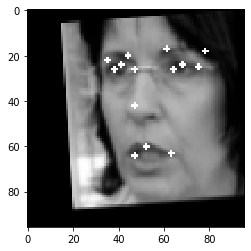

In [414]:
i = 512
test = (X_train[i] * 255).astype(int)
p = (y_train[i] * 96).reshape(14,2).astype(int)
test = draw_points(test,p)
plt.imshow(test.reshape(96,96),cmap='gray')

In [66]:
def data_gen(df, batch_size, aug_count=5):
    x_batch = []
    y_batch = []
    while True:        
        for filename in df['filename']:
            img = cv2.imread(images_data + filename)
            points = get_points(df, filename)  
            img, points = resize(img,points)
            orig_img, orig_points = normalize(img, points)  
            x_batch.append( orig_img.reshape(INPUT_SIZE))
            y_batch.append( orig_points.flatten()) 
            for _ in range(aug_count):            
                new_img, new_points = transform_image(img,points)            
                new_img, new_points = normalize(new_img,new_points)  
                
                x_batch.append( new_img.reshape(INPUT_SIZE))
                y_batch.append( new_points.flatten()) 
                
            if len(batch) == batch_size:
                yield np.asarray(x_batch), np.asarray(y_batch)
                x_batch = []
                y_batch = []
  

In [62]:
gen = data_gen(train_df, 32, 0)

In [65]:
next(gen).shape

(32, 2)

### Model

In [54]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [57]:
train_df, val_df = train_test_split(labels_df,test_size=0.2, random_state=42)

In [58]:
# train_df, test_df = train_test_split(train_df,test_size=0.1, random_state=42)


In [47]:
 tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [48]:
model = models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=INPUT_SIZE),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(28, activation='sigmoid')
])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 96, 96, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)             

In [50]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.003),
              loss='mean_squared_error',
              metrics=['mse'])

In [51]:
batch_size = 64
aug_count = 0
steps_per_epoch = len(labels_df) * (aug_count + 1) // batch_size


In [67]:
history = model.fit(data_gen(train_df,batch_size,aug_count), 
                    epochs = 40, 
                    steps_per_epoch = steps_per_epoch, 
                    validation_data = data_gen(val_df, batch_size, 0))

ValueError: in converted code:

    D:\Software\Anaconda3\envs\apro\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py:677 map_fn
        batch_size=None)
    D:\Software\Anaconda3\envs\apro\lib\site-packages\tensorflow_core\python\keras\engine\training.py:2410 _standardize_tensors
        exception_prefix='input')
    D:\Software\Anaconda3\envs\apro\lib\site-packages\tensorflow_core\python\keras\engine\training_utils.py:573 standardize_input_data
        'with shape ' + str(data_shape))

    ValueError: Error when checking input: expected conv2d_3_input to have 4 dimensions, but got array with shape (None, None)


### Predict

In [493]:
test_data = './test/'

In [494]:
test_fn = '04896.jpg'

In [495]:
fname = images_data+test_filename

In [507]:
test_img= cv2.imread(fname)

In [508]:
test_img = cv2.resize(test_img, INPUT_SIZE[:-1] )
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY) / 255

In [498]:
predicted = model.predict(np.array([test_img.reshape(INPUT_SIZE)] )) 
predicted

array([[0.5118206 , 0.21151735, 0.4904444 , 0.20848182, 0.4608913 ,
        0.21402042, 0.39312798, 0.21259221, 0.5110549 , 0.2874182 ,
        0.50332236, 0.28781277, 0.49408683, 0.29629818, 0.46712404,
        0.30406687, 0.4486331 , 0.2946616 , 0.4237222 , 0.29926684,
        0.48825532, 0.5532117 , 0.52580416, 0.6805375 , 0.49985543,
        0.70714116, 0.4787653 , 0.68853545]], dtype=float32)

In [499]:
points

array([[16, 24],
       [38, 24],
       [52, 22],
       [73, 18],
       [23, 29],
       [29, 30],
       [36, 29],
       [57, 27],
       [63, 27],
       [69, 25],
       [49, 55],
       [33, 64],
       [51, 66],
       [66, 62]])

In [500]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [501]:
predicted

array([[0.5118206 , 0.21151735, 0.4904444 , 0.20848182, 0.4608913 ,
        0.21402042, 0.39312798, 0.21259221, 0.5110549 , 0.2874182 ,
        0.50332236, 0.28781277, 0.49408683, 0.29629818, 0.46712404,
        0.30406687, 0.4486331 , 0.2946616 , 0.4237222 , 0.29926684,
        0.48825532, 0.5532117 , 0.52580416, 0.6805375 , 0.49985543,
        0.70714116, 0.4787653 , 0.68853545]], dtype=float32)

In [502]:
np.sqrt(mean_squared_error(points.flatten() / 96, predicted.flatten()) )

0.15025884129612724

In [503]:
mean_absolute_error(points.flatten() / 96, predicted.flatten()) 

0.10320058819793519

In [504]:
predicted = (predicted * 96).reshape(14,2).astype(int)

In [505]:
predicted

array([[49, 20],
       [47, 20],
       [44, 20],
       [37, 20],
       [49, 27],
       [48, 27],
       [47, 28],
       [44, 29],
       [43, 28],
       [40, 28],
       [46, 53],
       [50, 65],
       [47, 67],
       [45, 66]])

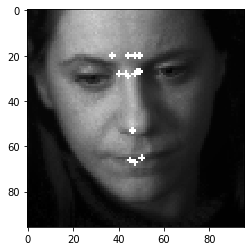

In [509]:
test_img = draw_points(test_img*255,predicted)

plt.imshow(test_img,cmap='gray')